# Time Series Forecasting Project

## For this particular assignment, the data of different types of wine sales in the 20th century is to be analysed. Both of these data are from the same company but of different wines. As an analyst in the ABC Estate Wines, you are tasked to analyse and forecast Wine Sales in the 20th century.

In [1]:
# Load all necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

### Q1. Read the data as an appropriate Time Series data and plot the data.


In [2]:
# First dataset
rose = pd.read_csv("Rose.csv")
print(rose.head())
print(rose.tail())

  YearMonth   Rose
0   1980-01  112.0
1   1980-02  118.0
2   1980-03  129.0
3   1980-04   99.0
4   1980-05  116.0
    YearMonth  Rose
182   1995-03  45.0
183   1995-04  52.0
184   1995-05  28.0
185   1995-06  40.0
186   1995-07  62.0


In [3]:
date_rose = pd.date_range(start='1/1/1980', end='8/1/1995', freq='M')

In [4]:
date_rose

DatetimeIndex(['1980-01-31', '1980-02-29', '1980-03-31', '1980-04-30',
               '1980-05-31', '1980-06-30', '1980-07-31', '1980-08-31',
               '1980-09-30', '1980-10-31',
               ...
               '1994-10-31', '1994-11-30', '1994-12-31', '1995-01-31',
               '1995-02-28', '1995-03-31', '1995-04-30', '1995-05-31',
               '1995-06-30', '1995-07-31'],
              dtype='datetime64[ns]', length=187, freq='M')

In [5]:
rose['Time_Stamp'] = pd.DataFrame(date_rose,columns=['YearMonth'])
rose.head()

YearMonth   Rose Time_Stamp
0   1980-01  112.0 1980-01-31
1   1980-02  118.0 1980-02-29
2   1980-03  129.0 1980-03-31
3   1980-04   99.0 1980-04-30
4   1980-05  116.0 1980-05-31

In [6]:
rose['Time_Stamp'] = pd.to_datetime(rose['Time_Stamp'])

In [7]:
rose.set_index(keys='Time_Stamp',inplace=True,drop=True)
rose.head()

YearMonth   Rose
Time_Stamp                 
1980-01-31   1980-01  112.0
1980-02-29   1980-02  118.0
1980-03-31   1980-03  129.0
1980-04-30   1980-04   99.0
1980-05-31   1980-05  116.0

Text(0.5, 1.0, 'Rose Wine Sales')

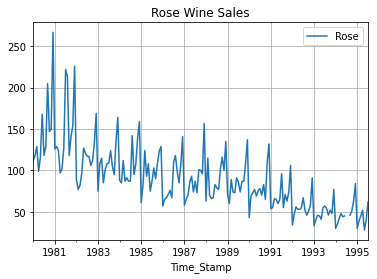

In [8]:
rose.plot();
plt.grid()
plt.title('Rose Wine Sales')

In [9]:
# Second data set 
spark = pd.read_csv("Sparkling.csv")
print(spark.head())
print(spark.tail())

  YearMonth  Sparkling
0   1980-01       1686
1   1980-02       1591
2   1980-03       2304
3   1980-04       1712
4   1980-05       1471
    YearMonth  Sparkling
182   1995-03       1897
183   1995-04       1862
184   1995-05       1670
185   1995-06       1688
186   1995-07       2031


In [10]:
date_spark = pd.date_range(start='1/1/1980', end='8/1/1995', freq='M')

In [11]:
date_spark

DatetimeIndex(['1980-01-31', '1980-02-29', '1980-03-31', '1980-04-30',
               '1980-05-31', '1980-06-30', '1980-07-31', '1980-08-31',
               '1980-09-30', '1980-10-31',
               ...
               '1994-10-31', '1994-11-30', '1994-12-31', '1995-01-31',
               '1995-02-28', '1995-03-31', '1995-04-30', '1995-05-31',
               '1995-06-30', '1995-07-31'],
              dtype='datetime64[ns]', length=187, freq='M')

In [12]:
spark['Time_Stamp'] = pd.DataFrame(date_spark,columns=['YearMonth'])
spark.head()

YearMonth  Sparkling Time_Stamp
0   1980-01       1686 1980-01-31
1   1980-02       1591 1980-02-29
2   1980-03       2304 1980-03-31
3   1980-04       1712 1980-04-30
4   1980-05       1471 1980-05-31

In [13]:
spark['Time_Stamp'] = pd.to_datetime(spark['Time_Stamp'])

In [14]:
spark.set_index(keys='Time_Stamp',inplace=True,drop=True)
spark.head()

YearMonth  Sparkling
Time_Stamp                     
1980-01-31   1980-01       1686
1980-02-29   1980-02       1591
1980-03-31   1980-03       2304
1980-04-30   1980-04       1712
1980-05-31   1980-05       1471

Text(0.5, 1.0, 'Sparkling Wine Sales')

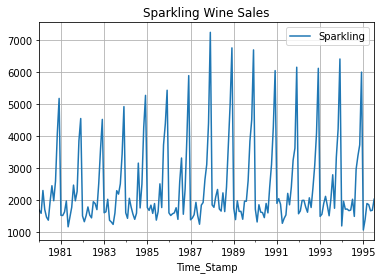

In [15]:
spark.plot();
plt.grid()
plt.title("Sparkling Wine Sales")

### Q2. Perform appropriate Exploratory Data Analysis to understand the data and also perform decomposition.

In [16]:
rose.describe().transpose()

count       mean        std   min   25%   50%    75%    max
Rose  185.0  90.394595  39.175344  28.0  63.0  86.0  112.0  267.0

In [17]:
rose.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 187 entries, 1980-01-31 to 1995-07-31
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   YearMonth  187 non-null    object 
 1   Rose       185 non-null    float64
dtypes: float64(1), object(1)
memory usage: 4.4+ KB


In [18]:
rose.isnull().sum()

YearMonth    0
Rose         2
dtype: int64

In [19]:
## updating missing values
rose['Rose']=rose['Rose'].interpolate(method='linear')

In [20]:
rose.isnull().sum()

YearMonth    0
Rose         0
dtype: int64

In [21]:
spark.describe().transpose()

count         mean         std     min     25%     50%     75%  \
Sparkling  187.0  2402.417112  1295.11154  1070.0  1605.0  1874.0  2549.0   

              max  
Sparkling  7242.0

In [22]:
spark.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 187 entries, 1980-01-31 to 1995-07-31
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   YearMonth  187 non-null    object
 1   Sparkling  187 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 4.4+ KB


In [23]:
spark.isnull().sum()

YearMonth    0
Sparkling    0
dtype: int64

#### Plot the Time series along with the mean and median of the Time series in the graph to get an understanding of the fluctuation of the data from these two measures of central tendency

/Applications/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/style.py:60: MatplotlibDeprecationWarning: Support for uppercase single-letter colors is deprecated since Matplotlib 3.1 and will be removed in 3.3; please use lowercase instead.
  [conv.to_rgba(c) for c in colors]


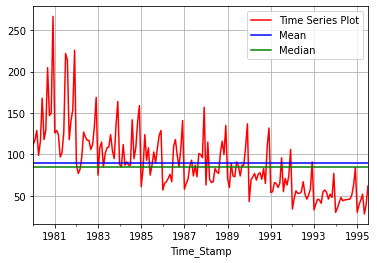

In [24]:
rose.plot(color='Red')
plt.axhline(rose['Rose'].mean(),color='Blue')
plt.axhline(rose['Rose'].median(),color='Green')
plt.grid()
plt.legend(['Time Series Plot','Mean','Median']);

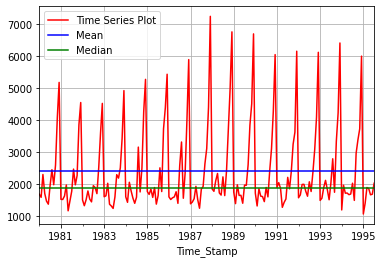

In [25]:
spark.plot(color='Red')
plt.axhline(spark['Sparkling'].mean(),color='Blue')
plt.axhline(spark['Sparkling'].median(),color='Green')
plt.grid()
plt.legend(['Time Series Plot','Mean','Median']);

#### Plotting boxplots

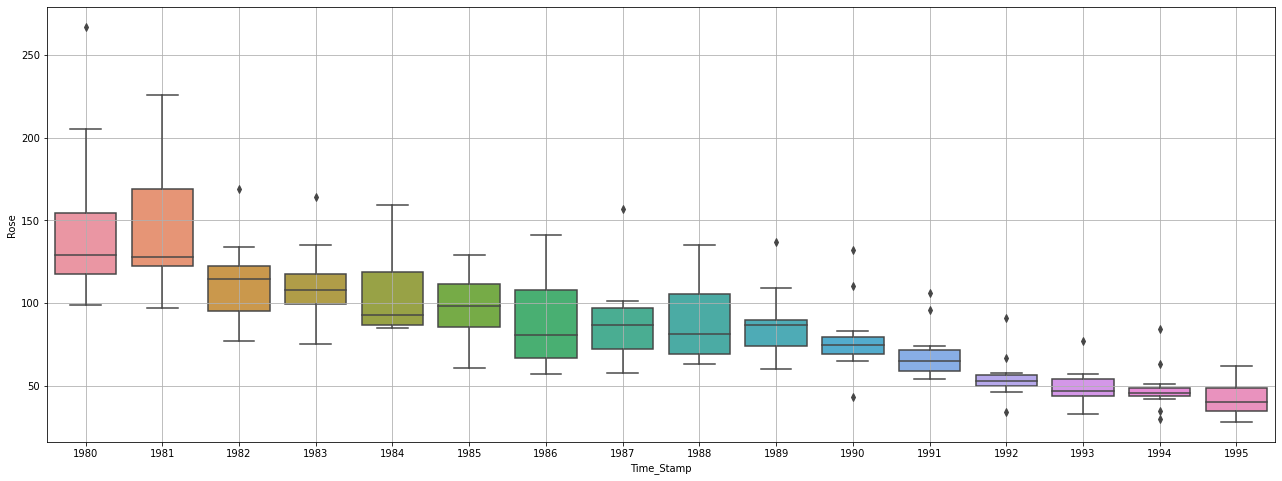

In [26]:
# Yearly boxplot - Rose
_, ax = plt.subplots(figsize=(22,8))
sns.boxplot(x = rose.index.year,y = rose['Rose'],ax=ax)
plt.grid();

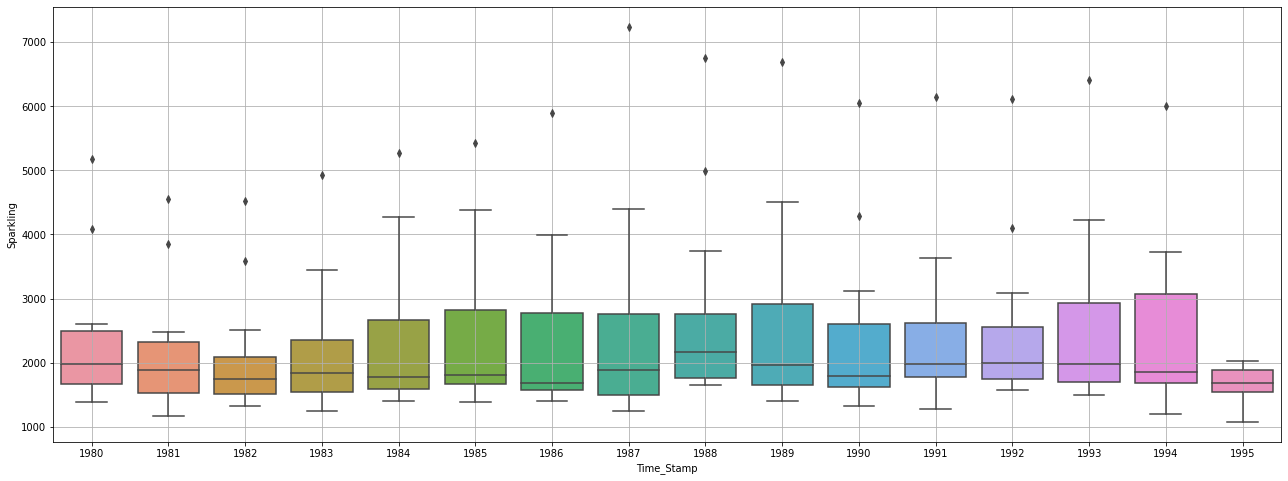

In [27]:
# Yearly boxplot - Sparkling
_, ax = plt.subplots(figsize=(22,8))
sns.boxplot(x = spark.index.year,y = spark['Sparkling'],ax=ax)
plt.grid();

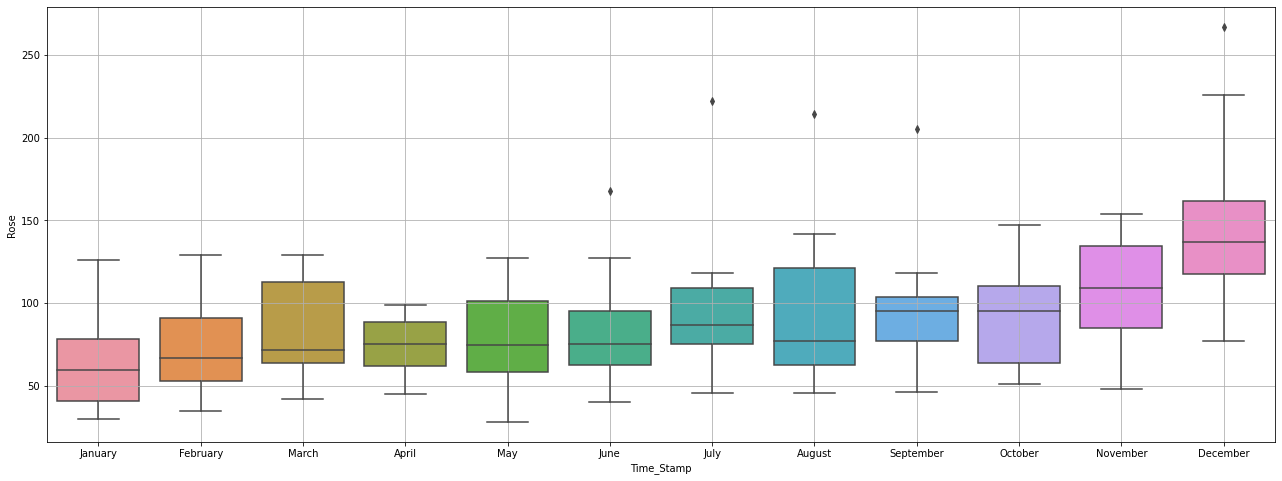

In [28]:
#Monthly boxplot - Rose
_, ax = plt.subplots(figsize=(22,8))
sns.boxplot(x = rose.index.month_name(),y = rose['Rose'],ax=ax)
plt.grid();

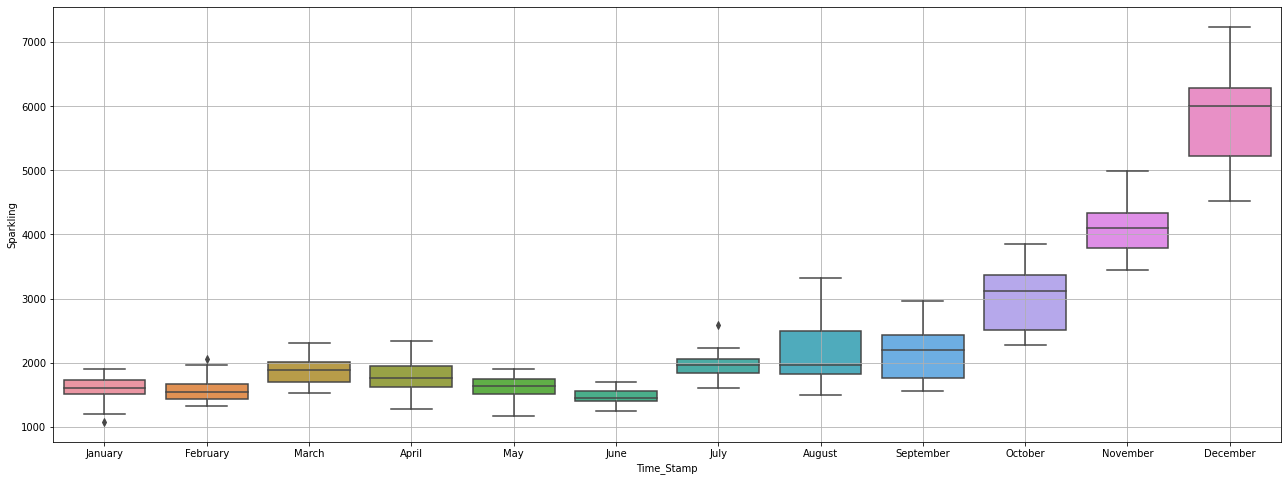

In [29]:
#Monthly boxplot - Spark
_, ax = plt.subplots(figsize=(22,8))
sns.boxplot(x = spark.index.month_name(),y = spark['Sparkling'],ax=ax)
plt.grid();

In [30]:
from pylab import rcParams

rcParams['figure.figsize'] =17,8

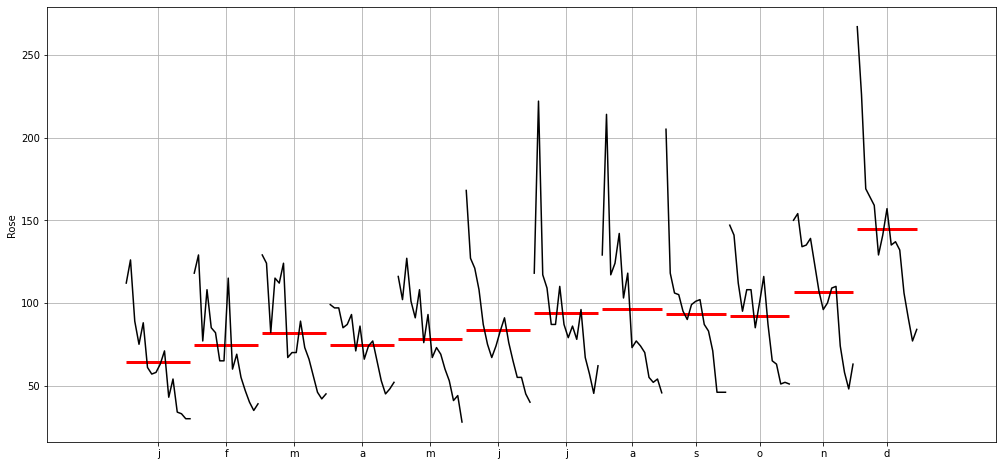

In [31]:
from statsmodels.graphics.tsaplots import month_plot

month_plot(rose['Rose'],ylabel='Rose')
plt.grid();

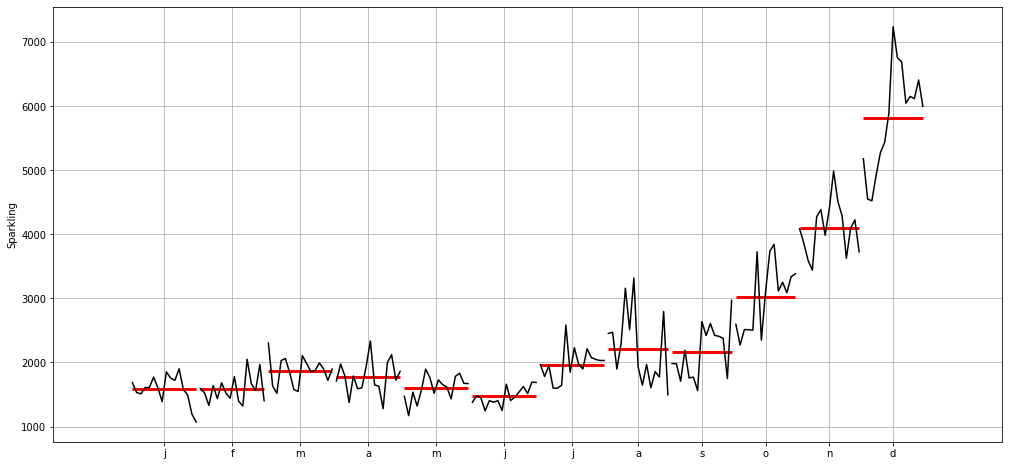

In [32]:
from statsmodels.graphics.tsaplots import month_plot

month_plot(spark['Sparkling'],ylabel='Sparkling')
plt.grid();

In [33]:
monthly_sales_across_years = pd.pivot_table(rose, values = 'Rose', columns = rose.index.month, index = rose.index.year)
monthly_sales_across_years

Time_Stamp     1      2      3     4      5      6           7           8   \
Time_Stamp                                                                    
1980        112.0  118.0  129.0  99.0  116.0  168.0  118.000000  129.000000   
1981        126.0  129.0  124.0  97.0  102.0  127.0  222.000000  214.000000   
1982         89.0   77.0   82.0  97.0  127.0  121.0  117.000000  117.000000   
1983         75.0  108.0  115.0  85.0  101.0  108.0  109.000000  124.000000   
1984         88.0   85.0  112.0  87.0   91.0   87.0   87.000000  142.000000   
1985         61.0   82.0  124.0  93.0  108.0   75.0   87.000000  103.000000   
1986         57.0   65.0   67.0  71.0   76.0   67.0  110.000000  118.000000   
1987         58.0   65.0   70.0  86.0   93.0   74.0   87.000000   73.000000   
1988         63.0  115.0   70.0  66.0   67.0   83.0   79.000000   77.000000   
1989         71.0   60.0   89.0  74.0   73.0   91.0   86.000000   74.000000   
1990         43.0   69.0   73.0  77.0   69.0   76.0   78.000000   70.000000   
1991         54.0   55.0   66.0  65.0   60.0   65.0   96.000000   55.000000   
1992         34.0   47.0   56.0  53.0   53.0   55.0   67.000000   52.000000   
1993         33.0   40.0   46.0  45.0   41.0   55.0   57.000000   54.000000   
1994         30.0   35.0   42.0  48.0   44.0   45.0   45.333333   45.666667   
1995         30.0   39.0   45.0  52.0   28.0   40.0   62.000000         NaN   

Time_Stamp     9      10     11     12  
Time_Stamp                              
1980        205.0  147.0  150.0  267.0  
1981        118.0  141.0  154.0  226.0  
1982        106.0  112.0  134.0  169.0  
1983        105.0   95.0  135.0  164.0  
1984         95.0  108.0  139.0  159.0  
1985         90.0  108.0  123.0  129.0  
1986         99.0   85.0  107.0  141.0  
1987        101.0  100.0   96.0  157.0  
1988        102.0  116.0  100.0  135.0  
1989         87.0   87.0  109.0  137.0  
1990         83.0   65.0  110.0  132.0  
1991         71.0   63.0   74.0  106.0  
1992         46.0   51.0   58.0   91.0  
1993         46.0   52.0   48.0   77.0  
1994         46.0   51.0   63.0   84.0  
1995          NaN    NaN    NaN    NaN

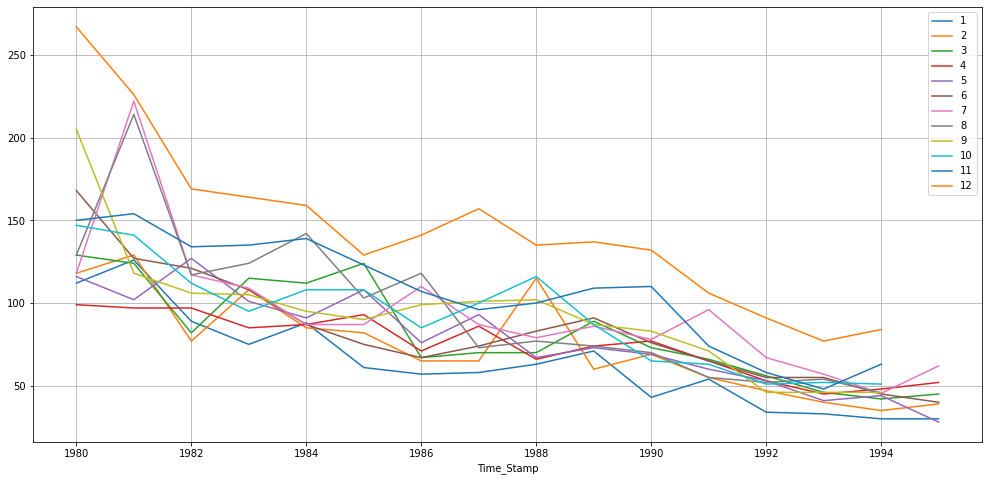

In [34]:
monthly_sales_across_years.plot()
plt.grid()
plt.legend(loc='best');

In [35]:
monthly_sales_across_years = pd.pivot_table(spark, values = 'Sparkling', columns = spark.index.month, index = spark.index.year)
monthly_sales_across_years

Time_Stamp      1       2       3       4       5       6       7       8   \
Time_Stamp                                                                   
1980        1686.0  1591.0  2304.0  1712.0  1471.0  1377.0  1966.0  2453.0   
1981        1530.0  1523.0  1633.0  1976.0  1170.0  1480.0  1781.0  2472.0   
1982        1510.0  1329.0  1518.0  1790.0  1537.0  1449.0  1954.0  1897.0   
1983        1609.0  1638.0  2030.0  1375.0  1320.0  1245.0  1600.0  2298.0   
1984        1609.0  1435.0  2061.0  1789.0  1567.0  1404.0  1597.0  3159.0   
1985        1771.0  1682.0  1846.0  1589.0  1896.0  1379.0  1645.0  2512.0   
1986        1606.0  1523.0  1577.0  1605.0  1765.0  1403.0  2584.0  3318.0   
1987        1389.0  1442.0  1548.0  1935.0  1518.0  1250.0  1847.0  1930.0   
1988        1853.0  1779.0  2108.0  2336.0  1728.0  1661.0  2230.0  1645.0   
1989        1757.0  1394.0  1982.0  1650.0  1654.0  1406.0  1971.0  1968.0   
1990        1720.0  1321.0  1859.0  1628.0  1615.0  1457.0  1899.0  1605.0   
1991        1902.0  2049.0  1874.0  1279.0  1432.0  1540.0  2214.0  1857.0   
1992        1577.0  1667.0  1993.0  1997.0  1783.0  1625.0  2076.0  1773.0   
1993        1494.0  1564.0  1898.0  2121.0  1831.0  1515.0  2048.0  2795.0   
1994        1197.0  1968.0  1720.0  1725.0  1674.0  1693.0  2031.0  1495.0   
1995        1070.0  1402.0  1897.0  1862.0  1670.0  1688.0  2031.0     NaN   

Time_Stamp      9       10      11      12  
Time_Stamp                                  
1980        1984.0  2596.0  4087.0  5179.0  
1981        1981.0  2273.0  3857.0  4551.0  
1982        1706.0  2514.0  3593.0  4524.0  
1983        2191.0  2511.0  3440.0  4923.0  
1984        1759.0  2504.0  4273.0  5274.0  
1985        1771.0  3727.0  4388.0  5434.0  
1986        1562.0  2349.0  3987.0  5891.0  
1987        2638.0  3114.0  4405.0  7242.0  
1988        2421.0  3740.0  4988.0  6757.0  
1989        2608.0  3845.0  4514.0  6694.0  
1990        2424.0  3116.0  4286.0  6047.0  
1991        2408.0  3252.0  3627.0  6153.0  
1992        2377.0  3088.0  4096.0  6119.0  
1993        1749.0  3339.0  4227.0  6410.0  
1994        2968.0  3385.0  3729.0  5999.0  
1995           NaN     NaN     NaN     NaN

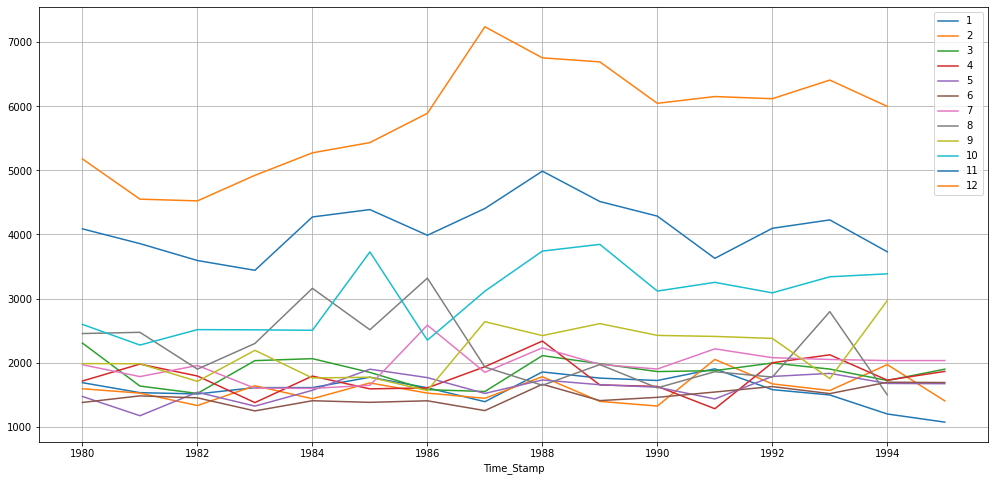

In [36]:
monthly_sales_across_years.plot()
plt.grid()
plt.legend(loc='best');

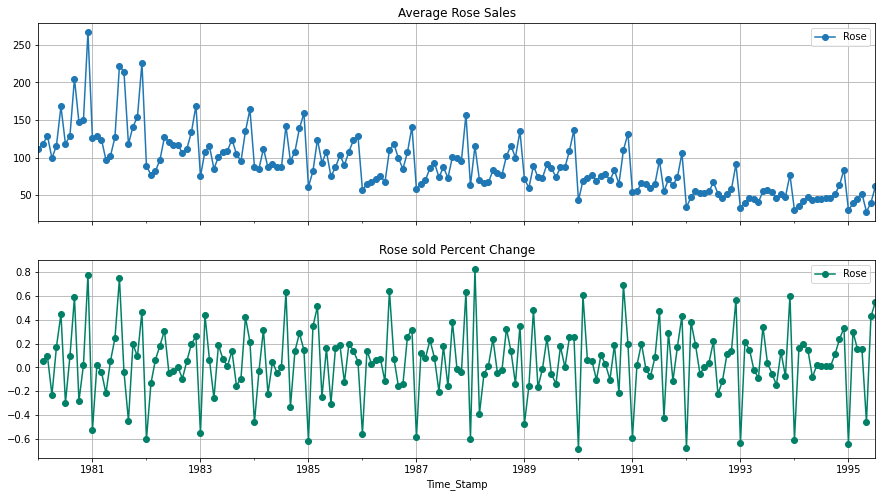

In [37]:
average    = rose.groupby(rose.index)["Rose"].mean()
pct_change = rose.groupby(rose.index)["Rose"].sum().pct_change()

fig, (axis1,axis2) = plt.subplots(2,1,sharex=True,figsize=(15,8))

# plot average Customers over time(year-month)
ax1 = average.plot(legend=True,ax=axis1,marker='o',title="Average Rose Sales",grid=True)
ax1.set_xticks(range(len(average)))
ax1.set_xticklabels(average.index.tolist())
# plot precent change for Customers over time(year-month)
ax2 = pct_change.plot(legend=True,ax=axis2,marker='o',colormap="summer",title="Rose sold Percent Change",grid=True)

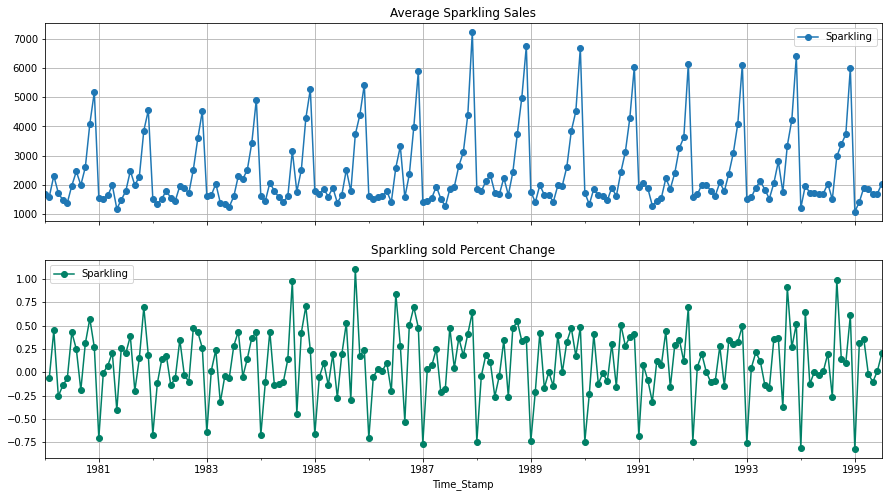

In [38]:
average    = spark.groupby(spark.index)['Sparkling'].mean()
pct_change = spark.groupby(spark.index)['Sparkling'].sum().pct_change()

fig, (axis1,axis2) = plt.subplots(2,1,sharex=True,figsize=(15,8))

# plot average Customers over time(year-month)
ax1 = average.plot(legend=True,ax=axis1,marker='o',title="Average Sparkling Sales",grid=True)
ax1.set_xticks(range(len(average)))
ax1.set_xticklabels(average.index.tolist())
# plot precent change for Customers over time(year-month)
ax2 = pct_change.plot(legend=True,ax=axis2,marker='o',colormap="summer",title="Sparkling sold Percent Change",grid=True)

#### Decomposition

In [39]:
from statsmodels.tsa.seasonal import seasonal_decompose

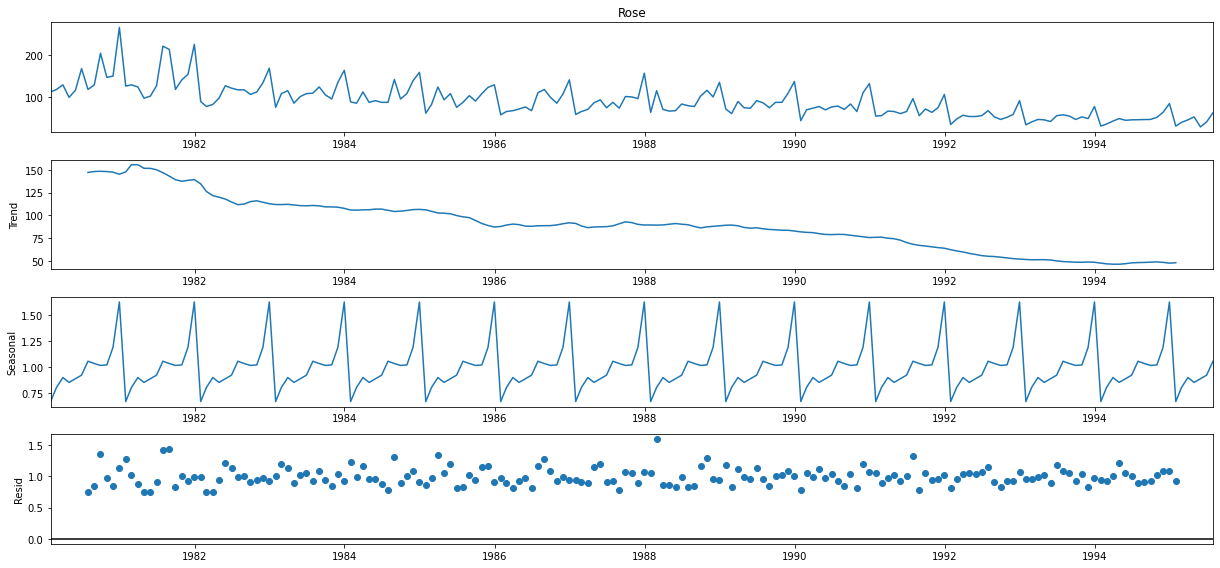

In [40]:
decomposition_rose = seasonal_decompose(rose['Rose'],model='multiplicative')
decomposition_rose.plot();

In [41]:
trend = decomposition_rose.trend
seasonality = decomposition_rose.seasonal
residual = decomposition_rose.resid

print('Trend','\n',trend.head(12),'\n')
print('Seasonality','\n',seasonality.head(12),'\n')
print('Residual','\n',residual.head(12),'\n')

Trend 
 Time_Stamp
1980-01-31           NaN
1980-02-29           NaN
1980-03-31           NaN
1980-04-30           NaN
1980-05-31           NaN
1980-06-30           NaN
1980-07-31    147.083333
1980-08-31    148.125000
1980-09-30    148.375000
1980-10-31    148.083333
1980-11-30    147.416667
1980-12-31    145.125000
Name: trend, dtype: float64 

Seasonality 
 Time_Stamp
1980-01-31    0.670111
1980-02-29    0.806163
1980-03-31    0.901164
1980-04-30    0.854024
1980-05-31    0.889415
1980-06-30    0.923985
1980-07-31    1.058038
1980-08-31    1.035881
1980-09-30    1.017648
1980-10-31    1.022573
1980-11-30    1.192349
1980-12-31    1.628646
Name: seasonal, dtype: float64 

Residual 
 Time_Stamp
1980-01-31         NaN
1980-02-29         NaN
1980-03-31         NaN
1980-04-30         NaN
1980-05-31         NaN
1980-06-30         NaN
1980-07-31    0.758258
1980-08-31    0.840720
1980-09-30    1.357674
1980-10-31    0.970771
1980-11-30    0.853378
1980-12-31    1.129646
Name: resid, dtype:

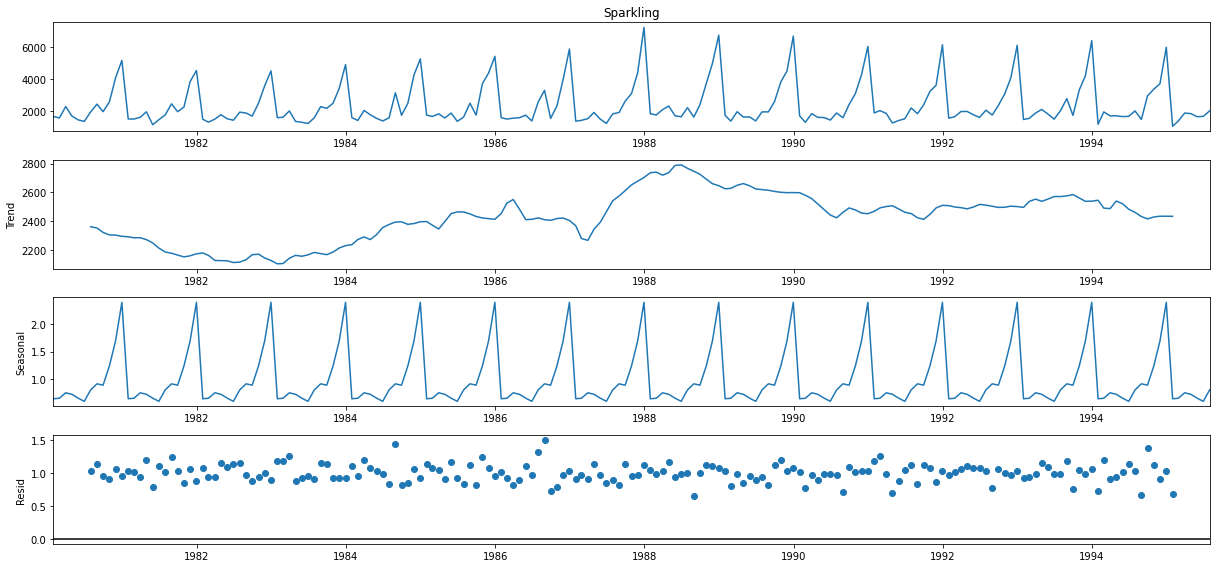

In [42]:
decomposition_spark = seasonal_decompose(spark['Sparkling'],model='multiplicative')
decomposition_spark.plot();

In [43]:
trend = decomposition_rose.trend
seasonality = decomposition_rose.seasonal
residual = decomposition_rose.resid

print('Trend','\n',trend.head(12),'\n')
print('Seasonality','\n',seasonality.head(12),'\n')
print('Residual','\n',residual.head(12),'\n')

Trend 
 Time_Stamp
1980-01-31           NaN
1980-02-29           NaN
1980-03-31           NaN
1980-04-30           NaN
1980-05-31           NaN
1980-06-30           NaN
1980-07-31    147.083333
1980-08-31    148.125000
1980-09-30    148.375000
1980-10-31    148.083333
1980-11-30    147.416667
1980-12-31    145.125000
Name: trend, dtype: float64 

Seasonality 
 Time_Stamp
1980-01-31    0.670111
1980-02-29    0.806163
1980-03-31    0.901164
1980-04-30    0.854024
1980-05-31    0.889415
1980-06-30    0.923985
1980-07-31    1.058038
1980-08-31    1.035881
1980-09-30    1.017648
1980-10-31    1.022573
1980-11-30    1.192349
1980-12-31    1.628646
Name: seasonal, dtype: float64 

Residual 
 Time_Stamp
1980-01-31         NaN
1980-02-29         NaN
1980-03-31         NaN
1980-04-30         NaN
1980-05-31         NaN
1980-06-30         NaN
1980-07-31    0.758258
1980-08-31    0.840720
1980-09-30    1.357674
1980-10-31    0.970771
1980-11-30    0.853378
1980-12-31    1.129646
Name: resid, dtype:

### Q3. Split the data into training and test. The test data should start in 1991.

In [44]:
# Splitting the data 
train_rose=rose[rose.index.year < 1991]
test_rose=rose[rose.index.year >= 1991]

In [45]:
print('First few rows of Training Data','\n',train_rose.head(),'\n')
print('Last few rows of Training Data','\n',train_rose.tail(),'\n')
print('First few rows of Test Data','\n',test_rose.head(),'\n')
print('Last few rows of Test Data','\n',test_rose.tail(),'\n')

First few rows of Training Data 
            YearMonth   Rose
Time_Stamp                 
1980-01-31   1980-01  112.0
1980-02-29   1980-02  118.0
1980-03-31   1980-03  129.0
1980-04-30   1980-04   99.0
1980-05-31   1980-05  116.0 

Last few rows of Training Data 
            YearMonth   Rose
Time_Stamp                 
1990-08-31   1990-08   70.0
1990-09-30   1990-09   83.0
1990-10-31   1990-10   65.0
1990-11-30   1990-11  110.0
1990-12-31   1990-12  132.0 

First few rows of Test Data 
            YearMonth  Rose
Time_Stamp                
1991-01-31   1991-01  54.0
1991-02-28   1991-02  55.0
1991-03-31   1991-03  66.0
1991-04-30   1991-04  65.0
1991-05-31   1991-05  60.0 

Last few rows of Test Data 
            YearMonth  Rose
Time_Stamp                
1995-03-31   1995-03  45.0
1995-04-30   1995-04  52.0
1995-05-31   1995-05  28.0
1995-06-30   1995-06  40.0
1995-07-31   1995-07  62.0 



In [46]:
print(train_rose.shape)
print(test_rose.shape)

(132, 2)
(55, 2)


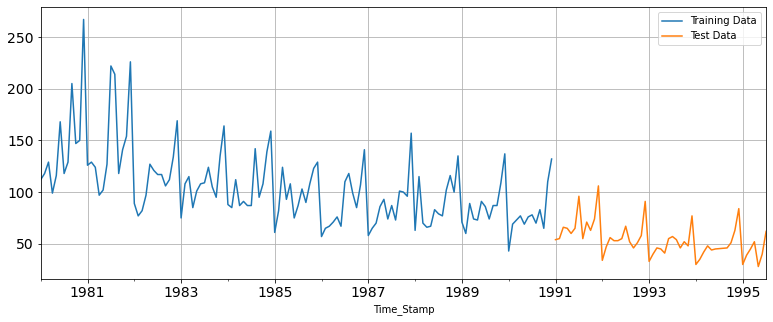

In [47]:
train_rose['Rose'].plot(figsize=(13,5), fontsize=14)
test_rose['Rose'].plot(figsize=(13,5), fontsize=14)
plt.grid()
plt.legend(['Training Data','Test Data'])
plt.show()

In [48]:
# Splitting the data 
train_spark=spark[spark.index.year < 1991]
test_spark=spark[spark.index.year >= 1991]

In [49]:
print('First few rows of Training Data','\n',train_spark.head(),'\n')
print('Last few rows of Training Data','\n',train_spark.tail(),'\n')
print('First few rows of Test Data','\n',test_spark.head(),'\n')
print('Last few rows of Test Data','\n',test_spark.tail(),'\n')

First few rows of Training Data 
            YearMonth  Sparkling
Time_Stamp                     
1980-01-31   1980-01       1686
1980-02-29   1980-02       1591
1980-03-31   1980-03       2304
1980-04-30   1980-04       1712
1980-05-31   1980-05       1471 

Last few rows of Training Data 
            YearMonth  Sparkling
Time_Stamp                     
1990-08-31   1990-08       1605
1990-09-30   1990-09       2424
1990-10-31   1990-10       3116
1990-11-30   1990-11       4286
1990-12-31   1990-12       6047 

First few rows of Test Data 
            YearMonth  Sparkling
Time_Stamp                     
1991-01-31   1991-01       1902
1991-02-28   1991-02       2049
1991-03-31   1991-03       1874
1991-04-30   1991-04       1279
1991-05-31   1991-05       1432 

Last few rows of Test Data 
            YearMonth  Sparkling
Time_Stamp                     
1995-03-31   1995-03       1897
1995-04-30   1995-04       1862
1995-05-31   1995-05       1670
1995-06-30   1995-06       1688
1995

In [50]:
print(train_spark.shape)
print(test_spark.shape)

(132, 2)
(55, 2)


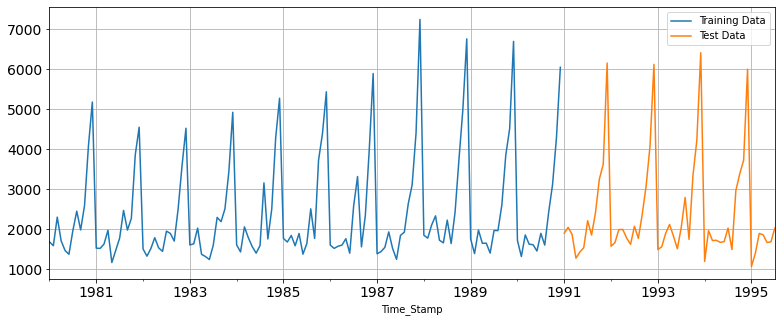

In [51]:
train_spark['Sparkling'].plot(figsize=(13,5), fontsize=14)
test_spark['Sparkling'].plot(figsize=(13,5), fontsize=14)
plt.grid()
plt.legend(['Training Data','Test Data'])
plt.show()

### Q4. Build various exponential smoothing models on the training data and evaluate the model using RMSE on the test data.

Other models such as regression,naïve forecast models, simple average models etc. should also be built on the training data and check the performance on the test data using RMSE.

#### Model 1 : Linear Regression

### Rose Data

In [52]:
train_rose_reg = train_rose.copy()
test_rose_reg = test_rose.copy()

In [53]:
train_time = [i+1 for i in range(len(train_rose))]
test_time = [i+133 for i in range(len(test_rose))]
print('Training Rose instance','\n',train_rose)
print('Test Rose instance','\n',test_rose)

Training Rose instance 
            YearMonth   Rose
Time_Stamp                 
1980-01-31   1980-01  112.0
1980-02-29   1980-02  118.0
1980-03-31   1980-03  129.0
1980-04-30   1980-04   99.0
1980-05-31   1980-05  116.0
...              ...    ...
1990-08-31   1990-08   70.0
1990-09-30   1990-09   83.0
1990-10-31   1990-10   65.0
1990-11-30   1990-11  110.0
1990-12-31   1990-12  132.0

[132 rows x 2 columns]
Test Rose instance 
            YearMonth        Rose
Time_Stamp                      
1991-01-31   1991-01   54.000000
1991-02-28   1991-02   55.000000
1991-03-31   1991-03   66.000000
1991-04-30   1991-04   65.000000
1991-05-31   1991-05   60.000000
1991-06-30   1991-06   65.000000
1991-07-31   1991-07   96.000000
1991-08-31   1991-08   55.000000
1991-09-30   1991-09   71.000000
1991-10-31   1991-10   63.000000
1991-11-30   1991-11   74.000000
1991-12-31   1991-12  106.000000
1992-01-31   1992-01   34.000000
1992-02-29   1992-02   47.000000
1992-03-31   1992-03   56.000000
1992-

In [54]:
train_rose_reg['time'] = train_time
test_rose_reg['time'] = test_time

print('First few rows of Training Data','\n',train_rose_reg.head(),'\n')
print('Last few rows of Training Data','\n',train_rose_reg.tail(),'\n')
print('First few rows of Test Data','\n',test_rose_reg.head(),'\n')
print('Last few rows of Test Data','\n',test_rose_reg.tail(),'\n')

First few rows of Training Data 
            YearMonth   Rose  time
Time_Stamp                       
1980-01-31   1980-01  112.0     1
1980-02-29   1980-02  118.0     2
1980-03-31   1980-03  129.0     3
1980-04-30   1980-04   99.0     4
1980-05-31   1980-05  116.0     5 

Last few rows of Training Data 
            YearMonth   Rose  time
Time_Stamp                       
1990-08-31   1990-08   70.0   128
1990-09-30   1990-09   83.0   129
1990-10-31   1990-10   65.0   130
1990-11-30   1990-11  110.0   131
1990-12-31   1990-12  132.0   132 

First few rows of Test Data 
            YearMonth  Rose  time
Time_Stamp                      
1991-01-31   1991-01  54.0   133
1991-02-28   1991-02  55.0   134
1991-03-31   1991-03  66.0   135
1991-04-30   1991-04  65.0   136
1991-05-31   1991-05  60.0   137 

Last few rows of Test Data 
            YearMonth  Rose  time
Time_Stamp                      
1995-03-31   1995-03  45.0   183
1995-04-30   1995-04  52.0   184
1995-05-31   1995-05  28.0   

In [55]:
from sklearn.linear_model import LinearRegression

In [56]:
lr = LinearRegression()

In [57]:
lr.fit(train_rose_reg[['time']],train_rose_reg['Rose'].values)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

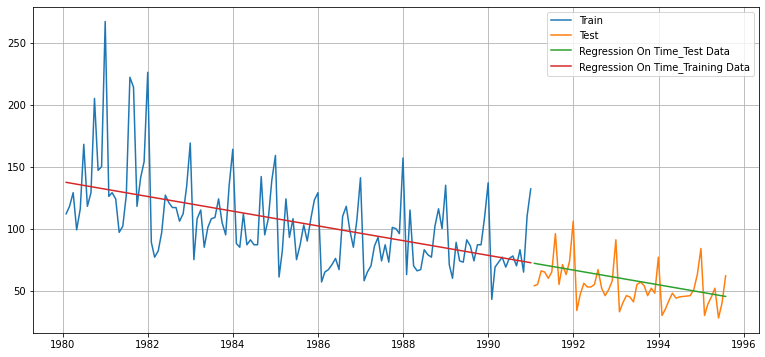

In [58]:
train_predictions_model1_rose= lr.predict(train_rose_reg[['time']])
train_rose_reg['RegOnTime'] = train_predictions_model1_rose

test_predictions_model1         = lr.predict(test_rose_reg[['time']])
test_rose_reg['RegOnTime'] = test_predictions_model1

plt.figure(figsize=(13,6))
plt.plot( train_rose['Rose'], label='Train')
plt.plot(test_rose['Rose'], label='Test')
plt.plot(test_rose_reg['RegOnTime'], label='Regression On Time_Test Data')
plt.plot(train_rose_reg['RegOnTime'], label='Regression On Time_Training Data')
plt.legend(loc='best')
plt.grid();

In [59]:
from sklearn import metrics

In [60]:
## Mean Absolute Percentage Error - Function Definition

def MAPE(y, yhat): 
    y, yhat = np.array(y), np.array(yhat)
    try:
        mape =  round(np.sum(np.abs(yhat - y)) / np.sum(y) * 100,2)
    except:
        print("Observed values are empty")
        mape = np.nan
    return mape

In [61]:
#Model Evaluation

## Training Data - RMSE and MAPE

rose_rmse_model1_train = metrics.mean_squared_error(train_rose['Rose'],train_predictions_model1_rose,squared=False)
rose_mape_model1_train = MAPE(train_rose['Rose'],train_predictions_model1_rose)
print("For RegressionOnTime forecast on the Training Data,  RMSE is %3.3f MAPE is %3.2f" %(rose_rmse_model1_train, rose_mape_model1_train))

For RegressionOnTime forecast on the Training Data,  RMSE is 30.718 MAPE is 21.22


In [62]:
## Test Data - RMSE and MAPE

rose_rmse_model1_test = metrics.mean_squared_error(test_rose['Rose'],test_predictions_model1,squared=False)
rose_mape_model1_test = MAPE(test_rose['Rose'],test_predictions_model1)
print("For RegressionOnTime forecast on the Test Data,  RMSE is %3.3f MAPE is %3.2f" %(rose_rmse_model1_test, rose_mape_model1_test))

For RegressionOnTime forecast on the Test Data,  RMSE is 15.269 MAPE is 22.82


In [63]:
resultsDf = pd.DataFrame({'Test RMSE': [rose_rmse_model1_test],'Test MAPE': [rose_mape_model1_test]},index=['RegressionOnTime_Rose'])
resultsDf

Test RMSE  Test MAPE
RegressionOnTime_Rose  15.268955      22.82

### Sparkling

In [64]:
train_spark_reg = train_spark.copy()
test_spark_reg = test_spark.copy()

In [65]:
train_time = [i+1 for i in range(len(train_spark))]
test_time = [i+133 for i in range(len(test_spark))]
print('Training Spark instance','\n',train_spark)
print('Test Spark instance','\n',test_spark)

Training Spark instance 
            YearMonth  Sparkling
Time_Stamp                     
1980-01-31   1980-01       1686
1980-02-29   1980-02       1591
1980-03-31   1980-03       2304
1980-04-30   1980-04       1712
1980-05-31   1980-05       1471
...              ...        ...
1990-08-31   1990-08       1605
1990-09-30   1990-09       2424
1990-10-31   1990-10       3116
1990-11-30   1990-11       4286
1990-12-31   1990-12       6047

[132 rows x 2 columns]
Test Spark instance 
            YearMonth  Sparkling
Time_Stamp                     
1991-01-31   1991-01       1902
1991-02-28   1991-02       2049
1991-03-31   1991-03       1874
1991-04-30   1991-04       1279
1991-05-31   1991-05       1432
1991-06-30   1991-06       1540
1991-07-31   1991-07       2214
1991-08-31   1991-08       1857
1991-09-30   1991-09       2408
1991-10-31   1991-10       3252
1991-11-30   1991-11       3627
1991-12-31   1991-12       6153
1992-01-31   1992-01       1577
1992-02-29   1992-02       1667


In [66]:
train_spark_reg['time'] = train_time
test_spark_reg['time'] = test_time

print('First few rows of Training Data','\n',train_spark_reg.head(),'\n')
print('Last few rows of Training Data','\n',train_spark_reg.tail(),'\n')
print('First few rows of Test Data','\n',test_spark_reg.head(),'\n')
print('Last few rows of Test Data','\n',test_spark_reg.tail(),'\n')

First few rows of Training Data 
            YearMonth  Sparkling  time
Time_Stamp                           
1980-01-31   1980-01       1686     1
1980-02-29   1980-02       1591     2
1980-03-31   1980-03       2304     3
1980-04-30   1980-04       1712     4
1980-05-31   1980-05       1471     5 

Last few rows of Training Data 
            YearMonth  Sparkling  time
Time_Stamp                           
1990-08-31   1990-08       1605   128
1990-09-30   1990-09       2424   129
1990-10-31   1990-10       3116   130
1990-11-30   1990-11       4286   131
1990-12-31   1990-12       6047   132 

First few rows of Test Data 
            YearMonth  Sparkling  time
Time_Stamp                           
1991-01-31   1991-01       1902   133
1991-02-28   1991-02       2049   134
1991-03-31   1991-03       1874   135
1991-04-30   1991-04       1279   136
1991-05-31   1991-05       1432   137 

Last few rows of Test Data 
            YearMonth  Sparkling  time
Time_Stamp                      

In [67]:
lr = LinearRegression()

In [68]:
lr.fit(train_spark_reg[['time']],train_spark_reg['Sparkling'].values)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

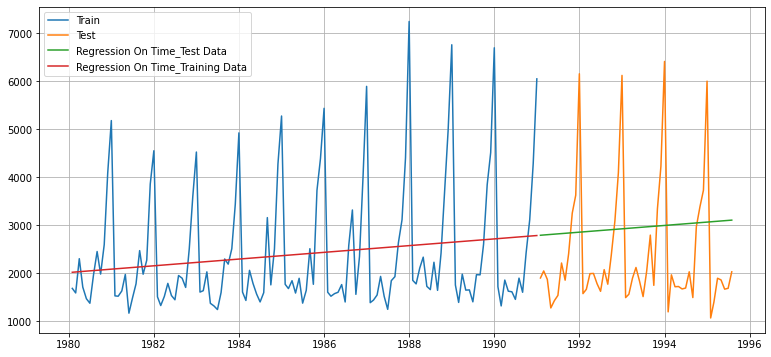

In [69]:
train_predictions_model1_spark        = lr.predict(train_spark_reg[['time']])
train_spark_reg['RegOnTime'] = train_predictions_model1_spark

test_predictions_model1_spark         = lr.predict(test_spark_reg[['time']])
test_spark_reg['RegOnTime'] = test_predictions_model1_spark

plt.figure(figsize=(13,6))
plt.plot( train_spark['Sparkling'], label='Train')
plt.plot(test_spark['Sparkling'], label='Test')
plt.plot(test_spark_reg['RegOnTime'], label='Regression On Time_Test Data')
plt.plot(train_spark_reg['RegOnTime'], label='Regression On Time_Training Data')
plt.legend(loc='best')
plt.grid();

In [70]:
#Model Evaluation

## Training Data - RMSE and MAPE

spark_rmse_model1_train = metrics.mean_squared_error(train_spark['Sparkling'],train_predictions_model1_spark,squared=False)
spark_mape_model1_train = MAPE(train_spark['Sparkling'],train_predictions_model1_spark)
print("For RegressionOnTime forecast on the Training Data,  RMSE is %3.3f MAPE is %3.2f" %(spark_rmse_model1_train, spark_mape_model1_train))

For RegressionOnTime forecast on the Training Data,  RMSE is 1279.322 MAPE is 40.05


In [71]:
## Test Data - RMSE and MAPE

spark_rmse_model1_test = metrics.mean_squared_error(test_spark['Sparkling'],test_predictions_model1_spark,squared=False)
spark_mape_model1_test = MAPE(test_spark['Sparkling'],test_predictions_model1_spark)
print("For RegressionOnTime forecast on the Test Data,  RMSE is %3.3f MAPE is %3.2f" %(spark_rmse_model1_test, spark_mape_model1_test))

For RegressionOnTime forecast on the Test Data,  RMSE is 1389.135 MAPE is 50.15


In [72]:
resultsDf_2 = pd.DataFrame({'Test RMSE': [spark_rmse_model1_test],'Test MAPE': [spark_mape_model1_test]},index=['RegressionOnTime_Spark'])

resultsDf = pd.concat([resultsDf, resultsDf_2])
resultsDf

Test RMSE  Test MAPE
RegressionOnTime_Rose     15.268955      22.82
RegressionOnTime_Spark  1389.135175      50.15

#### Model 2 : Naive Approach

### Rose

In [73]:
NaiveModel_train_rose = train_rose.copy()
NaiveModel_test_rose = test_rose.copy()

In [74]:
## Let us get the last value (or the most recent value) of the training set.

NaiveModel_train_rose['naive'] = np.asarray(train_rose['Rose'])[len(np.asarray(train_rose['Rose']))-1]
NaiveModel_train_rose['naive'].head()

Time_Stamp
1980-01-31    132.0
1980-02-29    132.0
1980-03-31    132.0
1980-04-30    132.0
1980-05-31    132.0
Name: naive, dtype: float64

In [75]:
NaiveModel_test_rose['naive'] = np.asarray(train_rose['Rose'])[len(np.asarray(train_rose['Rose']))-1]
NaiveModel_test_rose['naive'].head()

Time_Stamp
1991-01-31    132.0
1991-02-28    132.0
1991-03-31    132.0
1991-04-30    132.0
1991-05-31    132.0
Name: naive, dtype: float64

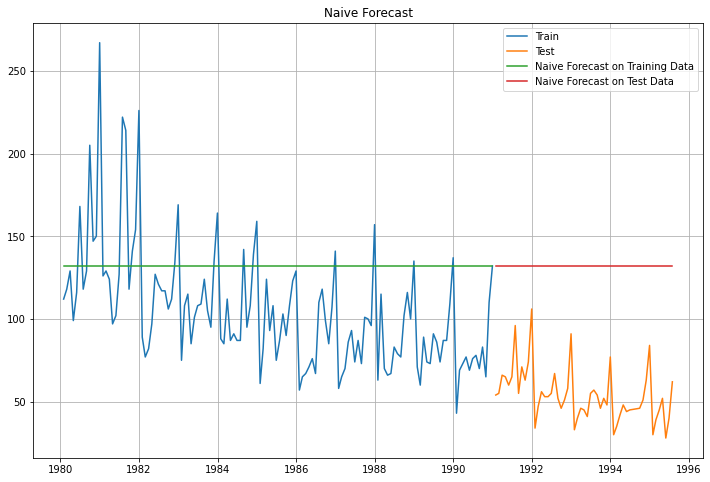

In [76]:
plt.figure(figsize=(12,8))
plt.plot(NaiveModel_train_rose['Rose'], label='Train')
plt.plot(test_rose['Rose'], label='Test')
plt.plot(NaiveModel_train_rose['naive'], label='Naive Forecast on Training Data')
plt.plot(NaiveModel_test_rose['naive'], label='Naive Forecast on Test Data')
plt.legend(loc='best')
plt.title("Naive Forecast")
plt.grid();

In [77]:
rose_rmse_model2_test = metrics.mean_squared_error(test_rose['Rose'],NaiveModel_test_rose['naive'],squared=False)
rose_mape_model2_test = MAPE(test_rose['Rose'],NaiveModel_test_rose['naive'])
print("For RegressionOnTime forecast on the Test Data,  RMSE is %3.3f MAPE is %3.2f" %(rose_rmse_model2_test, rose_mape_model2_test))

For RegressionOnTime forecast on the Test Data,  RMSE is 79.719 MAPE is 145.10


In [78]:
resultsDf_3 = pd.DataFrame({'Test RMSE': [rose_rmse_model2_test],'Test MAPE': [rose_mape_model2_test]},index=['Rose_NaiveModel'])

resultsDf = pd.concat([resultsDf,resultsDf_3])
resultsDf

Test RMSE  Test MAPE
RegressionOnTime_Rose     15.268955      22.82
RegressionOnTime_Spark  1389.135175      50.15
Rose_NaiveModel           79.718773     145.10

## Sparkling

In [79]:
NaiveModel_train_spark = train_spark.copy()
NaiveModel_test_spark = test_spark.copy()

In [80]:
## Let us get the last value (or the most recent value) of the training set.

NaiveModel_train_spark['naive'] = np.asarray(train_spark['Sparkling'])[len(np.asarray(train_spark['Sparkling']))-1]
NaiveModel_train_spark['naive'].head()

Time_Stamp
1980-01-31    6047
1980-02-29    6047
1980-03-31    6047
1980-04-30    6047
1980-05-31    6047
Name: naive, dtype: int64

In [81]:
NaiveModel_test_spark['naive'] = np.asarray(train_spark['Sparkling'])[len(np.asarray(train_spark['Sparkling']))-1]
NaiveModel_test_spark['naive'].head()

Time_Stamp
1991-01-31    6047
1991-02-28    6047
1991-03-31    6047
1991-04-30    6047
1991-05-31    6047
Name: naive, dtype: int64

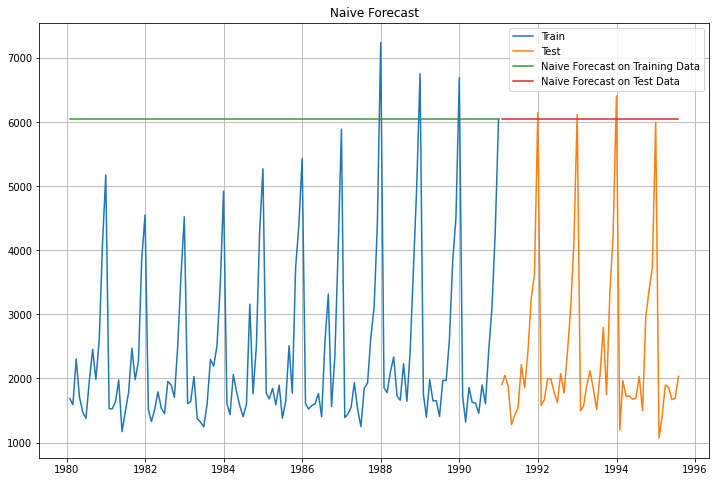

In [82]:
plt.figure(figsize=(12,8))
plt.plot(NaiveModel_train_spark['Sparkling'], label='Train')
plt.plot(test_spark['Sparkling'], label='Test')
plt.plot(NaiveModel_train_spark['naive'], label='Naive Forecast on Training Data')
plt.plot(NaiveModel_test_spark['naive'], label='Naive Forecast on Test Data')
plt.legend(loc='best')
plt.title("Naive Forecast")
plt.grid();

In [83]:
spark_rmse_model2_test = metrics.mean_squared_error(test_spark['Sparkling'],NaiveModel_test_spark['naive'],squared=False)
spark_mape_model2_test = MAPE(test_spark['Sparkling'],NaiveModel_test_spark['naive'])
print("For RegressionOnTime forecast on the Test Data,  RMSE is %3.3f MAPE is %3.2f" %(spark_rmse_model2_test, spark_mape_model2_test))

For RegressionOnTime forecast on the Test Data,  RMSE is 3864.279 MAPE is 152.87


In [84]:
resultsDf_4 = pd.DataFrame({'Test RMSE': [spark_rmse_model2_test],'Test MAPE': [spark_mape_model2_test]},index=['spark_NaiveModel'])

resultsDf = pd.concat([resultsDf,resultsDf_4])
resultsDf

Test RMSE  Test MAPE
RegressionOnTime_Rose     15.268955      22.82
RegressionOnTime_Spark  1389.135175      50.15
Rose_NaiveModel           79.718773     145.10
spark_NaiveModel        3864.279352     152.87

#### Model 3 : Simple Average

In [85]:
SimpleAverage_train = train_rose.copy()
SimpleAverage_test = test_rose.copy()

In [86]:
## Let us get the last value (or the most recent value) of the training set.

SimpleAverage_train['mean_forecast'] = train_rose['Rose'].mean()
SimpleAverage_train.head()

YearMonth   Rose  mean_forecast
Time_Stamp                                
1980-01-31   1980-01  112.0     104.939394
1980-02-29   1980-02  118.0     104.939394
1980-03-31   1980-03  129.0     104.939394
1980-04-30   1980-04   99.0     104.939394
1980-05-31   1980-05  116.0     104.939394

In [87]:
SimpleAverage_test['mean_forecast'] = train_rose['Rose'].mean()
SimpleAverage_test.head()

YearMonth  Rose  mean_forecast
Time_Stamp                               
1991-01-31   1991-01  54.0     104.939394
1991-02-28   1991-02  55.0     104.939394
1991-03-31   1991-03  66.0     104.939394
1991-04-30   1991-04  65.0     104.939394
1991-05-31   1991-05  60.0     104.939394

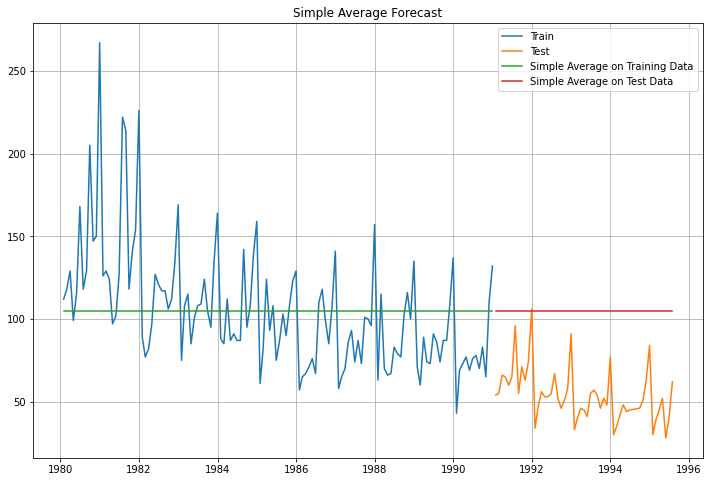

In [88]:
plt.figure(figsize=(12,8))
plt.plot(SimpleAverage_train['Rose'], label='Train')
plt.plot(SimpleAverage_test['Rose'], label='Test')
plt.plot(SimpleAverage_train['mean_forecast'], label='Simple Average on Training Data')
plt.plot(SimpleAverage_test['mean_forecast'], label='Simple Average on Test Data')
plt.legend(loc='best')
plt.title("Simple Average Forecast")
plt.grid();

In [89]:
## Test Data - RMSE and MAPE

rose_rmse_model3_test = metrics.mean_squared_error(test_rose['Rose'],SimpleAverage_test['mean_forecast'],squared=False)
rose_mape_model3_test = MAPE(test_rose['Rose'],SimpleAverage_test['mean_forecast'])
print("For Simple Average forecast on the Test Data,  RMSE is %3.3f MAPE is %3.2f" %(rose_rmse_model3_test, rose_mape_model3_test))

For Simple Average forecast on the Test Data,  RMSE is 53.461 MAPE is 94.93


In [90]:
resultsDf_5 = pd.DataFrame({'Test RMSE': [rose_rmse_model3_test],'Test MAPE': [rose_mape_model3_test]}
                           ,index=['SimpleAverageModel_Rose'])

resultsDf = pd.concat([resultsDf, resultsDf_5])
resultsDf

Test RMSE  Test MAPE
RegressionOnTime_Rose      15.268955      22.82
RegressionOnTime_Spark   1389.135175      50.15
Rose_NaiveModel            79.718773     145.10
spark_NaiveModel         3864.279352     152.87
SimpleAverageModel_Rose    53.460570      94.93

In [91]:
## Sparkling

In [92]:
SimpleAverage_train_spark = train_spark.copy()
SimpleAverage_test_spark = test_spark.copy()

In [93]:
## Let us get the last value (or the most recent value) of the training set.

SimpleAverage_train_spark['mean_forecast'] = train_spark['Sparkling'].mean()
SimpleAverage_train_spark.head()

YearMonth  Sparkling  mean_forecast
Time_Stamp                                    
1980-01-31   1980-01       1686    2403.780303
1980-02-29   1980-02       1591    2403.780303
1980-03-31   1980-03       2304    2403.780303
1980-04-30   1980-04       1712    2403.780303
1980-05-31   1980-05       1471    2403.780303

In [94]:
SimpleAverage_test_spark['mean_forecast'] = train_spark['Sparkling'].mean()
SimpleAverage_test_spark.head()

YearMonth  Sparkling  mean_forecast
Time_Stamp                                    
1991-01-31   1991-01       1902    2403.780303
1991-02-28   1991-02       2049    2403.780303
1991-03-31   1991-03       1874    2403.780303
1991-04-30   1991-04       1279    2403.780303
1991-05-31   1991-05       1432    2403.780303

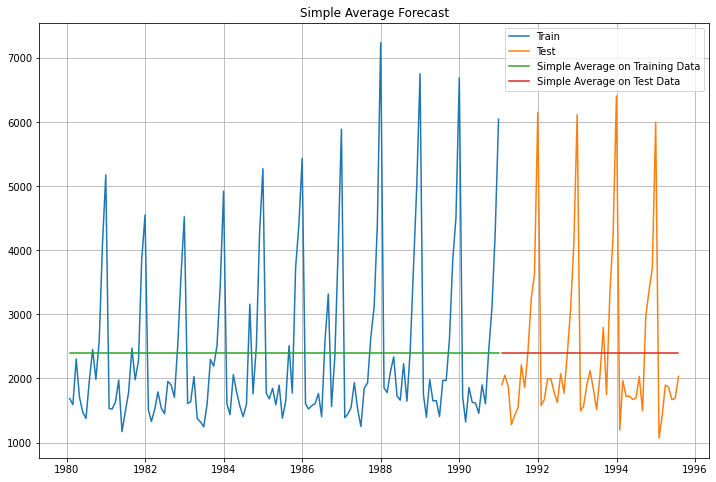

In [95]:
plt.figure(figsize=(12,8))
plt.plot(SimpleAverage_train_spark['Sparkling'], label='Train')
plt.plot(SimpleAverage_test_spark['Sparkling'], label='Test')
plt.plot(SimpleAverage_train_spark['mean_forecast'], label='Simple Average on Training Data')
plt.plot(SimpleAverage_test_spark['mean_forecast'], label='Simple Average on Test Data')
plt.legend(loc='best')
plt.title("Simple Average Forecast")
plt.grid();

In [96]:
## Test Data - RMSE and MAPE

spark_rmse_model3_test = metrics.mean_squared_error(test_spark['Sparkling'],SimpleAverage_test_spark['mean_forecast'],squared=False)
spark_mape_model3_test = MAPE(test_spark['Sparkling'],SimpleAverage_test_spark['mean_forecast'])
print("For Simple Average forecast on the Test Data,  RMSE is %3.3f MAPE is %3.2f" %(spark_rmse_model3_test, spark_mape_model3_test))

For Simple Average forecast on the Test Data,  RMSE is 1275.082 MAPE is 38.90


In [97]:
resultsDf_6 = pd.DataFrame({'Test RMSE': [spark_rmse_model3_test],'Test MAPE': [spark_mape_model3_test]}
                           ,index=['SimpleAverageModel_Spark'])

resultsDf = pd.concat([resultsDf, resultsDf_6])
resultsDf

Test RMSE  Test MAPE
RegressionOnTime_Rose       15.268955      22.82
RegressionOnTime_Spark    1389.135175      50.15
Rose_NaiveModel             79.718773     145.10
spark_NaiveModel          3864.279352     152.87
SimpleAverageModel_Rose     53.460570      94.93
SimpleAverageModel_Spark  1275.081804      38.90

#### Model 4 : Moving Average

### Rose

In [98]:
MovingAverage_rose = rose.copy()
MovingAverage_rose.head()

YearMonth   Rose
Time_Stamp                 
1980-01-31   1980-01  112.0
1980-02-29   1980-02  118.0
1980-03-31   1980-03  129.0
1980-04-30   1980-04   99.0
1980-05-31   1980-05  116.0

In [99]:

MovingAverage_rose['Trailing_2'] = MovingAverage_rose['Rose'].rolling(2).mean()
MovingAverage_rose['Trailing_4'] = MovingAverage_rose['Rose'].rolling(4).mean()
MovingAverage_rose['Trailing_6'] = MovingAverage_rose['Rose'].rolling(6).mean()
MovingAverage_rose['Trailing_9'] = MovingAverage_rose['Rose'].rolling(9).mean()

MovingAverage_rose.head()

YearMonth   Rose  Trailing_2  Trailing_4  Trailing_6  Trailing_9
Time_Stamp                                                                 
1980-01-31   1980-01  112.0         NaN         NaN         NaN         NaN
1980-02-29   1980-02  118.0       115.0         NaN         NaN         NaN
1980-03-31   1980-03  129.0       123.5         NaN         NaN         NaN
1980-04-30   1980-04   99.0       114.0       114.5         NaN         NaN
1980-05-31   1980-05  116.0       107.5       115.5         NaN         NaN

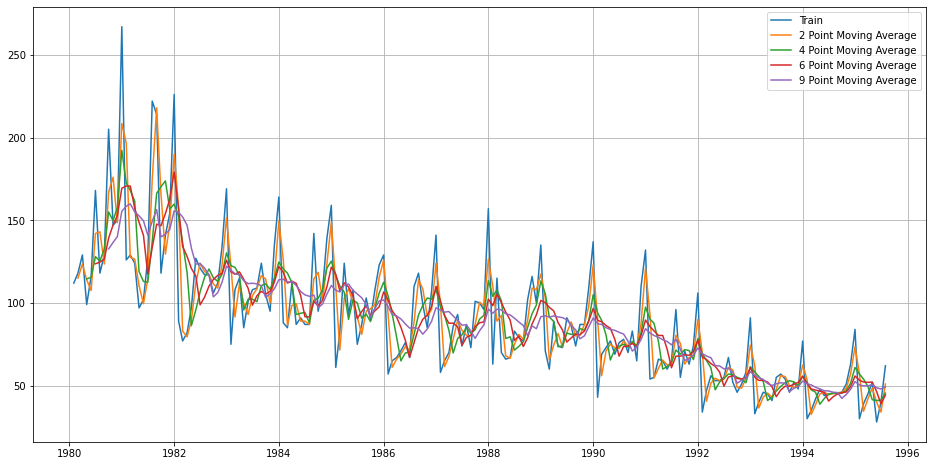

In [100]:
## Plotting on the whole data

plt.figure(figsize=(16,8))
plt.plot(MovingAverage_rose['Rose'], label='Train')
plt.plot(MovingAverage_rose['Trailing_2'], label='2 Point Moving Average')
plt.plot(MovingAverage_rose['Trailing_4'], label='4 Point Moving Average')
plt.plot(MovingAverage_rose['Trailing_6'],label = '6 Point Moving Average')
plt.plot(MovingAverage_rose['Trailing_9'],label = '9 Point Moving Average')

plt.legend(loc = 'best')
plt.grid();

In [101]:
#Creating train and test set 
rose_trailing_MovingAverage_train=MovingAverage_rose[MovingAverage_rose.index.year <1991] 
rose_trailing_MovingAverage_test=MovingAverage_rose[MovingAverage_rose.index.year >=1991]

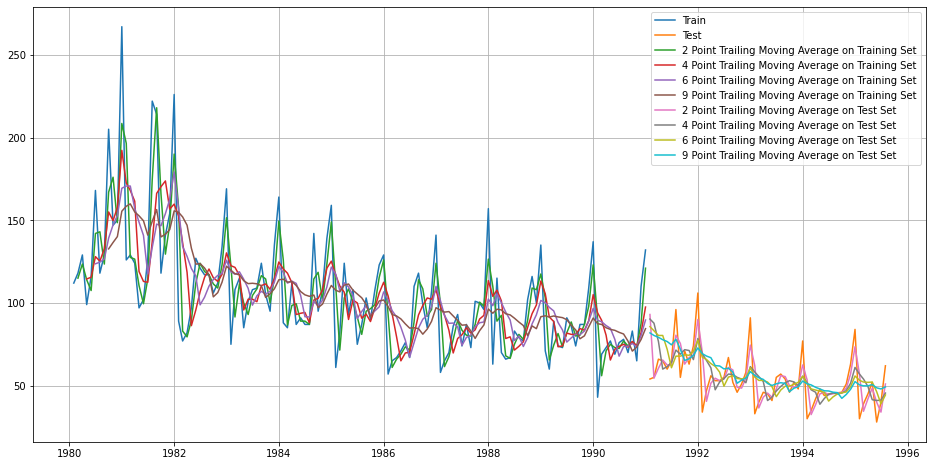

In [102]:
## Plotting on both the Training and Test data

plt.figure(figsize=(16,8))
plt.plot(rose_trailing_MovingAverage_train['Rose'], label='Train')
plt.plot(rose_trailing_MovingAverage_test['Rose'], label='Test')

plt.plot(rose_trailing_MovingAverage_train['Trailing_2'], label='2 Point Trailing Moving Average on Training Set')
plt.plot(rose_trailing_MovingAverage_train['Trailing_4'], label='4 Point Trailing Moving Average on Training Set')
plt.plot(rose_trailing_MovingAverage_train['Trailing_6'],label = '6 Point Trailing Moving Average on Training Set')
plt.plot(rose_trailing_MovingAverage_train['Trailing_9'],label = '9 Point Trailing Moving Average on Training Set')

plt.plot(rose_trailing_MovingAverage_test['Trailing_2'], label='2 Point Trailing Moving Average on Test Set')
plt.plot(rose_trailing_MovingAverage_test['Trailing_4'], label='4 Point Trailing Moving Average on Test Set')
plt.plot(rose_trailing_MovingAverage_test['Trailing_6'],label = '6 Point Trailing Moving Average on Test Set')
plt.plot(rose_trailing_MovingAverage_test['Trailing_9'],label = '9 Point Trailing Moving Average on Test Set')
plt.legend(loc = 'best')
plt.grid();

In [103]:
## Test Data - RMSE and MAPE --> 2 point Trailing MA

rose_rmse_model4_test_2 = metrics.mean_squared_error(test_rose['Rose'],rose_trailing_MovingAverage_test['Trailing_2'],squared=False)
rose_mape_model4_test_2 = MAPE(test_rose['Rose'],rose_trailing_MovingAverage_test['Trailing_2'])
print("For 2 point Moving Average Model forecast on the Test Data,  RMSE is %3.3f MAPE is %3.2f" %(rose_rmse_model4_test_2, rose_mape_model4_test_2))

## Test Data - RMSE and MAPE --> 4 point Trailing MA

rose_rmse_model4_test_4 = metrics.mean_squared_error(test_rose['Rose'],rose_trailing_MovingAverage_test['Trailing_4'],squared=False)
rose_mape_model4_test_4 = MAPE(test_rose['Rose'],rose_trailing_MovingAverage_test['Trailing_4'])
print("For 4 point Moving Average Model forecast on the Test Data,  RMSE is %3.3f MAPE is %3.2f" %(rose_rmse_model4_test_4, rose_mape_model4_test_4))

## Test Data - RMSE and MAPE --> 6 point Trailing MA

rose_rmse_model4_test_6 = metrics.mean_squared_error(test_rose['Rose'],rose_trailing_MovingAverage_test['Trailing_6'],squared=False)
rose_mape_model4_test_6 = MAPE(test_rose['Rose'],rose_trailing_MovingAverage_test['Trailing_6'])
print("For 6 point Moving Average Model forecast on the Test Data,  RMSE is %3.3f MAPE is %3.2f" %(rose_rmse_model4_test_6, rose_mape_model4_test_6))

## Test Data - RMSE and MAPE --> 9 point Trailing MA

rose_rmse_model4_test_9 = metrics.mean_squared_error(test_rose['Rose'],rose_trailing_MovingAverage_test['Trailing_9'],squared=False)
rose_mape_model4_test_9 = MAPE(test_rose['Rose'],rose_trailing_MovingAverage_test['Trailing_9'])
print("For 9 point Moving Average Model forecast on the Test Data,  RMSE is %3.3f MAPE is %3.2f" %(rose_rmse_model4_test_9, rose_mape_model4_test_9))

For 2 point Moving Average Model forecast on the Test Data,  RMSE is 11.529 MAPE is 13.54
For 4 point Moving Average Model forecast on the Test Data,  RMSE is 14.451 MAPE is 19.49
For 6 point Moving Average Model forecast on the Test Data,  RMSE is 14.566 MAPE is 20.82
For 9 point Moving Average Model forecast on the Test Data,  RMSE is 14.728 MAPE is 21.01


In [104]:
resultsDf_7 = pd.DataFrame({'Test RMSE': [rose_rmse_model4_test_2,rose_rmse_model4_test_4
                                          ,rose_rmse_model4_test_6,rose_rmse_model4_test_9]
                            ,'Test MAPE': [rose_mape_model4_test_2,rose_mape_model4_test_4,rose_mape_model4_test_6
                                           ,rose_mape_model4_test_9]}
                           ,index=['2pointTrailingMovingAverage_Rose','4pointTrailingMovingAverage_Rose'
                                   ,'6pointTrailingMovingAverage_Rose','9pointTrailingMovingAverage_Rose'])

resultsDf = pd.concat([resultsDf, resultsDf_7])
resultsDf

Test RMSE  Test MAPE
RegressionOnTime_Rose               15.268955      22.82
RegressionOnTime_Spark            1389.135175      50.15
Rose_NaiveModel                     79.718773     145.10
spark_NaiveModel                  3864.279352     152.87
SimpleAverageModel_Rose             53.460570      94.93
SimpleAverageModel_Spark          1275.081804      38.90
2pointTrailingMovingAverage_Rose    11.529278      13.54
4pointTrailingMovingAverage_Rose    14.451403      19.49
6pointTrailingMovingAverage_Rose    14.566327      20.82
9pointTrailingMovingAverage_Rose    14.727630      21.01

### Sparkling

In [105]:
MovingAverage_spark = spark.copy()
MovingAverage_spark.head()

YearMonth  Sparkling
Time_Stamp                     
1980-01-31   1980-01       1686
1980-02-29   1980-02       1591
1980-03-31   1980-03       2304
1980-04-30   1980-04       1712
1980-05-31   1980-05       1471

In [106]:

MovingAverage_spark['Trailing_2'] = MovingAverage_spark['Sparkling'].rolling(2).mean()
MovingAverage_spark['Trailing_4'] = MovingAverage_spark['Sparkling'].rolling(4).mean()
MovingAverage_spark['Trailing_6'] = MovingAverage_spark['Sparkling'].rolling(6).mean()
MovingAverage_spark['Trailing_9'] = MovingAverage_spark['Sparkling'].rolling(9).mean()

MovingAverage_spark.head()

YearMonth  Sparkling  Trailing_2  Trailing_4  Trailing_6  \
Time_Stamp                                                            
1980-01-31   1980-01       1686         NaN         NaN         NaN   
1980-02-29   1980-02       1591      1638.5         NaN         NaN   
1980-03-31   1980-03       2304      1947.5         NaN         NaN   
1980-04-30   1980-04       1712      2008.0     1823.25         NaN   
1980-05-31   1980-05       1471      1591.5     1769.50         NaN   

            Trailing_9  
Time_Stamp              
1980-01-31         NaN  
1980-02-29         NaN  
1980-03-31         NaN  
1980-04-30         NaN  
1980-05-31         NaN

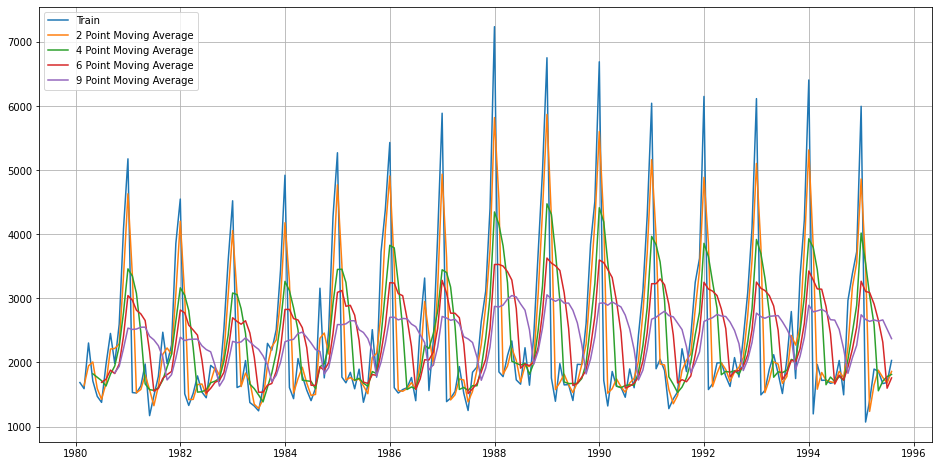

In [107]:
## Plotting on the whole data

plt.figure(figsize=(16,8))
plt.plot(MovingAverage_spark['Sparkling'], label='Train')
plt.plot(MovingAverage_spark['Trailing_2'], label='2 Point Moving Average')
plt.plot(MovingAverage_spark['Trailing_4'], label='4 Point Moving Average')
plt.plot(MovingAverage_spark['Trailing_6'],label = '6 Point Moving Average')
plt.plot(MovingAverage_spark['Trailing_9'],label = '9 Point Moving Average')

plt.legend(loc = 'best')
plt.grid();

In [108]:
#Creating train and test set 
spark_trailing_MovingAverage_train=MovingAverage_spark[MovingAverage_spark.index.year <1991] 
spark_trailing_MovingAverage_test=MovingAverage_spark[MovingAverage_spark.index.year >=1991]

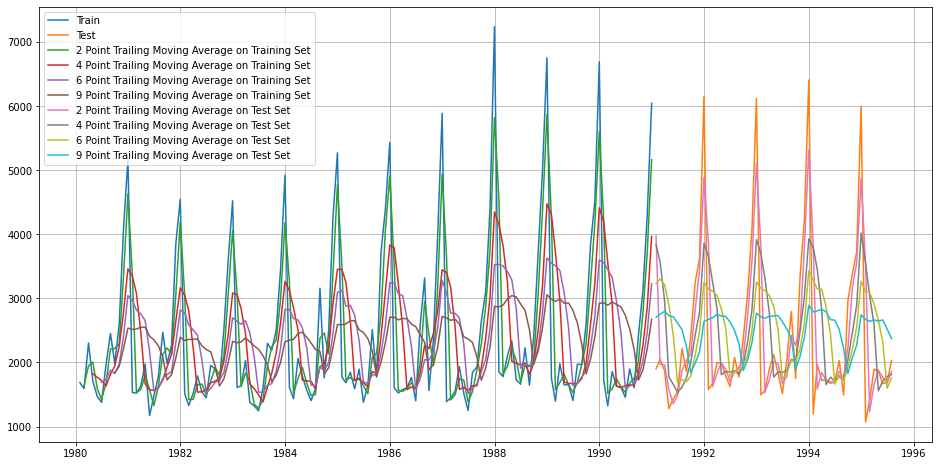

In [109]:
## Plotting on both the Training and Test data

plt.figure(figsize=(16,8))
plt.plot(spark_trailing_MovingAverage_train['Sparkling'], label='Train')
plt.plot(spark_trailing_MovingAverage_test['Sparkling'], label='Test')

plt.plot(spark_trailing_MovingAverage_train['Trailing_2'], label='2 Point Trailing Moving Average on Training Set')
plt.plot(spark_trailing_MovingAverage_train['Trailing_4'], label='4 Point Trailing Moving Average on Training Set')
plt.plot(spark_trailing_MovingAverage_train['Trailing_6'],label = '6 Point Trailing Moving Average on Training Set')
plt.plot(spark_trailing_MovingAverage_train['Trailing_9'],label = '9 Point Trailing Moving Average on Training Set')

plt.plot(spark_trailing_MovingAverage_test['Trailing_2'], label='2 Point Trailing Moving Average on Test Set')
plt.plot(spark_trailing_MovingAverage_test['Trailing_4'], label='4 Point Trailing Moving Average on Test Set')
plt.plot(spark_trailing_MovingAverage_test['Trailing_6'],label = '6 Point Trailing Moving Average on Test Set')
plt.plot(spark_trailing_MovingAverage_test['Trailing_9'],label = '9 Point Trailing Moving Average on Test Set')
plt.legend(loc = 'best')
plt.grid();

In [110]:
## Test Data - RMSE and MAPE --> 2 point Trailing MA

spark_rmse_model4_test_2 = metrics.mean_squared_error(test_spark['Sparkling'],spark_trailing_MovingAverage_test['Trailing_2'],squared=False)
spark_mape_model4_test_2 = MAPE(test_spark['Sparkling'],spark_trailing_MovingAverage_test['Trailing_2'])
print("For 2 point Moving Average Model forecast on the Test Data,  RMSE is %3.3f MAPE is %3.2f" %(spark_rmse_model4_test_2, spark_mape_model4_test_2))

## Test Data - RMSE and MAPE --> 4 point Trailing MA

spark_rmse_model4_test_4 = metrics.mean_squared_error(test_spark['Sparkling'],spark_trailing_MovingAverage_test['Trailing_4'],squared=False)
spark_mape_model4_test_4 = MAPE(test_spark['Sparkling'],spark_trailing_MovingAverage_test['Trailing_4'])
print("For 4 point Moving Average Model forecast on the Test Data,  RMSE is %3.3f MAPE is %3.2f" %(spark_rmse_model4_test_4, spark_mape_model4_test_4))

## Test Data - RMSE and MAPE --> 6 point Trailing MA

spark_rmse_model4_test_6 = metrics.mean_squared_error(test_spark['Sparkling'],spark_trailing_MovingAverage_test['Trailing_6'],squared=False)
spark_mape_model4_test_6 = MAPE(test_spark['Sparkling'],spark_trailing_MovingAverage_test['Trailing_6'])
print("For 6 point Moving Average Model forecast on the Test Data,  RMSE is %3.3f MAPE is %3.2f" %(spark_rmse_model4_test_6, spark_mape_model4_test_6))

## Test Data - RMSE and MAPE --> 9 point Trailing MA

spark_rmse_model4_test_9 = metrics.mean_squared_error(test_spark['Sparkling'],spark_trailing_MovingAverage_test['Trailing_9'],squared=False)
spark_mape_model4_test_9 = MAPE(test_spark['Sparkling'],spark_trailing_MovingAverage_test['Trailing_9'])
print("For 9 point Moving Average Model forecast on the Test Data,  RMSE is %3.3f MAPE is %3.2f" %(spark_rmse_model4_test_9, spark_mape_model4_test_9))

For 2 point Moving Average Model forecast on the Test Data,  RMSE is 813.401 MAPE is 19.70
For 4 point Moving Average Model forecast on the Test Data,  RMSE is 1156.590 MAPE is 35.96
For 6 point Moving Average Model forecast on the Test Data,  RMSE is 1283.927 MAPE is 43.86
For 9 point Moving Average Model forecast on the Test Data,  RMSE is 1346.278 MAPE is 46.86


In [111]:
resultsDf_8 = pd.DataFrame({'Test RMSE': [spark_rmse_model4_test_2,spark_rmse_model4_test_4
                                          ,spark_rmse_model4_test_6,spark_rmse_model4_test_9]
                            ,'Test MAPE': [spark_mape_model4_test_2,spark_mape_model4_test_4,spark_mape_model4_test_6
                                           ,spark_mape_model4_test_9]}
                           ,index=['2pointTrailingMovingAverage_spark','4pointTrailingMovingAverage_spark'
                                   ,'6pointTrailingMovingAverage_spark','9pointTrailingMovingAverage_spark'])

resultsDf = pd.concat([resultsDf, resultsDf_8])
resultsDf

Test RMSE  Test MAPE
RegressionOnTime_Rose                15.268955      22.82
RegressionOnTime_Spark             1389.135175      50.15
Rose_NaiveModel                      79.718773     145.10
spark_NaiveModel                   3864.279352     152.87
SimpleAverageModel_Rose              53.460570      94.93
SimpleAverageModel_Spark           1275.081804      38.90
2pointTrailingMovingAverage_Rose     11.529278      13.54
4pointTrailingMovingAverage_Rose     14.451403      19.49
6pointTrailingMovingAverage_Rose     14.566327      20.82
9pointTrailingMovingAverage_Rose     14.727630      21.01
2pointTrailingMovingAverage_spark   813.400684      19.70
4pointTrailingMovingAverage_spark  1156.589694      35.96
6pointTrailingMovingAverage_spark  1283.927428      43.86
9pointTrailingMovingAverage_spark  1346.278315      46.86

### Model 5: Exponential Smoothing

In [112]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

In [113]:
train_rose.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 132 entries, 1980-01-31 to 1990-12-31
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   YearMonth  132 non-null    object 
 1   Rose       132 non-null    float64
dtypes: float64(1), object(1)
memory usage: 3.1+ KB


In [114]:
train_rose=train_rose.drop(["YearMonth"],axis=1)

In [115]:
train_rose.head()

Rose
Time_Stamp       
1980-01-31  112.0
1980-02-29  118.0
1980-03-31  129.0
1980-04-30   99.0
1980-05-31  116.0

In [116]:
test_rose=test_rose.drop(["YearMonth"],axis=1)

In [117]:
SES_train_rose = train_rose.copy()
SES_test_rose =test_rose.copy()

In [118]:
model_SES_rose = SimpleExpSmoothing(SES_train_rose['Rose'])

/Applications/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)


In [119]:
## First we will define an empty dataframe to store our values from the loop

Alpha_values_Rose = pd.DataFrame({'Alpha Values':[],'Train RMSE':[],'Train MAPE':[]
                                ,'Test RMSE': [],'Test MAPE': []})
Alpha_values_Rose

Empty DataFrame
Columns: [Alpha Values, Train RMSE, Train MAPE, Test RMSE, Test MAPE]
Index: []

In [120]:
for i in np.arange(0.1,1,0.01):
    model_SES_alpha_i = model_SES_rose.fit(smoothing_level=i,optimized=False,use_brute=True)
    SES_train_rose['predict',i] = model_SES_alpha_i.fittedvalues
    SES_test_rose['predict',i] = model_SES_alpha_i.forecast(steps=55)
    
    rose_rmse_model5_train_i = metrics.mean_squared_error(SES_train_rose['Rose'],SES_train_rose['predict',i],squared=False)
    rose_mape_model5_train_i = MAPE(SES_train_rose['Rose'],SES_train_rose['predict',i])
    
    rose_rmse_model5_test_i = metrics.mean_squared_error(SES_test_rose['Rose'],SES_test_rose['predict',i],squared=False)
    rose_mape_model5_test_i = MAPE(SES_test_rose['Rose'],SES_test_rose['predict',i])
    
    Alpha_values_Rose = Alpha_values_Rose.append({'Alpha Values':i,'Train RMSE':rose_rmse_model5_train_i 
                                      ,'Train MAPE': rose_mape_model5_train_i,'Test RMSE':rose_rmse_model5_test_i
                                      ,'Test MAPE':rose_mape_model5_test_i}, ignore_index=True)

In [121]:
 Alpha_values_Rose

Alpha Values  Train RMSE  Train MAPE  Test RMSE  Test MAPE
0           0.10   31.815610       22.47  36.828033      63.94
1           0.11   31.789107       22.43  37.116416      64.47
2           0.12   31.778255       22.39  37.457460      65.09
3           0.13   31.779675       22.35  37.842807      65.79
4           0.14   31.790845       22.32  38.266078      66.56
..           ...         ...         ...        ...        ...
85          0.95   38.112735       24.30  78.532696     142.86
86          0.96   38.243543       24.38  78.786884     143.34
87          0.97   38.376021       24.46  79.032686     143.80
88          0.98   38.510198       24.55  79.270003     144.25
89          0.99   38.646108       24.65  79.498734     144.69

[90 rows x 5 columns]

In [122]:
 Alpha_values_Rose.sort_values(by=['Test RMSE']).head()

Alpha Values  Train RMSE  Train MAPE  Test RMSE  Test MAPE
0          0.10   31.815610       22.47  36.828033      63.94
1          0.11   31.789107       22.43  37.116416      64.47
2          0.12   31.778255       22.39  37.457460      65.09
3          0.13   31.779675       22.35  37.842807      65.79
4          0.14   31.790845       22.32  38.266078      66.56

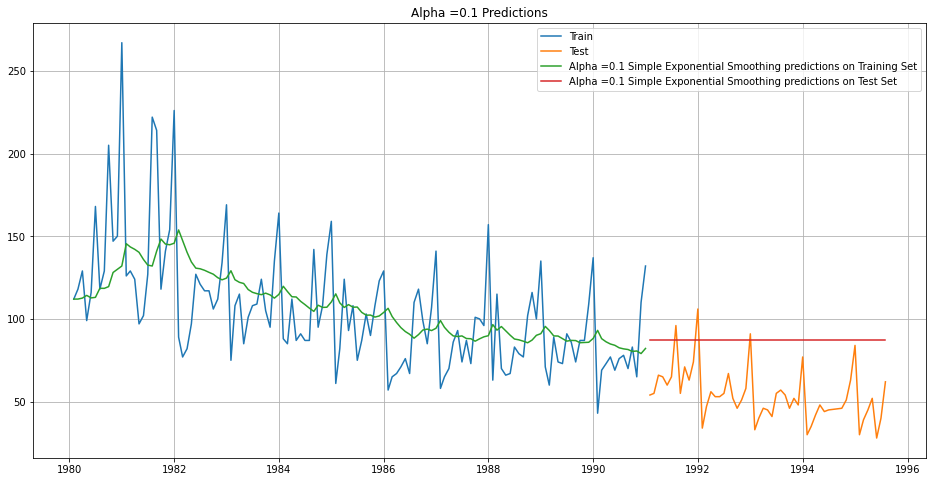

In [123]:
plt.figure(figsize=(16,8))
plt.plot(SES_train_rose['Rose'], label='Train')
plt.plot(SES_test_rose['Rose'], label='Test')

plt.plot(SES_train_rose['predict',0.1], label='Alpha =0.1 Simple Exponential Smoothing predictions on Training Set')
plt.plot(SES_test_rose['predict',0.1], label='Alpha =0.1 Simple Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Alpha =0.1 Predictions');

In [124]:
resultsDf_9 = pd.DataFrame({'Test RMSE': [ Alpha_values_Rose['Test RMSE'][0]],'Test MAPE':[ Alpha_values_Rose['Test MAPE'][0]]}
                           ,index=['Alpha=0.1,SimpleExponentialSmoothing_Rose'])

resultsDf = pd.concat([resultsDf, resultsDf_9])
resultsDf

Test RMSE  Test MAPE
RegressionOnTime_Rose                        15.268955      22.82
RegressionOnTime_Spark                     1389.135175      50.15
Rose_NaiveModel                              79.718773     145.10
spark_NaiveModel                           3864.279352     152.87
SimpleAverageModel_Rose                      53.460570      94.93
SimpleAverageModel_Spark                   1275.081804      38.90
2pointTrailingMovingAverage_Rose             11.529278      13.54
4pointTrailingMovingAverage_Rose             14.451403      19.49
6pointTrailingMovingAverage_Rose             14.566327      20.82
9pointTrailingMovingAverage_Rose             14.727630      21.01
2pointTrailingMovingAverage_spark           813.400684      19.70
4pointTrailingMovingAverage_spark          1156.589694      35.96
6pointTrailingMovingAverage_spark          1283.927428      43.86
9pointTrailingMovingAverage_spark          1346.278315      46.86
Alpha=0.1,SimpleExponentialSmoothing_Rose    36.828033      63.94

In [125]:
train_spark.head()

YearMonth  Sparkling
Time_Stamp                     
1980-01-31   1980-01       1686
1980-02-29   1980-02       1591
1980-03-31   1980-03       2304
1980-04-30   1980-04       1712
1980-05-31   1980-05       1471

In [126]:
SES_train_spark = train_spark.copy()
SES_test_spark =test_spark.copy()

In [127]:
model_SES_spark = SimpleExpSmoothing(SES_train_spark['Sparkling'])

/Applications/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)


In [128]:
## First we will define an empty dataframe to store our values from the loop

Alpha_values_spark = pd.DataFrame({'Alpha Values':[],'Train RMSE':[],'Train MAPE':[]
                                ,'Test RMSE': [],'Test MAPE': []})
Alpha_values_spark

Empty DataFrame
Columns: [Alpha Values, Train RMSE, Train MAPE, Test RMSE, Test MAPE]
Index: []

In [129]:
for i in np.arange(0.1,1,0.01):
    model_SES_alpha_i = model_SES_spark.fit(smoothing_level=i,optimized=False,use_brute=True)
    SES_train_spark['predict',i] = model_SES_alpha_i.fittedvalues
    SES_test_spark['predict',i] = model_SES_alpha_i.forecast(steps=55)
    
    spark_rmse_model5_train_i = metrics.mean_squared_error(SES_train_spark['Sparkling'],SES_train_spark['predict',i],squared=False)
    spark_mape_model5_train_i = MAPE(SES_train_spark['Sparkling'],SES_train_spark['predict',i])
    
    spark_rmse_model5_test_i = metrics.mean_squared_error(SES_test_spark['Sparkling'],SES_test_spark['predict',i],squared=False)
    spark_mape_model5_test_i = MAPE(SES_test_spark['Sparkling'],SES_test_spark['predict',i])
    
    Alpha_values_spark = Alpha_values_spark.append({'Alpha Values':i,'Train RMSE':spark_rmse_model5_train_i 
                                      ,'Train MAPE': spark_mape_model5_train_i,'Test RMSE':spark_rmse_model5_test_i
                                      ,'Test MAPE':spark_mape_model5_test_i}, ignore_index=True)

In [130]:
 Alpha_values_spark

Alpha Values   Train RMSE  Train MAPE    Test RMSE  Test MAPE
0           0.10  1333.873836       42.03  1375.393398      49.53
1           0.11  1336.970038       42.34  1390.502810      50.39
2           0.12  1339.900252       42.61  1407.090542      51.32
3           0.13  1342.643222       42.84  1425.219259      52.30
4           0.14  1345.185967       43.05  1444.921331      53.31
..           ...          ...         ...          ...        ...
85          0.95  1363.586057       36.33  3778.432623     149.55
86          0.96  1365.349793       36.23  3796.048620     150.22
87          0.97  1367.179935       36.12  3813.437370     150.88
88          0.98  1369.077807       36.01  3830.602869     151.54
89          0.99  1371.044831       35.90  3847.548965     152.21

[90 rows x 5 columns]

In [131]:
 Alpha_values_spark.sort_values(by=['Test RMSE']).head()

Alpha Values   Train RMSE  Train MAPE    Test RMSE  Test MAPE
0          0.10  1333.873836       42.03  1375.393398      49.53
1          0.11  1336.970038       42.34  1390.502810      50.39
2          0.12  1339.900252       42.61  1407.090542      51.32
3          0.13  1342.643222       42.84  1425.219259      52.30
4          0.14  1345.185967       43.05  1444.921331      53.31

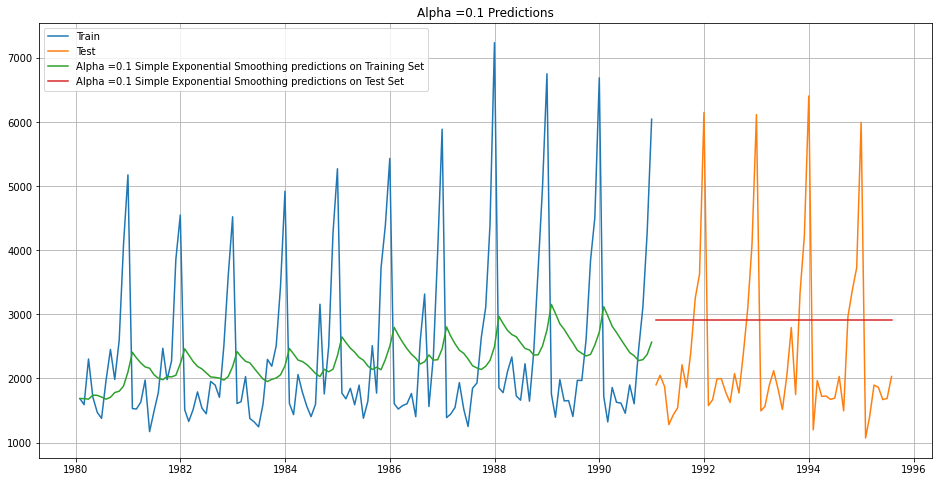

In [132]:
plt.figure(figsize=(16,8))
plt.plot(SES_train_spark['Sparkling'], label='Train')
plt.plot(SES_test_spark['Sparkling'], label='Test')

plt.plot(SES_train_spark['predict',0.1], label='Alpha =0.1 Simple Exponential Smoothing predictions on Training Set')
plt.plot(SES_test_spark['predict',0.1], label='Alpha =0.1 Simple Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Alpha =0.1 Predictions');

In [133]:
resultsDf_10 = pd.DataFrame({'Test RMSE': [ Alpha_values_spark['Test RMSE'][0]],'Test MAPE':[ Alpha_values_spark['Test MAPE'][0]]}
                           ,index=['Alpha=0.1,SimpleExponentialSmoothing_spark'])

resultsDf = pd.concat([resultsDf, resultsDf_10])
resultsDf

Test RMSE  Test MAPE
RegressionOnTime_Rose                         15.268955      22.82
RegressionOnTime_Spark                      1389.135175      50.15
Rose_NaiveModel                               79.718773     145.10
spark_NaiveModel                            3864.279352     152.87
SimpleAverageModel_Rose                       53.460570      94.93
SimpleAverageModel_Spark                    1275.081804      38.90
2pointTrailingMovingAverage_Rose              11.529278      13.54
4pointTrailingMovingAverage_Rose              14.451403      19.49
6pointTrailingMovingAverage_Rose              14.566327      20.82
9pointTrailingMovingAverage_Rose              14.727630      21.01
2pointTrailingMovingAverage_spark            813.400684      19.70
4pointTrailingMovingAverage_spark           1156.589694      35.96
6pointTrailingMovingAverage_spark           1283.927428      43.86
9pointTrailingMovingAverage_spark           1346.278315      46.86
Alpha=0.1,SimpleExponentialSmoothing_Rose     36.828033      63.94
Alpha=0.1,SimpleExponentialSmoothing_spark  1375.393398      49.53

In [134]:
SES_train_rose = np.log(train_rose.copy())
SES_test_rose = np.log(test_rose.copy())

In [135]:
model_SES_rose = SimpleExpSmoothing(SES_train_rose['Rose'])

/Applications/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)


In [136]:
## First we will define an empty dataframe to store our values from the loop

Alpha_values_rose = pd.DataFrame({'Alpha Values':[],'Train RMSE':[],'Train MAPE':[]
                                ,'Test RMSE': [],'Test MAPE': []})
Alpha_values_rose

Empty DataFrame
Columns: [Alpha Values, Train RMSE, Train MAPE, Test RMSE, Test MAPE]
Index: []

In [137]:
for i in np.arange(0.1,1,0.01):
    model_SES_alpha_i = model_SES_rose.fit(smoothing_level=i,optimized=False,use_brute=True)
    SES_train_rose['predict',i] = model_SES_alpha_i.fittedvalues
    SES_test_rose['predict',i] = model_SES_alpha_i.forecast(steps=55)
    
    rose_rmse_model5_train_i = metrics.mean_squared_error(SES_train_rose['Rose'],SES_train_rose['predict',i],squared=False)
    rose_mape_model5_train_i = MAPE(SES_train_rose['Rose'],SES_train_rose['predict',i])
    
    rose_rmse_model5_test_i = metrics.mean_squared_error(SES_test_rose['Rose'],SES_test_rose['predict',i],squared=False)
    rose_mape_model5_test_i = MAPE(SES_test_rose['Rose'],SES_test_rose['predict',i])
    
    Alpha_values_rose = Alpha_values_rose.append({'Alpha Values':i,'Train RMSE':rose_rmse_model5_train_i 
                                      ,'Train MAPE': rose_mape_model5_train_i,'Test RMSE':rose_rmse_model5_test_i
                                      ,'Test MAPE':rose_mape_model5_test_i}, ignore_index=True)

In [138]:
 Alpha_values_rose

Alpha Values  Train RMSE  Train MAPE  Test RMSE  Test MAPE
0           0.10    0.270714        4.58   0.559033      12.70
1           0.11    0.270699        4.57   0.561848      12.77
2           0.12    0.270801        4.56   0.565230      12.86
3           0.13    0.270989        4.56   0.569090      12.96
4           0.14    0.271241        4.56   0.573356      13.07
..           ...         ...         ...        ...        ...
85          0.95    0.324146        5.04   0.966422      23.45
86          0.96    0.325267        5.06   0.968608      23.51
87          0.97    0.326405        5.08   0.970699      23.56
88          0.98    0.327559        5.09   0.972693      23.62
89          0.99    0.328730        5.11   0.974590      23.67

[90 rows x 5 columns]

In [139]:
 Alpha_values_rose.sort_values(by=['Test RMSE']).head()

Alpha Values  Train RMSE  Train MAPE  Test RMSE  Test MAPE
0          0.10    0.270714        4.58   0.559033      12.70
1          0.11    0.270699        4.57   0.561848      12.77
2          0.12    0.270801        4.56   0.565230      12.86
3          0.13    0.270989        4.56   0.569090      12.96
4          0.14    0.271241        4.56   0.573356      13.07

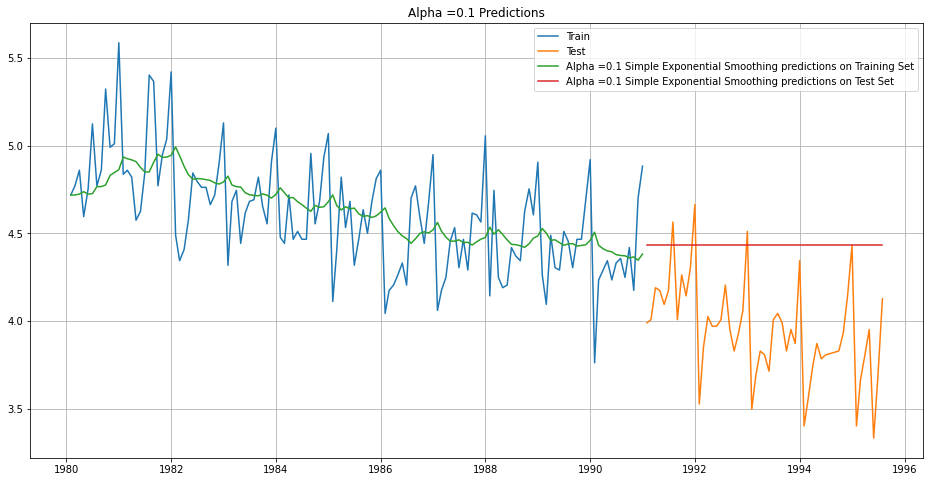

In [140]:
plt.figure(figsize=(16,8))
plt.plot(SES_train_rose['Rose'], label='Train')
plt.plot(SES_test_rose['Rose'], label='Test')

plt.plot(SES_train_rose['predict',0.1], label='Alpha =0.1 Simple Exponential Smoothing predictions on Training Set')
plt.plot(SES_test_rose['predict',0.1], label='Alpha =0.1 Simple Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Alpha =0.1 Predictions');

In [141]:
resultsDf_11 = pd.DataFrame({'Test RMSE': [ Alpha_values_rose['Test RMSE'][0]],'Test MAPE':[ Alpha_values_rose['Test MAPE'][0]]}
                           ,index=['Alpha=0.1,SimpleExponentialSmoothing_Rose_Log'])

resultsDf = pd.concat([resultsDf, resultsDf_11])
resultsDf

Test RMSE  Test MAPE
RegressionOnTime_Rose                            15.268955      22.82
RegressionOnTime_Spark                         1389.135175      50.15
Rose_NaiveModel                                  79.718773     145.10
spark_NaiveModel                               3864.279352     152.87
SimpleAverageModel_Rose                          53.460570      94.93
SimpleAverageModel_Spark                       1275.081804      38.90
2pointTrailingMovingAverage_Rose                 11.529278      13.54
4pointTrailingMovingAverage_Rose                 14.451403      19.49
6pointTrailingMovingAverage_Rose                 14.566327      20.82
9pointTrailingMovingAverage_Rose                 14.727630      21.01
2pointTrailingMovingAverage_spark               813.400684      19.70
4pointTrailingMovingAverage_spark              1156.589694      35.96
6pointTrailingMovingAverage_spark              1283.927428      43.86
9pointTrailingMovingAverage_spark              1346.278315      46.86
Alpha=0.1,SimpleExponentialSmoothing_Rose        36.828033      63.94
Alpha=0.1,SimpleExponentialSmoothing_spark     1375.393398      49.53
Alpha=0.1,SimpleExponentialSmoothing_Rose_Log     0.559033      12.70

In [142]:
train_spark=train_spark.drop(["YearMonth"],axis=1)

In [143]:
test_spark=test_spark.drop(["YearMonth"],axis=1)

In [144]:
SES_train_spark = np.log(train_spark.copy())
SES_test_spark = np.log(test_spark.copy())

In [145]:
model_SES_spark = SimpleExpSmoothing(SES_train_spark['Sparkling'])

/Applications/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)


In [146]:
## First we will define an empty dataframe to store our values from the loop

Alpha_values_spark = pd.DataFrame({'Alpha Values':[],'Train RMSE':[],'Train MAPE':[]
                                ,'Test RMSE': [],'Test MAPE': []})
Alpha_values_spark

Empty DataFrame
Columns: [Alpha Values, Train RMSE, Train MAPE, Test RMSE, Test MAPE]
Index: []

In [147]:
for i in np.arange(0.1,1,0.01):
    model_SES_alpha_i = model_SES_spark.fit(smoothing_level=i,optimized=False,use_brute=True)
    SES_train_spark['predict',i] = model_SES_alpha_i.fittedvalues
    SES_test_spark['predict',i] = model_SES_alpha_i.forecast(steps=55)
    
    spark_rmse_model5_train_i = metrics.mean_squared_error(SES_train_spark['Sparkling'],SES_train_spark['predict',i],squared=False)
    spark_mape_model5_train_i = MAPE(SES_train_spark['Sparkling'],SES_train_spark['predict',i])
    
    spark_rmse_model5_test_i = metrics.mean_squared_error(SES_test_spark['Sparkling'],SES_test_spark['predict',i],squared=False)
    spark_mape_model5_test_i = MAPE(SES_test_spark['Sparkling'],SES_test_spark['predict',i])
    
    Alpha_values_spark = Alpha_values_spark.append({'Alpha Values':i,'Train RMSE':spark_rmse_model5_train_i 
                                      ,'Train MAPE': spark_mape_model5_train_i,'Test RMSE':spark_rmse_model5_test_i
                                      ,'Test MAPE':spark_mape_model5_test_i}, ignore_index=True)

In [148]:
 Alpha_values_spark

Alpha Values  Train RMSE  Train MAPE  Test RMSE  Test MAPE
0           0.10    0.445782        4.75   0.448789       5.16
1           0.11    0.446689        4.78   0.453555       5.24
2           0.12    0.447532        4.81   0.458817       5.33
3           0.13    0.448305        4.83   0.464589       5.42
4           0.14    0.449002        4.85   0.470877       5.51
..           ...         ...         ...        ...        ...
85          0.95    0.438285        4.16   1.092243      13.20
86          0.96    0.438654        4.15   1.095702      13.24
87          0.97    0.439042        4.14   1.099098      13.28
88          0.98    0.439448        4.13   1.102432      13.32
89          0.99    0.439874        4.12   1.105705      13.36

[90 rows x 5 columns]

In [149]:
 Alpha_values_spark.sort_values(by=['Test RMSE']).head()

Alpha Values  Train RMSE  Train MAPE  Test RMSE  Test MAPE
0          0.10    0.445782        4.75   0.448789       5.16
1          0.11    0.446689        4.78   0.453555       5.24
2          0.12    0.447532        4.81   0.458817       5.33
3          0.13    0.448305        4.83   0.464589       5.42
4          0.14    0.449002        4.85   0.470877       5.51

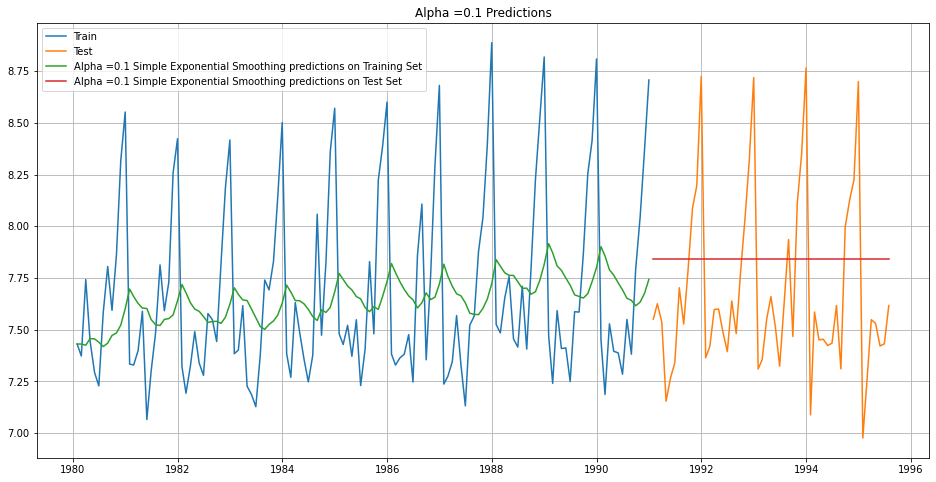

In [150]:
plt.figure(figsize=(16,8))
plt.plot(SES_train_spark['Sparkling'], label='Train')
plt.plot(SES_test_spark['Sparkling'], label='Test')

plt.plot(SES_train_spark['predict',0.1], label='Alpha =0.1 Simple Exponential Smoothing predictions on Training Set')
plt.plot(SES_test_spark['predict',0.1], label='Alpha =0.1 Simple Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Alpha =0.1 Predictions');

In [151]:
resultsDf_12 = pd.DataFrame({'Test RMSE': [ Alpha_values_spark['Test RMSE'][0]],'Test MAPE':[ Alpha_values_spark['Test MAPE'][0]]}
                           ,index=['Alpha=0.1,SimpleExponentialSmoothing_spark_Log'])

resultsDf = pd.concat([resultsDf, resultsDf_12])
resultsDf

Test RMSE  Test MAPE
RegressionOnTime_Rose                             15.268955      22.82
RegressionOnTime_Spark                          1389.135175      50.15
Rose_NaiveModel                                   79.718773     145.10
spark_NaiveModel                                3864.279352     152.87
SimpleAverageModel_Rose                           53.460570      94.93
SimpleAverageModel_Spark                        1275.081804      38.90
2pointTrailingMovingAverage_Rose                  11.529278      13.54
4pointTrailingMovingAverage_Rose                  14.451403      19.49
6pointTrailingMovingAverage_Rose                  14.566327      20.82
9pointTrailingMovingAverage_Rose                  14.727630      21.01
2pointTrailingMovingAverage_spark                813.400684      19.70
4pointTrailingMovingAverage_spark               1156.589694      35.96
6pointTrailingMovingAverage_spark               1283.927428      43.86
9pointTrailingMovingAverage_spark               1346.278315      46.86
Alpha=0.1,SimpleExponentialSmoothing_Rose         36.828033      63.94
Alpha=0.1,SimpleExponentialSmoothing_spark      1375.393398      49.53
Alpha=0.1,SimpleExponentialSmoothing_Rose_Log      0.559033      12.70
Alpha=0.1,SimpleExponentialSmoothing_spark_Log     0.448789       5.16

### Method 6: Double Exponential Smoothing



In [152]:
DES_train_rose = train_rose.copy()
DES_test_rose = test_rose.copy()

In [153]:
model_DES_rose = Holt(DES_train_rose['Rose'])

/Applications/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)


In [154]:
## First we will define an empty dataframe to store our values from the loop

DES_Alpha_values_Rose = pd.DataFrame({'Alpha Values':[],'Beta Values':[],'Train RMSE':[],'Train MAPE':[]
                                ,'Test RMSE': [],'Test MAPE': []})
DES_Alpha_values_Rose

Empty DataFrame
Columns: [Alpha Values, Beta Values, Train RMSE, Train MAPE, Test RMSE, Test MAPE]
Index: []

In [155]:
for i in np.arange(0.1,1.1,0.1):
    for j in np.arange(0.1,1.1,0.1):
        model_DES_alpha_i_j = model_DES_rose.fit(smoothing_level=i,smoothing_slope=j,optimized=True)
        DES_train_rose['predict',i,j] = model_DES_alpha_i_j.fittedvalues
        DES_test_rose['predict',i,j] = model_DES_alpha_i_j.forecast(steps=55)
        
        rose_rmse_model6_train = metrics.mean_squared_error(DES_train_rose['Rose'],DES_train_rose['predict',i,j],squared=False)
        rose_mape_model6_train = MAPE(DES_train_rose['Rose'],DES_train_rose['predict',i,j])
        
        rose_rmse_model6_test = metrics.mean_squared_error(DES_test_rose['Rose'],DES_test_rose['predict',i,j],squared=False)
        rose_mape_model6_test = MAPE(DES_test_rose['Rose'],DES_test_rose['predict',i,j])
        
        DES_Alpha_values_Rose = DES_Alpha_values_Rose.append({'Alpha Values':i,'Beta Values':j,'Train RMSE':rose_rmse_model6_train
                                      ,'Train MAPE': rose_mape_model6_train,'Test RMSE':rose_rmse_model6_test
                                      ,'Test MAPE':rose_mape_model6_test}, ignore_index=True)

In [156]:
DES_Alpha_values_Rose.head()

Alpha Values  Beta Values  Train RMSE  Train MAPE   Test RMSE  Test MAPE
0           0.1          0.1   32.026565       22.78   37.057142      64.02
1           0.1          0.2   33.450729       24.45   48.688648      83.09
2           0.1          0.3   33.145789       24.46   78.156641     131.25
3           0.1          0.4   33.262191       24.68   99.583473     165.53
4           0.1          0.5   33.688415       24.92  124.269726     205.41

In [157]:
DES_Alpha_values_Rose.sort_values(by=['Test RMSE']).head(15)

Alpha Values  Beta Values  Train RMSE  Train MAPE   Test RMSE  Test MAPE
0            0.1          0.1   32.026565       22.78   37.057142      64.02
1            0.1          0.2   33.450729       24.45   48.688648      83.09
10           0.2          0.1   32.796403       23.06   65.731602     113.20
2            0.1          0.3   33.145789       24.46   78.156641     131.25
20           0.3          0.1   33.528397       23.47   98.653317     170.12
3            0.1          0.4   33.262191       24.68   99.583473     165.53
11           0.2          0.2   33.577067       24.16  114.034245     192.47
4            0.1          0.5   33.688415       24.92  124.269726     205.41
30           0.4          0.1   34.214372       23.65  128.978577     222.55
40           0.5          0.1   34.931117       23.81  155.358802     268.06
5            0.1          0.6   34.271715       25.24  157.315288     258.78
12           0.2          0.3   34.505349       24.92  170.997795     285.21
21           0.3          0.2   34.640036       24.52  177.140327     298.66
50           0.6          0.1   35.762709       23.94  178.004937     307.10
6            0.1          0.7   34.926065       25.72  193.933686     318.25

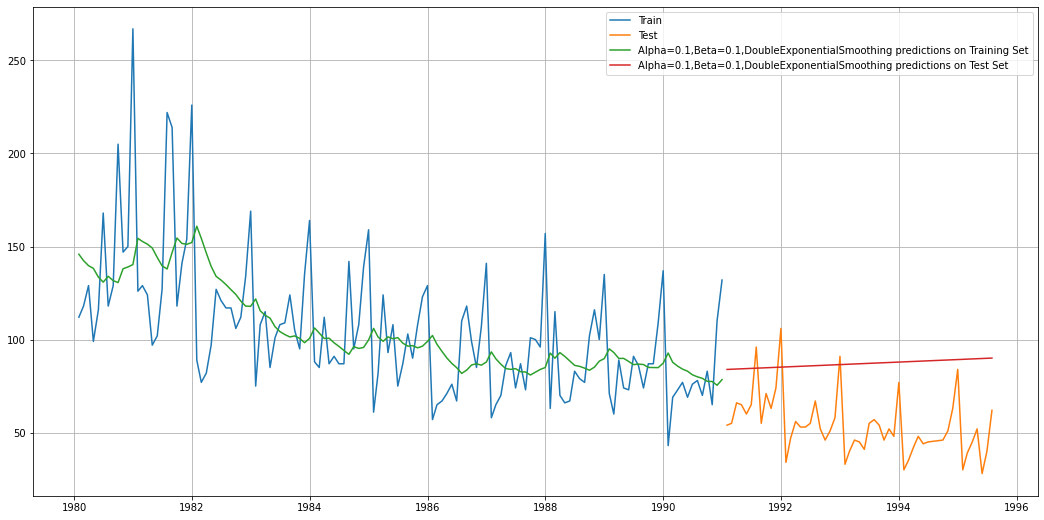

In [158]:
plt.figure(figsize=(18,9))
plt.plot(DES_train_rose['Rose'], label='Train')
plt.plot(DES_test_rose['Rose'], label='Test')

plt.plot(DES_train_rose['predict', 0.1, 0.1], label='Alpha=0.1,Beta=0.1,DoubleExponentialSmoothing predictions on Training Set')
plt.plot(DES_test_rose['predict', 0.1, 0.1], label='Alpha=0.1,Beta=0.1,DoubleExponentialSmoothing predictions on Test Set')


plt.legend(loc='best')
plt.grid();

In [159]:
resultsDf_13 = pd.DataFrame({'Test RMSE': [DES_Alpha_values_Rose['Test RMSE'][0]],'Test MAPE':[DES_Alpha_values_Rose['Test MAPE'][0]]}
                           ,index=['Alpha=0.1,Beta=0.1,DoubleExponentialSmoothing_Rose'])

resultsDf = pd.concat([resultsDf, resultsDf_13])
resultsDf

Test RMSE  Test MAPE
RegressionOnTime_Rose                                 15.268955      22.82
RegressionOnTime_Spark                              1389.135175      50.15
Rose_NaiveModel                                       79.718773     145.10
spark_NaiveModel                                    3864.279352     152.87
SimpleAverageModel_Rose                               53.460570      94.93
SimpleAverageModel_Spark                            1275.081804      38.90
2pointTrailingMovingAverage_Rose                      11.529278      13.54
4pointTrailingMovingAverage_Rose                      14.451403      19.49
6pointTrailingMovingAverage_Rose                      14.566327      20.82
9pointTrailingMovingAverage_Rose                      14.727630      21.01
2pointTrailingMovingAverage_spark                    813.400684      19.70
4pointTrailingMovingAverage_spark                   1156.589694      35.96
6pointTrailingMovingAverage_spark                   1283.927428      43.86
9pointTrailingMovingAverage_spark                   1346.278315      46.86
Alpha=0.1,SimpleExponentialSmoothing_Rose             36.828033      63.94
Alpha=0.1,SimpleExponentialSmoothing_spark          1375.393398      49.53
Alpha=0.1,SimpleExponentialSmoothing_Rose_Log          0.559033      12.70
Alpha=0.1,SimpleExponentialSmoothing_spark_Log         0.448789       5.16
Alpha=0.1,Beta=0.1,DoubleExponentialSmoothing_Rose    37.057142      64.02

### Sparkling

In [160]:
DES_train_spark = train_spark.copy()
DES_test_spark = test_spark.copy()

In [161]:
model_DES_spark = Holt(DES_train_spark['Sparkling'])

/Applications/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)


In [162]:
## First we will define an empty dataframe to store our values from the loop

DES_Alpha_values_spark = pd.DataFrame({'Alpha Values':[],'Beta Values':[],'Train RMSE':[],'Train MAPE':[]
                                ,'Test RMSE': [],'Test MAPE': []})
DES_Alpha_values_spark

Empty DataFrame
Columns: [Alpha Values, Beta Values, Train RMSE, Train MAPE, Test RMSE, Test MAPE]
Index: []

In [163]:
for i in np.arange(0.1,1.1,0.1):
    for j in np.arange(0.1,1.1,0.1):
        model_DES_alpha_i_j = model_DES_spark.fit(smoothing_level=i,smoothing_slope=j,optimized=True)
        DES_train_spark['predict',i,j] = model_DES_alpha_i_j.fittedvalues
        DES_test_spark['predict',i,j] = model_DES_alpha_i_j.forecast(steps=55)
        
        spark_rmse_model6_train = metrics.mean_squared_error(DES_train_spark['Sparkling'],DES_train_spark['predict',i,j],squared=False)
        spark_mape_model6_train = MAPE(DES_train_spark['Sparkling'],DES_train_spark['predict',i,j])
        
        spark_rmse_model6_test = metrics.mean_squared_error(DES_test_spark['Sparkling'],DES_test_spark['predict',i,j],squared=False)
        spark_mape_model6_test = MAPE(DES_test_spark['Sparkling'],DES_test_spark['predict',i,j])
        
        DES_Alpha_values_spark = DES_Alpha_values_spark.append({'Alpha Values':i,'Beta Values':j,'Train RMSE':spark_rmse_model6_train
                                      ,'Train MAPE': spark_mape_model6_train,'Test RMSE':spark_rmse_model6_test
                                      ,'Test MAPE':spark_mape_model6_test}, ignore_index=True)

/Applications/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/holtwinters.py:744: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)


In [164]:
DES_Alpha_values_spark.head()

Alpha Values  Beta Values   Train RMSE  Train MAPE    Test RMSE  Test MAPE
0           0.1          0.1  1363.474022       44.26  1779.424587      67.23
1           0.1          0.2  1401.756935       45.65  2599.788597      95.44
2           0.1          0.3  1435.329601       46.85  4290.125020     155.32
3           0.1          0.4  1471.353975       48.26  6041.557151     219.06
4           0.1          0.5  1512.136257       49.84  7389.055397     267.88

In [165]:
DES_Alpha_values_spark.sort_values(by=['Test RMSE']).head(15)

Alpha Values  Beta Values   Train RMSE  Train MAPE     Test RMSE  \
0            0.1          0.1  1363.474022       44.26   1779.424587   
1            0.1          0.2  1401.756935       45.65   2599.788597   
10           0.2          0.1  1412.033053       46.62   3611.765464   
2            0.1          0.3  1435.329601       46.85   4290.125020   
20           0.3          0.1  1428.274417       46.92   5908.185554   
3            0.1          0.4  1471.353975       48.26   6041.557151   
11           0.2          0.2  1474.207603       49.17   6878.567871   
4            0.1          0.5  1512.136257       49.84   7389.055397   
30           0.4          0.1  1422.615553       45.53   8039.102000   
5            0.1          0.6  1558.974689       51.59   8551.000771   
40           0.5          0.1  1410.108007       43.24   9788.113439   
6            0.1          0.7  1611.605622       53.68   9990.464391   
12           0.2          0.3  1546.994549       52.17  10671.332296   
50           0.6          0.1  1400.898447       41.14  11169.195321   
21           0.3          0.2  1505.016873       50.22  11519.506949   

    Test MAPE  
0       67.23  
1       95.44  
10     135.41  
2      155.32  
20     223.50  
3      219.06  
11     254.38  
4      267.88  
30     305.92  
5      309.11  
40     374.03  
6      359.73  
12     392.05  
50     427.73  
21     429.26

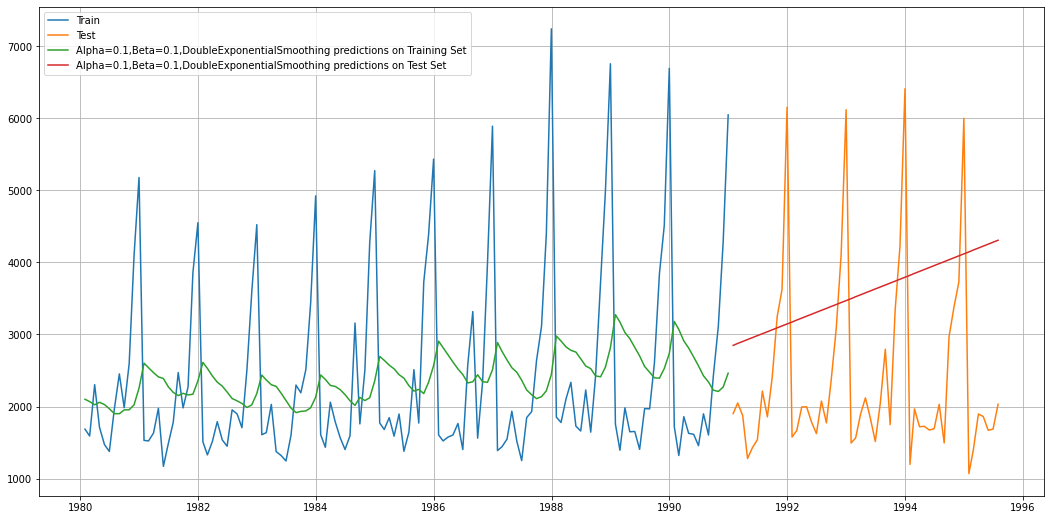

In [166]:
plt.figure(figsize=(18,9))
plt.plot(DES_train_spark['Sparkling'], label='Train')
plt.plot(DES_test_spark['Sparkling'], label='Test')

plt.plot(DES_train_spark['predict', 0.1, 0.1], label='Alpha=0.1,Beta=0.1,DoubleExponentialSmoothing predictions on Training Set')
plt.plot(DES_test_spark['predict', 0.1, 0.1], label='Alpha=0.1,Beta=0.1,DoubleExponentialSmoothing predictions on Test Set')


plt.legend(loc='best')
plt.grid();

In [167]:
resultsDf_14 = pd.DataFrame({'Test RMSE': [DES_Alpha_values_spark['Test RMSE'][0]],'Test MAPE':[DES_Alpha_values_spark['Test MAPE'][0]]}
                           ,index=['Alpha=0.1,Beta=0.1,DoubleExponentialSmoothing_Spark'])

resultsDf = pd.concat([resultsDf, resultsDf_14])
resultsDf

Test RMSE  Test MAPE
RegressionOnTime_Rose                                 15.268955      22.82
RegressionOnTime_Spark                              1389.135175      50.15
Rose_NaiveModel                                       79.718773     145.10
spark_NaiveModel                                    3864.279352     152.87
SimpleAverageModel_Rose                               53.460570      94.93
SimpleAverageModel_Spark                            1275.081804      38.90
2pointTrailingMovingAverage_Rose                      11.529278      13.54
4pointTrailingMovingAverage_Rose                      14.451403      19.49
6pointTrailingMovingAverage_Rose                      14.566327      20.82
9pointTrailingMovingAverage_Rose                      14.727630      21.01
2pointTrailingMovingAverage_spark                    813.400684      19.70
4pointTrailingMovingAverage_spark                   1156.589694      35.96
6pointTrailingMovingAverage_spark                   1283.927428      43.86
9pointTrailingMovingAverage_spark                   1346.278315      46.86
Alpha=0.1,SimpleExponentialSmoothing_Rose             36.828033      63.94
Alpha=0.1,SimpleExponentialSmoothing_spark          1375.393398      49.53
Alpha=0.1,SimpleExponentialSmoothing_Rose_Log          0.559033      12.70
Alpha=0.1,SimpleExponentialSmoothing_spark_Log         0.448789       5.16
Alpha=0.1,Beta=0.1,DoubleExponentialSmoothing_Rose    37.057142      64.02
Alpha=0.1,Beta=0.1,DoubleExponentialSmoothing_S...  1779.424587      67.23

### Triple Exponential Smoothing

In [168]:
TES_train_rose = train_rose.copy()
TES_test_rose = test_rose.copy()

In [169]:
model_TES_rose = ExponentialSmoothing(TES_train_rose['Rose'],trend='additive',seasonal='multiplicative',freq='M')

In [170]:
TES_parameters_Rose = pd.DataFrame({'Alpha Values':[],'Beta Values':[],'Gamma Values':[],'Train RMSE':[],'Train MAPE':[]
                                ,'Test RMSE': [],'Test MAPE': []})
TES_parameters_Rose

Empty DataFrame
Columns: [Alpha Values, Beta Values, Gamma Values, Train RMSE, Train MAPE, Test RMSE, Test MAPE]
Index: []

In [171]:
for i in np.arange(0.1,1.1,0.1):
    for j in np.arange(0.1,1.1,0.1):
        for k in np.arange(0.1,1.1,0.1):
            model_TES_alpha_i_j_k = model_TES_rose.fit(smoothing_level=i,smoothing_slope=j,smoothing_seasonal=k,optimized=False,use_brute=True)
            TES_train_rose['predict',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
            TES_test_rose['predict',i,j,k] = model_TES_alpha_i_j_k.forecast(steps=55)
        
            rose_rmse_model8_train = metrics.mean_squared_error(TES_train_rose['Rose'],TES_train_rose['predict',i,j,k],squared=False)
            rose_mape_model8_train = MAPE(TES_train_rose['Rose'],TES_train_rose['predict',i,j,k])
        
            rose_rmse_model8_test = metrics.mean_squared_error(TES_test_rose['Rose'],TES_test_rose['predict',i,j,k],squared=False)
            rose_mape_model8_test = MAPE(TES_test_rose['Rose'],TES_test_rose['predict',i,j,k])
        
            TES_parameters_Rose = TES_parameters_Rose.append({'Alpha Values':i,'Beta Values':j,'Gamma Values':k,'Train RMSE':rose_rmse_model8_train
                                      ,'Train MAPE': rose_mape_model8_train,'Test RMSE':rose_rmse_model8_test
                                      ,'Test MAPE':rose_mape_model8_test}, ignore_index=True)

In [172]:
TES_parameters_Rose

Alpha Values  Beta Values  Gamma Values    Train RMSE  Train MAPE  \
0             0.1          0.1           0.1     25.216699       15.88   
1             0.1          0.1           0.2     24.057626       15.21   
2             0.1          0.1           0.3     23.645037       14.94   
3             0.1          0.1           0.4     23.570939       14.82   
4             0.1          0.1           0.5     23.718878       14.79   
..            ...          ...           ...           ...         ...   
995           1.0          1.0           0.6  28358.458519     3085.88   
996           1.0          1.0           0.7  30724.126331     4617.55   
997           1.0          1.0           0.8   1218.755446      493.75   
998           1.0          1.0           0.9  14150.253251     2303.41   
999           1.0          1.0           1.0   1768.254189      614.79   

        Test RMSE  Test MAPE  
0       12.790730      20.16  
1       11.914050      18.64  
2       11.849808      18.35  
3       12.130958      18.75  
4       12.639465      19.52  
..            ...        ...  
995   9603.635095    7812.80  
996  23029.955359   11836.06  
997   9626.710854    8581.01  
998   9691.905402    7916.19  
999   8138.618579    6811.06  

[1000 rows x 7 columns]

In [173]:
TES_parameters_Rose.sort_values(by=['Test RMSE']).head()

Alpha Values  Beta Values  Gamma Values  Train RMSE  Train MAPE  \
11            0.1          0.2           0.2   24.365597       15.36   
12            0.1          0.2           0.3   23.969166       15.13   
10            0.1          0.2           0.1   25.529854       16.06   
142           0.2          0.5           0.3   27.631767       17.87   
151           0.2          0.6           0.2   28.289836       18.09   

     Test RMSE  Test MAPE  
11    9.640687      13.96  
12    9.935740      14.21  
10    9.943539      14.39  
142  10.026210      14.34  
151  10.031639      13.62

In [174]:
TES_parameters_Rose.sort_values(by=['Test MAPE']).head()

Alpha Values  Beta Values  Gamma Values  Train RMSE  Train MAPE  \
151           0.2          0.6           0.2   28.289836       18.09   
11            0.1          0.2           0.2   24.365597       15.36   
214           0.3          0.2           0.5   26.806878       16.47   
12            0.1          0.2           0.3   23.969166       15.13   
142           0.2          0.5           0.3   27.631767       17.87   

     Test RMSE  Test MAPE  
151  10.031639      13.62  
11    9.640687      13.96  
214  10.403611      14.06  
12    9.935740      14.21  
142  10.026210      14.34

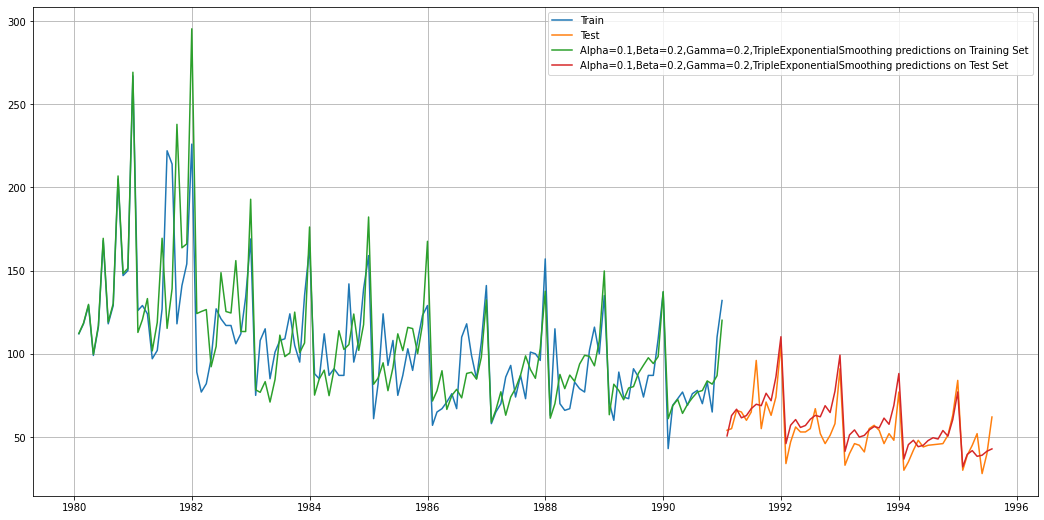

In [175]:

plt.figure(figsize=(18,9))
plt.plot(TES_train_rose['Rose'], label='Train')
plt.plot(TES_test_rose['Rose'], label='Test')

plt.plot(TES_train_rose['predict',0.1,0.2,0.2], label='Alpha=0.1,Beta=0.2,Gamma=0.2,TripleExponentialSmoothing predictions on Training Set')
plt.plot(TES_test_rose['predict',0.1,0.2,0.2], label='Alpha=0.1,Beta=0.2,Gamma=0.2,TripleExponentialSmoothing predictions on Test Set')


plt.legend(loc='best')
plt.grid();

In [176]:
resultsDf_15 = pd.DataFrame({'Test RMSE': [TES_parameters_Rose['Test RMSE'][0]],'Test MAPE':[TES_parameters_Rose['Test MAPE'][0]]}
                           ,index=['Alpha=0.1,Beta=0.2,Gamma=0.2,TripleExponentialSmoothing_Rose'])

resultsDf = pd.concat([resultsDf, resultsDf_15])
resultsDf

Test RMSE  Test MAPE
RegressionOnTime_Rose                                 15.268955      22.82
RegressionOnTime_Spark                              1389.135175      50.15
Rose_NaiveModel                                       79.718773     145.10
spark_NaiveModel                                    3864.279352     152.87
SimpleAverageModel_Rose                               53.460570      94.93
SimpleAverageModel_Spark                            1275.081804      38.90
2pointTrailingMovingAverage_Rose                      11.529278      13.54
4pointTrailingMovingAverage_Rose                      14.451403      19.49
6pointTrailingMovingAverage_Rose                      14.566327      20.82
9pointTrailingMovingAverage_Rose                      14.727630      21.01
2pointTrailingMovingAverage_spark                    813.400684      19.70
4pointTrailingMovingAverage_spark                   1156.589694      35.96
6pointTrailingMovingAverage_spark                   1283.927428      43.86
9pointTrailingMovingAverage_spark                   1346.278315      46.86
Alpha=0.1,SimpleExponentialSmoothing_Rose             36.828033      63.94
Alpha=0.1,SimpleExponentialSmoothing_spark          1375.393398      49.53
Alpha=0.1,SimpleExponentialSmoothing_Rose_Log          0.559033      12.70
Alpha=0.1,SimpleExponentialSmoothing_spark_Log         0.448789       5.16
Alpha=0.1,Beta=0.1,DoubleExponentialSmoothing_Rose    37.057142      64.02
Alpha=0.1,Beta=0.1,DoubleExponentialSmoothing_S...  1779.424587      67.23
Alpha=0.1,Beta=0.2,Gamma=0.2,TripleExponentialS...    12.790730      20.16

### SPARKLING

In [177]:
TES_train_spark = train_spark.copy()
TES_test_spark = test_spark.copy()

In [178]:
model_TES_spark = ExponentialSmoothing(TES_train_spark['Sparkling'],trend='additive',seasonal='multiplicative',freq='M')

In [179]:
TES_parameters_spark = pd.DataFrame({'Alpha Values':[],'Beta Values':[],'Gamma Values':[],'Train RMSE':[],'Train MAPE':[]
                                ,'Test RMSE': [],'Test MAPE': []})
TES_parameters_spark

Empty DataFrame
Columns: [Alpha Values, Beta Values, Gamma Values, Train RMSE, Train MAPE, Test RMSE, Test MAPE]
Index: []

In [180]:
for i in np.arange(0.1,1.1,0.1):
    for j in np.arange(0.1,1.1,0.1):
        for k in np.arange(0.1,1.1,0.1):
            model_TES_alpha_i_j_k = model_TES_spark.fit(smoothing_level=i,smoothing_slope=j,smoothing_seasonal=k,optimized=False,use_brute=True)
            TES_train_spark['predict',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
            TES_test_spark['predict',i,j,k] = model_TES_alpha_i_j_k.forecast(steps=55)
        
            spark_rmse_model8_train = metrics.mean_squared_error(TES_train_spark['Sparkling'],TES_train_spark['predict',i,j,k],squared=False)
            spark_mape_model8_train = MAPE(TES_train_spark['Sparkling'],TES_train_spark['predict',i,j,k])
        
            spark_rmse_model8_test = metrics.mean_squared_error(TES_test_spark['Sparkling'],TES_test_spark['predict',i,j,k],squared=False)
            spark_mape_model8_test = MAPE(TES_test_spark['Sparkling'],TES_test_spark['predict',i,j,k])
        
            TES_parameters_spark = TES_parameters_spark.append({'Alpha Values':i,'Beta Values':j,'Gamma Values':k,'Train RMSE':spark_rmse_model8_train
                                      ,'Train MAPE': spark_mape_model8_train,'Test RMSE':spark_rmse_model8_test
                                      ,'Test MAPE':spark_mape_model8_test}, ignore_index=True)

In [181]:
TES_parameters_spark

Alpha Values  Beta Values  Gamma Values     Train RMSE  Train MAPE  \
0             0.1          0.1           0.1     388.351959       11.31   
1             0.1          0.1           0.2     372.002250       10.82   
2             0.1          0.1           0.3     364.222099       10.57   
3             0.1          0.1           0.4     362.590749       10.51   
4             0.1          0.1           0.5     365.655545       10.59   
..            ...          ...           ...            ...         ...   
995           1.0          1.0           0.6  153394.791827     1428.87   
996           1.0          1.0           0.7   94040.964957     1036.30   
997           1.0          1.0           0.8  102196.953755      888.48   
998           1.0          1.0           0.9   77924.294413      876.07   
999           1.0          1.0           1.0  239917.432848     1303.21   

        Test RMSE  Test MAPE  
0    5.799963e+02      19.22  
1    6.174690e+02      20.80  
2    6.387802e+02      21.67  
3    6.447620e+02      22.22  
4    6.411226e+02      22.29  
..            ...        ...  
995  7.989790e+05   17177.41  
996  1.074413e+06   28878.00  
997  5.010607e+06   65738.32  
998  4.318265e+05    6048.85  
999  1.254280e+05    3313.86  

[1000 rows x 7 columns]

In [182]:
TES_parameters_spark.sort_values(by=['Test RMSE']).head()

Alpha Values  Beta Values  Gamma Values  Train RMSE  Train MAPE  \
301           0.4          0.1           0.2  389.772245       11.00   
211           0.3          0.2           0.2  395.529174       11.09   
110           0.2          0.2           0.1  405.333164       11.47   
200           0.3          0.1           0.1  394.630053       11.32   
20            0.1          0.3           0.1  414.423963       11.48   

      Test RMSE  Test MAPE  
301  336.715250      10.56  
211  350.145204      11.08  
110  352.571689      11.28  
200  352.607849      11.11  
20   354.534561      11.77

In [183]:
TES_parameters_spark.sort_values(by=['Test MAPE']).head()

Alpha Values  Beta Values  Gamma Values  Train RMSE  Train MAPE  \
301           0.4          0.1           0.2  389.772245       11.00   
211           0.3          0.2           0.2  395.529174       11.09   
200           0.3          0.1           0.1  394.630053       11.32   
110           0.2          0.2           0.1  405.333164       11.47   
20            0.1          0.3           0.1  414.423963       11.48   

      Test RMSE  Test MAPE  
301  336.715250      10.56  
211  350.145204      11.08  
200  352.607849      11.11  
110  352.571689      11.28  
20   354.534561      11.77

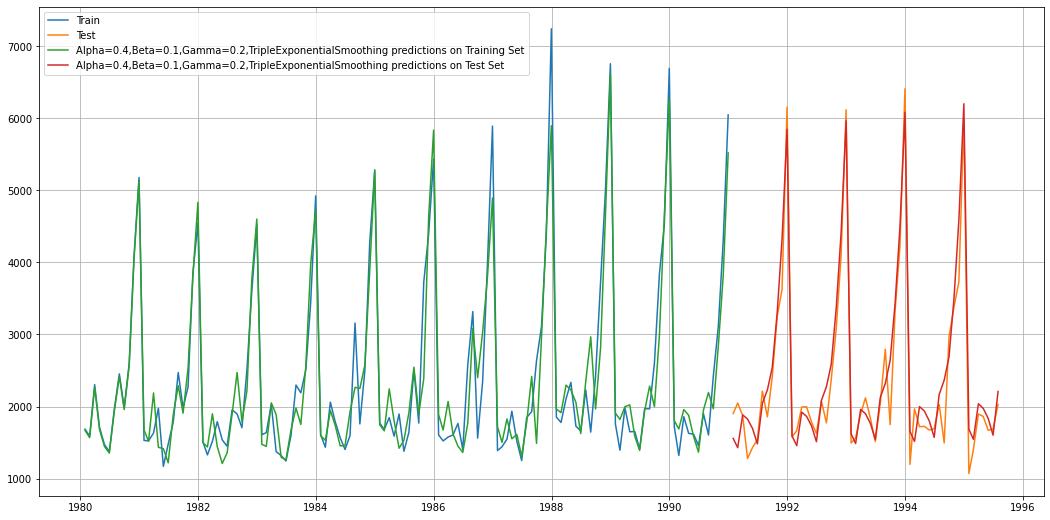

In [184]:

plt.figure(figsize=(18,9))
plt.plot(TES_train_spark['Sparkling'], label='Train')
plt.plot(TES_test_spark['Sparkling'], label='Test')

plt.plot(TES_train_spark['predict',0.4,0.1,0.2], label='Alpha=0.4,Beta=0.1,Gamma=0.2,TripleExponentialSmoothing predictions on Training Set')
plt.plot(TES_test_spark['predict',0.4,0.1,0.2], label='Alpha=0.4,Beta=0.1,Gamma=0.2,TripleExponentialSmoothing predictions on Test Set')


plt.legend(loc='best')
plt.grid();

In [185]:
resultsDf_16 = pd.DataFrame({'Test RMSE': [TES_parameters_spark['Test RMSE'][0]],'Test MAPE':[TES_parameters_spark['Test MAPE'][0]]}
                           ,index=['Alpha=0.4,Beta=0.1,Gamma=0.2,TripleExponentialSmoothing_spark'])

resultsDf = pd.concat([resultsDf, resultsDf_16])
resultsDf

Test RMSE  Test MAPE
RegressionOnTime_Rose                                 15.268955      22.82
RegressionOnTime_Spark                              1389.135175      50.15
Rose_NaiveModel                                       79.718773     145.10
spark_NaiveModel                                    3864.279352     152.87
SimpleAverageModel_Rose                               53.460570      94.93
SimpleAverageModel_Spark                            1275.081804      38.90
2pointTrailingMovingAverage_Rose                      11.529278      13.54
4pointTrailingMovingAverage_Rose                      14.451403      19.49
6pointTrailingMovingAverage_Rose                      14.566327      20.82
9pointTrailingMovingAverage_Rose                      14.727630      21.01
2pointTrailingMovingAverage_spark                    813.400684      19.70
4pointTrailingMovingAverage_spark                   1156.589694      35.96
6pointTrailingMovingAverage_spark                   1283.927428      43.86
9pointTrailingMovingAverage_spark                   1346.278315      46.86
Alpha=0.1,SimpleExponentialSmoothing_Rose             36.828033      63.94
Alpha=0.1,SimpleExponentialSmoothing_spark          1375.393398      49.53
Alpha=0.1,SimpleExponentialSmoothing_Rose_Log          0.559033      12.70
Alpha=0.1,SimpleExponentialSmoothing_spark_Log         0.448789       5.16
Alpha=0.1,Beta=0.1,DoubleExponentialSmoothing_Rose    37.057142      64.02
Alpha=0.1,Beta=0.1,DoubleExponentialSmoothing_S...  1779.424587      67.23
Alpha=0.1,Beta=0.2,Gamma=0.2,TripleExponentialS...    12.790730      20.16
Alpha=0.4,Beta=0.1,Gamma=0.2,TripleExponentialS...   579.996274      19.22

### Q5. Check for the stationarity of the data on which the model is being built on using appropriate statistical tests and also mention the hypothesis for the statistical test. If the data is found to be non-stationary, take appropriate steps to make it stationary. Check the new data for stationarity and comment.
Note: Stationarity should be checked at alpha = 0.05.

In [186]:
# Test for stationarity of the series - Dicky Fuller test

from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(window=7).mean()
    rolstd = timeseries.rolling(window=7).std()

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput,'\n')

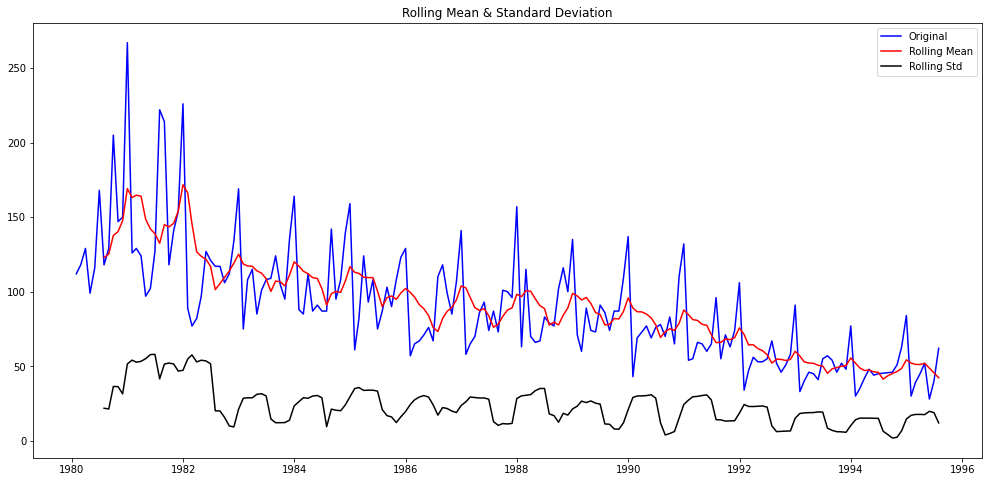

Results of Dickey-Fuller Test:
Test Statistic                  -1.876699
p-value                          0.343101
#Lags Used                      13.000000
Number of Observations Used    173.000000
Critical Value (1%)             -3.468726
Critical Value (5%)             -2.878396
Critical Value (10%)            -2.575756
dtype: float64 



In [187]:
test_stationarity(rose['Rose'])

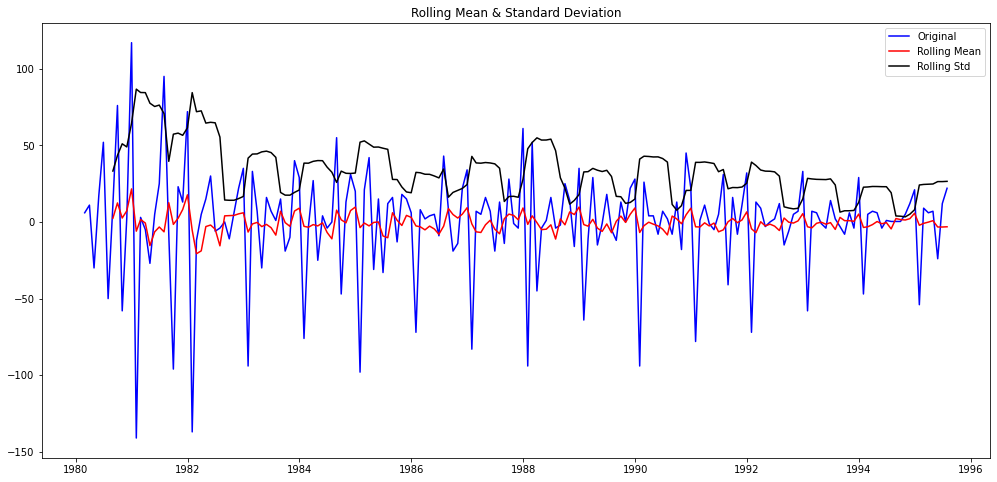

Results of Dickey-Fuller Test:
Test Statistic                -8.044392e+00
p-value                        1.810895e-12
#Lags Used                     1.200000e+01
Number of Observations Used    1.730000e+02
Critical Value (1%)           -3.468726e+00
Critical Value (5%)           -2.878396e+00
Critical Value (10%)          -2.575756e+00
dtype: float64 



In [188]:
test_stationarity(rose['Rose'].diff().dropna())

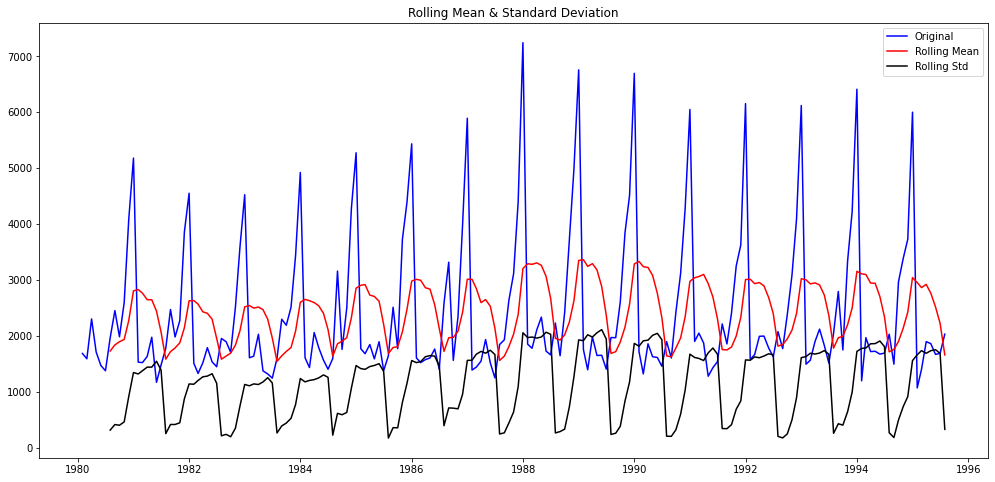

Results of Dickey-Fuller Test:
Test Statistic                  -1.360497
p-value                          0.601061
#Lags Used                      11.000000
Number of Observations Used    175.000000
Critical Value (1%)             -3.468280
Critical Value (5%)             -2.878202
Critical Value (10%)            -2.575653
dtype: float64 



In [189]:
test_stationarity(spark['Sparkling'])

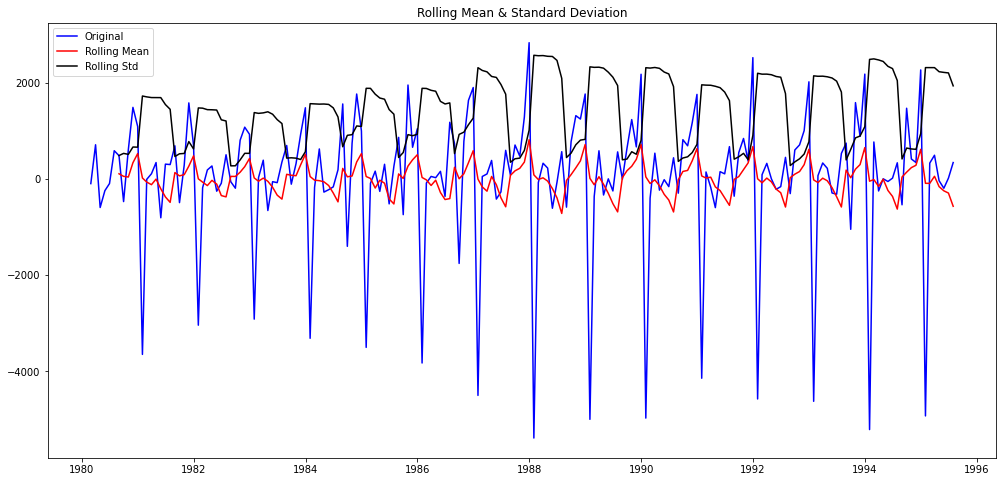

Results of Dickey-Fuller Test:
Test Statistic                 -45.050301
p-value                          0.000000
#Lags Used                      10.000000
Number of Observations Used    175.000000
Critical Value (1%)             -3.468280
Critical Value (5%)             -2.878202
Critical Value (10%)            -2.575653
dtype: float64 



In [190]:
test_stationarity(spark['Sparkling'].diff().dropna())

### Q6. Build an automated version of the ARIMA/SARIMA model in which the parameters are selected using the lowest Akaike Information Criteria (AIC) on the training data and evaluate this model on the test data using RMSE.

In [191]:
## The following loop helps us in getting a combination of different parameters of p and q in the range of 0 and 2
## We have kept the value of d as 1 as we need to take a difference of the series to make it stationary.

import itertools
p = q = range(0, 3)
d= range(1,2)
pdq = list(itertools.product(p, d, q))
print('Some parameter combinations for the Model...')
for i in range(1,len(pdq)):
    print('Model: {}'.format(pdq[i]))

Some parameter combinations for the Model...
Model: (0, 1, 1)
Model: (0, 1, 2)
Model: (1, 1, 0)
Model: (1, 1, 1)
Model: (1, 1, 2)
Model: (2, 1, 0)
Model: (2, 1, 1)
Model: (2, 1, 2)


In [192]:
# Creating an empty Dataframe with column names only
ARIMA_AIC_Rose = pd.DataFrame(columns=['param', 'AIC'])
ARIMA_AIC_Rose

Empty DataFrame
Columns: [param, AIC]
Index: []

In [193]:
from statsmodels.tsa.arima_model import ARIMA

for param in pdq:
    ARIMA_model = ARIMA(train_rose['Rose'].values,order=param).fit()
    print('ARIMA{} - AIC:{}'.format(param,ARIMA_model.aic))
    ARIMA_AIC_Rose = ARIMA_AIC_Rose.append({'param':param, 'AIC': ARIMA_model.aic}, ignore_index=True)

ARIMA(0, 1, 0) - AIC:1335.1526583086775
ARIMA(0, 1, 1) - AIC:1280.7261830464158
ARIMA(0, 1, 2) - AIC:1276.8353817176717
ARIMA(1, 1, 0) - AIC:1319.3483105801952
ARIMA(1, 1, 1) - AIC:1277.775750158612
ARIMA(1, 1, 2) - AIC:1277.3592239546433
ARIMA(2, 1, 0) - AIC:1300.6092611744102
ARIMA(2, 1, 1) - AIC:1279.0456894093386
ARIMA(2, 1, 2) - AIC:1279.2986939364814


In [194]:
## Sort the above AIC values in the ascending order to get the parameters for the minimum AIC value

ARIMA_AIC_Rose.sort_values(by='AIC',ascending=True)

param          AIC
2  (0, 1, 2)  1276.835382
5  (1, 1, 2)  1277.359224
4  (1, 1, 1)  1277.775750
7  (2, 1, 1)  1279.045689
8  (2, 1, 2)  1279.298694
1  (0, 1, 1)  1280.726183
6  (2, 1, 0)  1300.609261
3  (1, 1, 0)  1319.348311
0  (0, 1, 0)  1335.152658

In [195]:
mod = ARIMA(train_rose['Rose'], order=(0,1,2),freq='M')

results_Arima = mod.fit()

print(results_Arima.summary())

                             ARIMA Model Results                              
Dep. Variable:                 D.Rose   No. Observations:                  131
Model:                 ARIMA(0, 1, 2)   Log Likelihood                -634.418
Method:                       css-mle   S.D. of innovations             30.168
Date:                Sun, 26 Jul 2020   AIC                           1276.835
Time:                        23:25:24   BIC                           1288.336
Sample:                    02-29-1980   HQIC                          1281.509
                         - 12-31-1990                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -0.4885      0.085     -5.742      0.000      -0.655      -0.322
ma.L1.D.Rose    -0.7600      0.101     -7.500      0.000      -0.959      -0.561
ma.L2.D.Rose    -0.2398      0.095     -2.51

In [196]:
predicted_rose = results_Arima.forecast(steps=len(test_rose))

In [197]:
from sklearn.metrics import  mean_squared_error
Rose_rmse_Arima = mean_squared_error(test_rose['Rose'],predicted_rose[0],squared=False)
print(Rose_rmse_Arima)

15.619658933558222


In [198]:
resultsDf_17 = pd.DataFrame({'Test RMSE': Rose_rmse_Arima,'Test MAPE':'-'}
                           ,index=['(p=0,d=1,q=2)ARIMA_Rose'])

resultsDf = pd.concat([resultsDf, resultsDf_17])
resultsDf

Test RMSE Test MAPE
RegressionOnTime_Rose                                 15.268955     22.82
RegressionOnTime_Spark                              1389.135175     50.15
Rose_NaiveModel                                       79.718773     145.1
spark_NaiveModel                                    3864.279352    152.87
SimpleAverageModel_Rose                               53.460570     94.93
SimpleAverageModel_Spark                            1275.081804      38.9
2pointTrailingMovingAverage_Rose                      11.529278     13.54
4pointTrailingMovingAverage_Rose                      14.451403     19.49
6pointTrailingMovingAverage_Rose                      14.566327     20.82
9pointTrailingMovingAverage_Rose                      14.727630     21.01
2pointTrailingMovingAverage_spark                    813.400684      19.7
4pointTrailingMovingAverage_spark                   1156.589694     35.96
6pointTrailingMovingAverage_spark                   1283.927428     43.86
9pointTrailingMovingAverage_spark                   1346.278315     46.86
Alpha=0.1,SimpleExponentialSmoothing_Rose             36.828033     63.94
Alpha=0.1,SimpleExponentialSmoothing_spark          1375.393398     49.53
Alpha=0.1,SimpleExponentialSmoothing_Rose_Log          0.559033      12.7
Alpha=0.1,SimpleExponentialSmoothing_spark_Log         0.448789      5.16
Alpha=0.1,Beta=0.1,DoubleExponentialSmoothing_Rose    37.057142     64.02
Alpha=0.1,Beta=0.1,DoubleExponentialSmoothing_S...  1779.424587     67.23
Alpha=0.1,Beta=0.2,Gamma=0.2,TripleExponentialS...    12.790730     20.16
Alpha=0.4,Beta=0.1,Gamma=0.2,TripleExponentialS...   579.996274     19.22
(p=0,d=1,q=2)ARIMA_Rose                               15.619659         -

### Sparkling

In [199]:
## The following loop helps us in getting a combination of different parameters of p and q in the range of 0 and 2
## We have kept the value of d as 1 as we need to take a difference of the series to make it stationary.

import itertools
p = q = range(0, 4)
d= range(1,2)
pdq = list(itertools.product(p, d, q))
print('Some parameter combinations for the Model...')
for i in range(1,len(pdq)):
    print('Model: {}'.format(pdq[i]))

Some parameter combinations for the Model...
Model: (0, 1, 1)
Model: (0, 1, 2)
Model: (0, 1, 3)
Model: (1, 1, 0)
Model: (1, 1, 1)
Model: (1, 1, 2)
Model: (1, 1, 3)
Model: (2, 1, 0)
Model: (2, 1, 1)
Model: (2, 1, 2)
Model: (2, 1, 3)
Model: (3, 1, 0)
Model: (3, 1, 1)
Model: (3, 1, 2)
Model: (3, 1, 3)


In [200]:
# Creating an empty Dataframe with column names only
ARIMA_AIC_spark = pd.DataFrame(columns=['param', 'AIC'])
ARIMA_AIC_spark

Empty DataFrame
Columns: [param, AIC]
Index: []

In [201]:
from statsmodels.tsa.arima_model import ARIMA

for param in pdq:
    ARIMA_model = ARIMA(train_spark['Sparkling'].values,order=param).fit()
    print('ARIMA{} - AIC:{}'.format(param,ARIMA_model.aic))
    ARIMA_AIC_spark = ARIMA_AIC_spark.append({'param':param, 'AIC': ARIMA_model.aic}, ignore_index=True)

ARIMA(0, 1, 0) - AIC:2269.582796371201
ARIMA(0, 1, 1) - AIC:2264.906436793315
ARIMA(0, 1, 2) - AIC:2232.7830976840464
ARIMA(0, 1, 3) - AIC:2233.016605137259
ARIMA(1, 1, 0) - AIC:2268.5280613021696
ARIMA(1, 1, 1) - AIC:2235.0139453519546
ARIMA(1, 1, 2) - AIC:2233.5976471191184
ARIMA(1, 1, 3) - AIC:2234.5741415475563
ARIMA(2, 1, 0) - AIC:2262.035600260619
ARIMA(2, 1, 1) - AIC:2232.360489878392


/Applications/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


ARIMA(2, 1, 2) - AIC:2210.627569562462


/Applications/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


ARIMA(2, 1, 3) - AIC:2229.358093771085
ARIMA(3, 1, 0) - AIC:2259.471554710967
ARIMA(3, 1, 1) - AIC:2233.9217638003142
ARIMA(3, 1, 2) - AIC:2228.9289440302086
ARIMA(3, 1, 3) - AIC:2225.6615585249033


In [202]:
## Sort the above AIC values in the ascending order to get the parameters for the minimum AIC value

ARIMA_AIC_spark.sort_values(by='AIC',ascending=True)

param          AIC
10  (2, 1, 2)  2210.627570
15  (3, 1, 3)  2225.661559
14  (3, 1, 2)  2228.928944
11  (2, 1, 3)  2229.358094
9   (2, 1, 1)  2232.360490
2   (0, 1, 2)  2232.783098
3   (0, 1, 3)  2233.016605
6   (1, 1, 2)  2233.597647
13  (3, 1, 1)  2233.921764
7   (1, 1, 3)  2234.574142
5   (1, 1, 1)  2235.013945
12  (3, 1, 0)  2259.471555
8   (2, 1, 0)  2262.035600
1   (0, 1, 1)  2264.906437
4   (1, 1, 0)  2268.528061
0   (0, 1, 0)  2269.582796

In [203]:
mod = ARIMA(train_spark['Sparkling'], order=(2,1,2),freq='M')

results_Arima = mod.fit()

print(results_Arima.summary())

                             ARIMA Model Results                              
Dep. Variable:            D.Sparkling   No. Observations:                  131
Model:                 ARIMA(2, 1, 2)   Log Likelihood               -1099.314
Method:                       css-mle   S.D. of innovations           1013.968
Date:                Sun, 26 Jul 2020   AIC                           2210.628
Time:                        23:25:29   BIC                           2227.879
Sample:                    02-29-1980   HQIC                          2217.637
                         - 12-31-1990                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 5.5843      0.520     10.742      0.000       4.565       6.603
ar.L1.D.Sparkling     1.2699      0.075     17.039      0.000       1.124       1.416
ar.L2.D.Sparkling    -0.

/Applications/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


In [204]:
predicted_spark = results_Arima.forecast(steps=len(test_spark))

In [205]:
from sklearn.metrics import  mean_squared_error
spark_rmse_Arima = mean_squared_error(test_spark['Sparkling'],predicted_spark[0],squared=False)
print(spark_rmse_Arima)

1373.9193171271997


In [206]:
resultsDf_18 = pd.DataFrame({'Test RMSE': spark_rmse_Arima,'Test MAPE':'-'}
                           ,index=['(p=2,d=1,q=2)ARIMA_spark'])

resultsDf = pd.concat([resultsDf, resultsDf_18])
resultsDf

Test RMSE Test MAPE
RegressionOnTime_Rose                                 15.268955     22.82
RegressionOnTime_Spark                              1389.135175     50.15
Rose_NaiveModel                                       79.718773     145.1
spark_NaiveModel                                    3864.279352    152.87
SimpleAverageModel_Rose                               53.460570     94.93
SimpleAverageModel_Spark                            1275.081804      38.9
2pointTrailingMovingAverage_Rose                      11.529278     13.54
4pointTrailingMovingAverage_Rose                      14.451403     19.49
6pointTrailingMovingAverage_Rose                      14.566327     20.82
9pointTrailingMovingAverage_Rose                      14.727630     21.01
2pointTrailingMovingAverage_spark                    813.400684      19.7
4pointTrailingMovingAverage_spark                   1156.589694     35.96
6pointTrailingMovingAverage_spark                   1283.927428     43.86
9pointTrailingMovingAverage_spark                   1346.278315     46.86
Alpha=0.1,SimpleExponentialSmoothing_Rose             36.828033     63.94
Alpha=0.1,SimpleExponentialSmoothing_spark          1375.393398     49.53
Alpha=0.1,SimpleExponentialSmoothing_Rose_Log          0.559033      12.7
Alpha=0.1,SimpleExponentialSmoothing_spark_Log         0.448789      5.16
Alpha=0.1,Beta=0.1,DoubleExponentialSmoothing_Rose    37.057142     64.02
Alpha=0.1,Beta=0.1,DoubleExponentialSmoothing_S...  1779.424587     67.23
Alpha=0.1,Beta=0.2,Gamma=0.2,TripleExponentialS...    12.790730     20.16
Alpha=0.4,Beta=0.1,Gamma=0.2,TripleExponentialS...   579.996274     19.22
(p=0,d=1,q=2)ARIMA_Rose                               15.619659         -
(p=2,d=1,q=2)ARIMA_spark                            1373.919317         -

### Q7. Build ARIMA/SARIMA models based on the cut-off points of ACF and PACF on the training data and evaluate this model on the test data using RMSE.

In [207]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

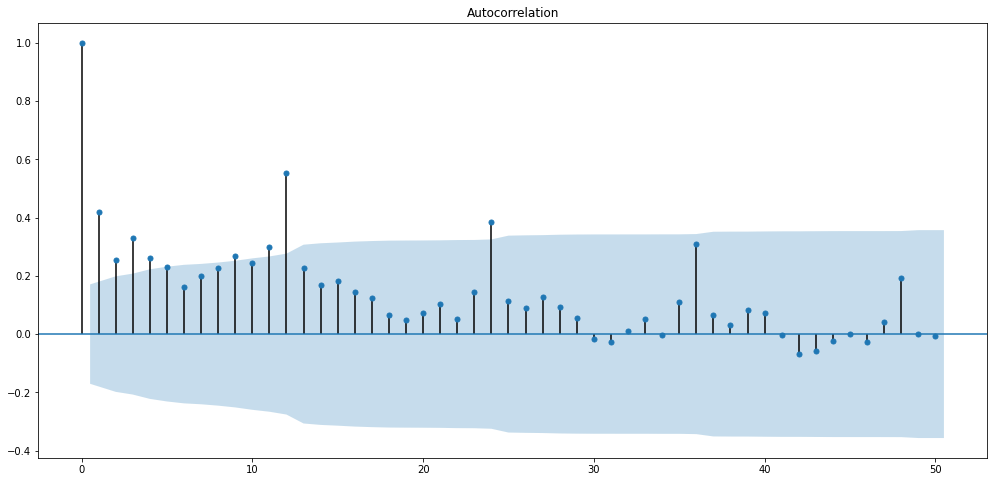

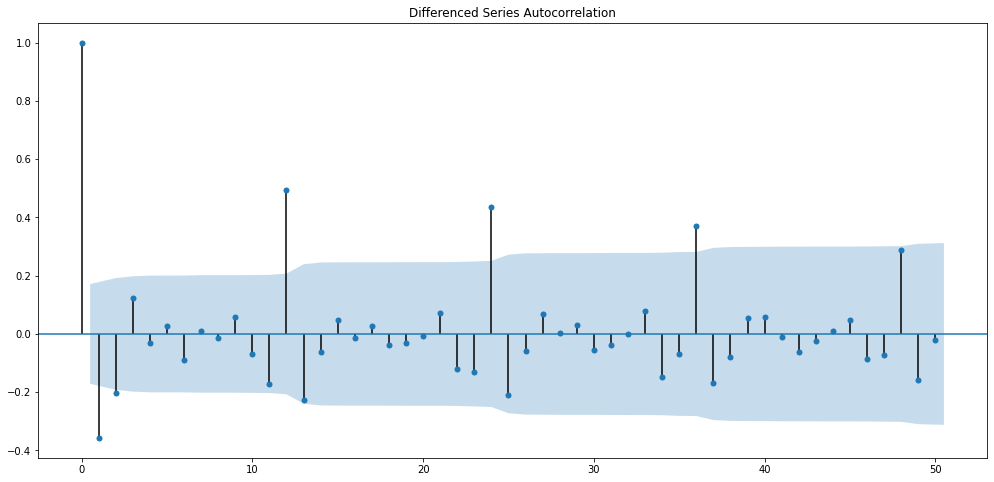

In [208]:
plot_acf(train_rose['Rose'],lags=50)
plot_acf(train_rose['Rose'].diff().dropna(),lags=50,title='Differenced Series Autocorrelation')
plt.show()

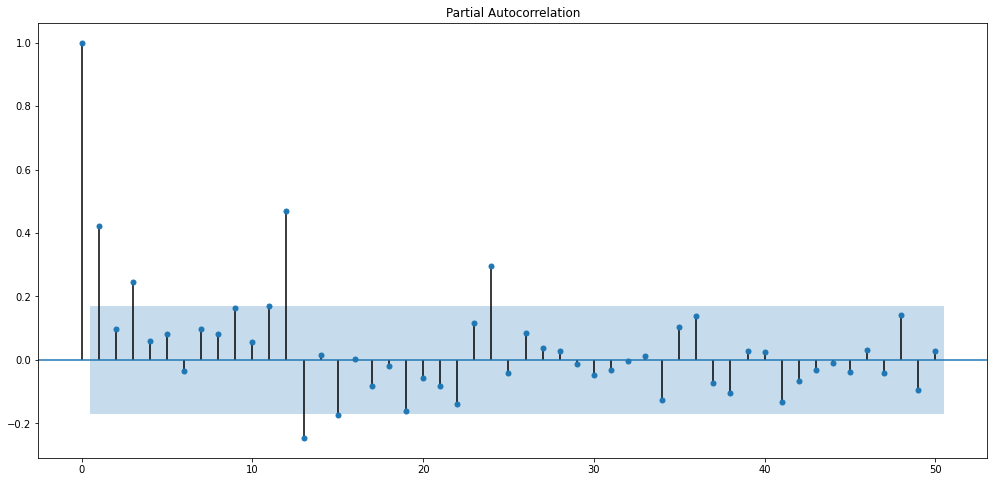

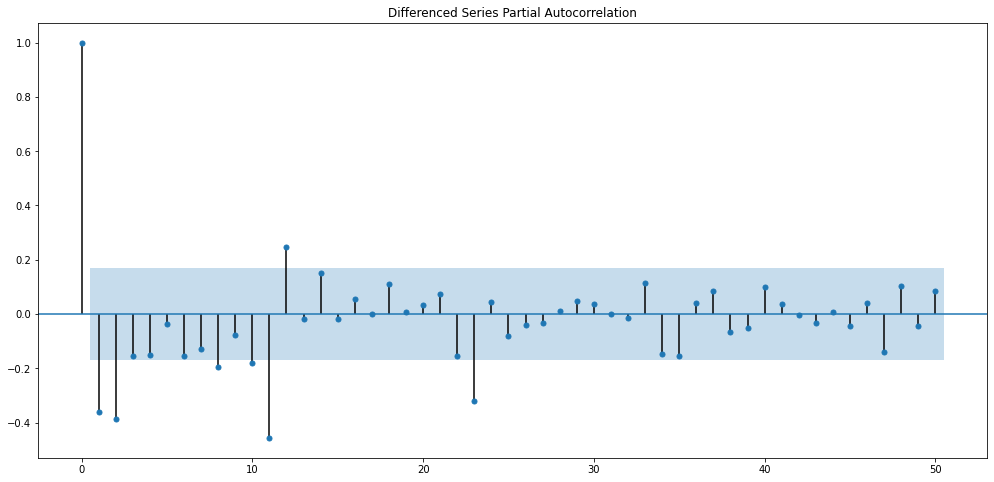

In [209]:
plot_pacf(train_rose['Rose'],lags=50)
plot_pacf(train_rose['Rose'].diff().dropna(),lags=50,title='Differenced Series Partial Autocorrelation')
plt.show()

In [210]:
mod_7 = ARIMA(train_rose['Rose'], order=(1,1,1),freq='M')

results_Arima = mod_7.fit()

print(results_Arima.summary())

                             ARIMA Model Results                              
Dep. Variable:                 D.Rose   No. Observations:                  131
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -634.888
Method:                       css-mle   S.D. of innovations             30.279
Date:                Sun, 26 Jul 2020   AIC                           1277.776
Time:                        23:25:30   BIC                           1289.277
Sample:                    02-29-1980   HQIC                          1282.449
                         - 12-31-1990                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -0.4871      0.086     -5.656      0.000      -0.656      -0.318
ar.L1.D.Rose     0.2006      0.087      2.293      0.022       0.029       0.372
ma.L1.D.Rose    -0.9999      0.035    -28.64

In [211]:
predicted_rose_7 = results_Arima.forecast(steps=len(test_rose))

In [212]:
Rose_rmse_Arima_7 = mean_squared_error(test_rose['Rose'],predicted_rose_7[0],squared=False)
print(Rose_rmse_Arima_7)

15.733602388879751


In [213]:
resultsDf_19 = pd.DataFrame({'Test RMSE': Rose_rmse_Arima_7,'Test MAPE':'-'}
                           ,index=['(p=1,d=1,q=1)ARIMA_spark'])

resultsDf = pd.concat([resultsDf, resultsDf_19])
resultsDf

Test RMSE Test MAPE
RegressionOnTime_Rose                                 15.268955     22.82
RegressionOnTime_Spark                              1389.135175     50.15
Rose_NaiveModel                                       79.718773     145.1
spark_NaiveModel                                    3864.279352    152.87
SimpleAverageModel_Rose                               53.460570     94.93
SimpleAverageModel_Spark                            1275.081804      38.9
2pointTrailingMovingAverage_Rose                      11.529278     13.54
4pointTrailingMovingAverage_Rose                      14.451403     19.49
6pointTrailingMovingAverage_Rose                      14.566327     20.82
9pointTrailingMovingAverage_Rose                      14.727630     21.01
2pointTrailingMovingAverage_spark                    813.400684      19.7
4pointTrailingMovingAverage_spark                   1156.589694     35.96
6pointTrailingMovingAverage_spark                   1283.927428     43.86
9pointTrailingMovingAverage_spark                   1346.278315     46.86
Alpha=0.1,SimpleExponentialSmoothing_Rose             36.828033     63.94
Alpha=0.1,SimpleExponentialSmoothing_spark          1375.393398     49.53
Alpha=0.1,SimpleExponentialSmoothing_Rose_Log          0.559033      12.7
Alpha=0.1,SimpleExponentialSmoothing_spark_Log         0.448789      5.16
Alpha=0.1,Beta=0.1,DoubleExponentialSmoothing_Rose    37.057142     64.02
Alpha=0.1,Beta=0.1,DoubleExponentialSmoothing_S...  1779.424587     67.23
Alpha=0.1,Beta=0.2,Gamma=0.2,TripleExponentialS...    12.790730     20.16
Alpha=0.4,Beta=0.1,Gamma=0.2,TripleExponentialS...   579.996274     19.22
(p=0,d=1,q=2)ARIMA_Rose                               15.619659         -
(p=2,d=1,q=2)ARIMA_spark                            1373.919317         -
(p=1,d=1,q=1)ARIMA_spark                              15.733602         -

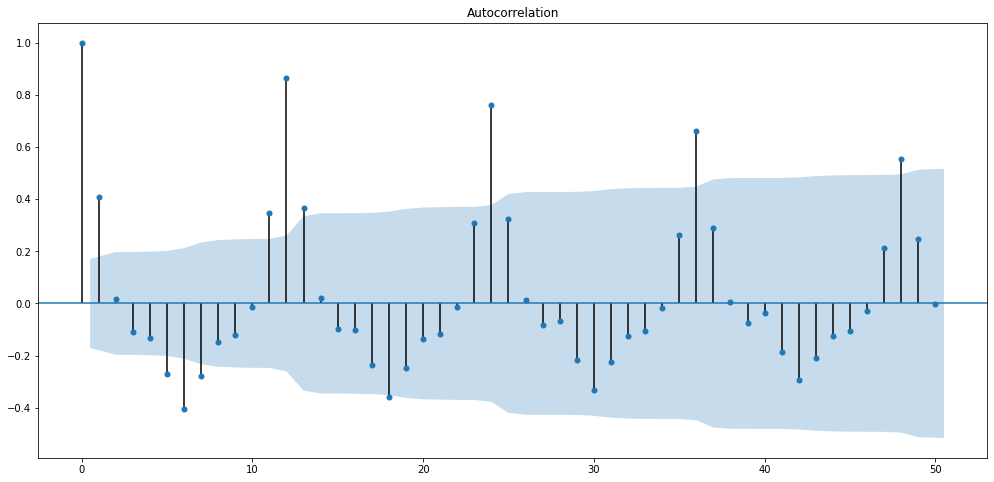

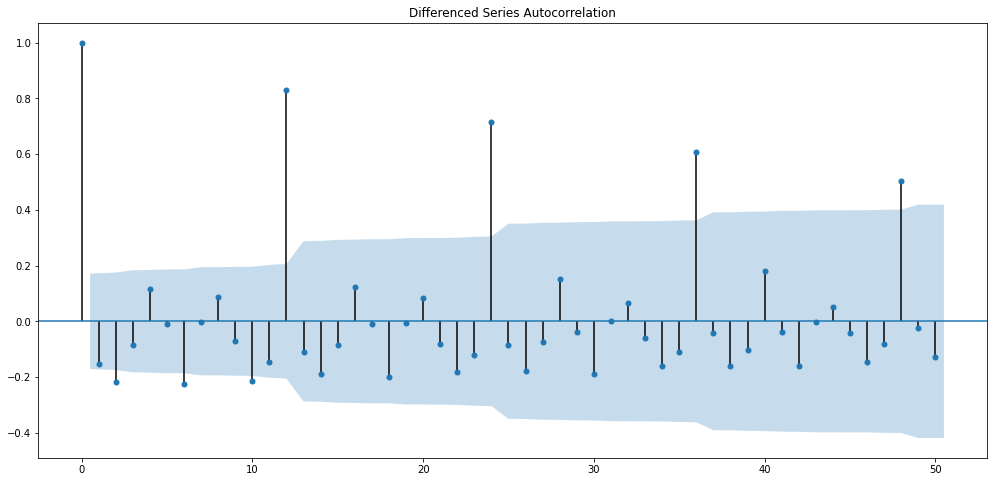

In [214]:
plot_acf(train_spark['Sparkling'],lags=50)
plot_acf(train_spark['Sparkling'].diff().dropna(),lags=50,title='Differenced Series Autocorrelation')
plt.show()

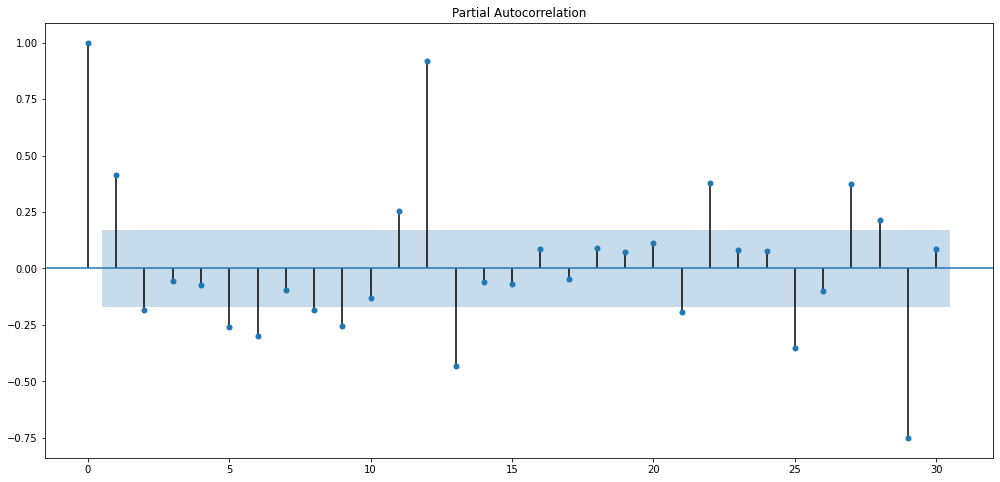

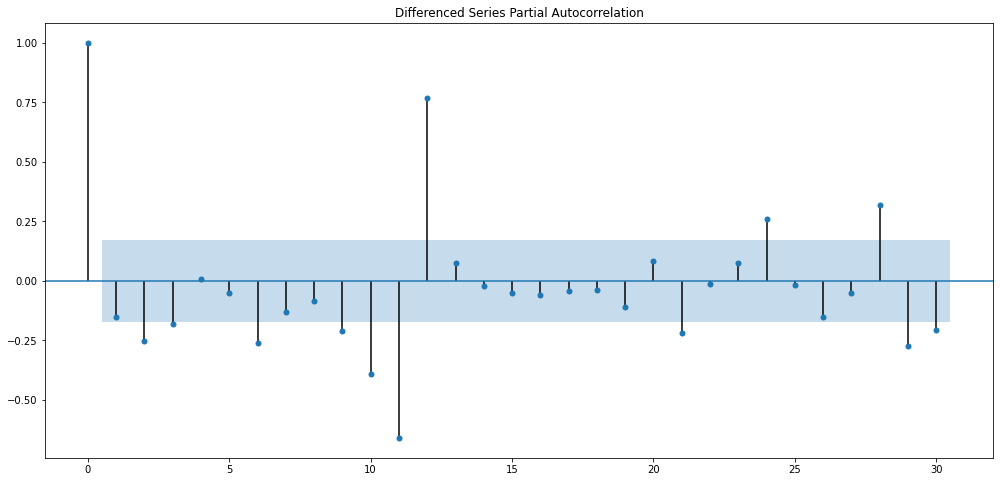

In [215]:
plot_pacf(train_spark['Sparkling'],lags=30)
plot_pacf(train_spark['Sparkling'].diff().dropna(),lags=30,title='Differenced Series Partial Autocorrelation')
plt.show()

In [216]:
mod = ARIMA(train_spark['Sparkling'], order=(2,1,1),freq='M')

results_Arima = mod.fit()

print(results_Arima.summary())

                             ARIMA Model Results                              
Dep. Variable:            D.Sparkling   No. Observations:                  131
Model:                 ARIMA(2, 1, 1)   Log Likelihood               -1111.180
Method:                       css-mle   S.D. of innovations           1148.859
Date:                Sun, 26 Jul 2020   AIC                           2232.360
Time:                        23:25:32   BIC                           2246.736
Sample:                    02-29-1980   HQIC                          2238.202
                         - 12-31-1990                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 6.2033      3.807      1.629      0.103      -1.259      13.665
ar.L1.D.Sparkling     0.5026      0.087      5.753      0.000       0.331       0.674
ar.L2.D.Sparkling    -0.

In [217]:
predicted_spark = results_Arima.forecast(steps=len(test_spark))

In [218]:
from sklearn.metrics import  mean_squared_error
spark_rmse_Arima = mean_squared_error(test_spark['Sparkling'],predicted_spark[0],squared=False)
print(spark_rmse_Arima)

1418.20826025862


In [219]:
resultsDf_20 = pd.DataFrame({'Test RMSE': spark_rmse_Arima,'Test MAPE':'-'}
                           ,index=['(p=2,d=1,q=1)ARIMA_spark'])

resultsDf = pd.concat([resultsDf, resultsDf_20])
resultsDf

Test RMSE Test MAPE
RegressionOnTime_Rose                                 15.268955     22.82
RegressionOnTime_Spark                              1389.135175     50.15
Rose_NaiveModel                                       79.718773     145.1
spark_NaiveModel                                    3864.279352    152.87
SimpleAverageModel_Rose                               53.460570     94.93
SimpleAverageModel_Spark                            1275.081804      38.9
2pointTrailingMovingAverage_Rose                      11.529278     13.54
4pointTrailingMovingAverage_Rose                      14.451403     19.49
6pointTrailingMovingAverage_Rose                      14.566327     20.82
9pointTrailingMovingAverage_Rose                      14.727630     21.01
2pointTrailingMovingAverage_spark                    813.400684      19.7
4pointTrailingMovingAverage_spark                   1156.589694     35.96
6pointTrailingMovingAverage_spark                   1283.927428     43.86
9pointTrailingMovingAverage_spark                   1346.278315     46.86
Alpha=0.1,SimpleExponentialSmoothing_Rose             36.828033     63.94
Alpha=0.1,SimpleExponentialSmoothing_spark          1375.393398     49.53
Alpha=0.1,SimpleExponentialSmoothing_Rose_Log          0.559033      12.7
Alpha=0.1,SimpleExponentialSmoothing_spark_Log         0.448789      5.16
Alpha=0.1,Beta=0.1,DoubleExponentialSmoothing_Rose    37.057142     64.02
Alpha=0.1,Beta=0.1,DoubleExponentialSmoothing_S...  1779.424587     67.23
Alpha=0.1,Beta=0.2,Gamma=0.2,TripleExponentialS...    12.790730     20.16
Alpha=0.4,Beta=0.1,Gamma=0.2,TripleExponentialS...   579.996274     19.22
(p=0,d=1,q=2)ARIMA_Rose                               15.619659         -
(p=2,d=1,q=2)ARIMA_spark                            1373.919317         -
(p=1,d=1,q=1)ARIMA_spark                              15.733602         -
(p=2,d=1,q=1)ARIMA_spark                            1418.208260         -

### Q8. Build a table with all the models built along with their corresponding parameters and the respective RMSE values on the test data.

In [220]:
resultsDf.sort_values(by=['Test RMSE'])

Test RMSE Test MAPE
Alpha=0.1,SimpleExponentialSmoothing_spark_Log         0.448789      5.16
Alpha=0.1,SimpleExponentialSmoothing_Rose_Log          0.559033      12.7
2pointTrailingMovingAverage_Rose                      11.529278     13.54
Alpha=0.1,Beta=0.2,Gamma=0.2,TripleExponentialS...    12.790730     20.16
4pointTrailingMovingAverage_Rose                      14.451403     19.49
6pointTrailingMovingAverage_Rose                      14.566327     20.82
9pointTrailingMovingAverage_Rose                      14.727630     21.01
RegressionOnTime_Rose                                 15.268955     22.82
(p=0,d=1,q=2)ARIMA_Rose                               15.619659         -
(p=1,d=1,q=1)ARIMA_spark                              15.733602         -
Alpha=0.1,SimpleExponentialSmoothing_Rose             36.828033     63.94
Alpha=0.1,Beta=0.1,DoubleExponentialSmoothing_Rose    37.057142     64.02
SimpleAverageModel_Rose                               53.460570     94.93
Rose_NaiveModel                                       79.718773     145.1
Alpha=0.4,Beta=0.1,Gamma=0.2,TripleExponentialS...   579.996274     19.22
2pointTrailingMovingAverage_spark                    813.400684      19.7
4pointTrailingMovingAverage_spark                   1156.589694     35.96
SimpleAverageModel_Spark                            1275.081804      38.9
6pointTrailingMovingAverage_spark                   1283.927428     43.86
9pointTrailingMovingAverage_spark                   1346.278315     46.86
(p=2,d=1,q=2)ARIMA_spark                            1373.919317         -
Alpha=0.1,SimpleExponentialSmoothing_spark          1375.393398     49.53
RegressionOnTime_Spark                              1389.135175     50.15
(p=2,d=1,q=1)ARIMA_spark                            1418.208260         -
Alpha=0.1,Beta=0.1,DoubleExponentialSmoothing_S...  1779.424587     67.23
spark_NaiveModel                                    3864.279352    152.87

### Q9. Based on the model-building exercise, build the most optimum model(s) on the complete data and predict 12 months into the future with appropriate confidence intervals/bands.

We can observe that we have relatively low RMSE for many models. In order to predict 12 months into the future with confidence intervals, we will use the ARIMA model

In [221]:
mod = ARIMA(rose['Rose'], order=(0,1,2),freq='M')

results_Arima = mod.fit()

print(results_Arima.summary())

                             ARIMA Model Results                              
Dep. Variable:                 D.Rose   No. Observations:                  186
Model:                 ARIMA(0, 1, 2)   Log Likelihood                -876.961
Method:                       css-mle   S.D. of innovations             26.650
Date:                Sun, 26 Jul 2020   AIC                           1761.922
Time:                        23:25:32   BIC                           1774.825
Sample:                    02-29-1980   HQIC                          1767.151
                         - 07-31-1995                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -0.5229      0.043    -12.027      0.000      -0.608      -0.438
ma.L1.D.Rose    -0.7923      0.082     -9.618      0.000      -0.954      -0.631
ma.L2.D.Rose    -0.2076      0.081     -2.57

In [222]:
## Forecast for next 12 months

predicted = results_Arima.predict(start='8/1/1995', end='9/1/1996',typ='levels')

In [223]:
predicted

1995-08-31    44.882051
1995-09-30    40.102181
1995-10-31    39.579257
1995-11-30    39.056333
1995-12-31    38.533409
1996-01-31    38.010485
1996-02-29    37.487561
1996-03-31    36.964637
1996-04-30    36.441713
1996-05-31    35.918789
1996-06-30    35.395865
1996-07-31    34.872941
1996-08-31    34.350017
1996-09-30    33.827093
Freq: M, dtype: float64

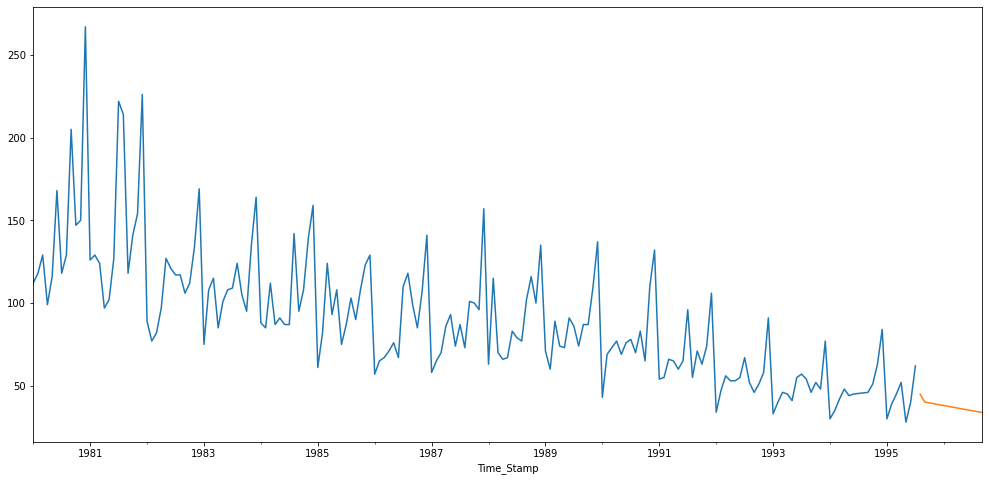

In [224]:
rose['Rose'].plot()
predicted.plot();

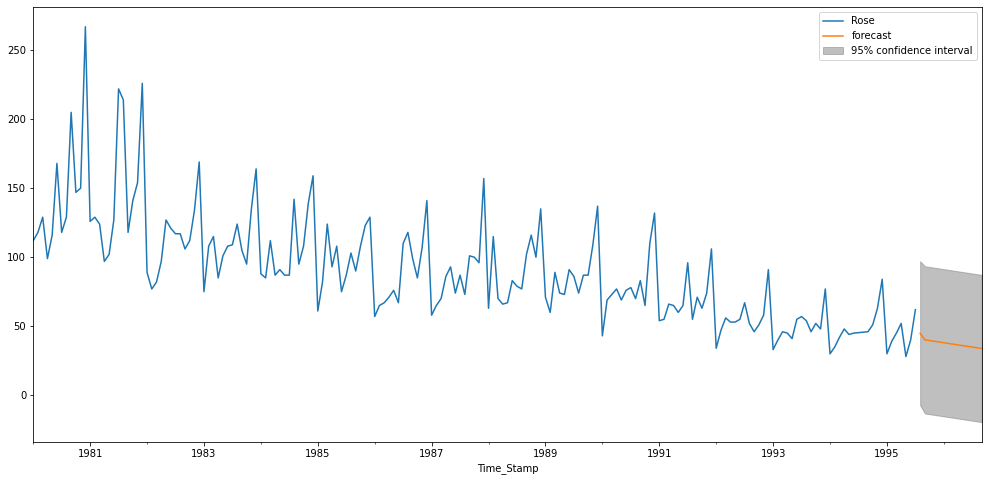

In [225]:
#Plotting the acutal Time Series with the confidence interval

fig, ax = plt.subplots()
ax = rose['Rose'].plot(ax=ax)
fig = results_Arima.plot_predict(start='8/1/1995', end='9/1/1996',dynamic=True,plot_insample=False,alpha=0.05,ax=ax);

In [226]:
mod = ARIMA(spark['Sparkling'], order=(1,1,1),freq='M')

results_Arima = mod.fit()

print(results_Arima.summary())

                             ARIMA Model Results                              
Dep. Variable:            D.Sparkling   No. Observations:                  186
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -1585.295
Method:                       css-mle   S.D. of innovations           1202.519
Date:                Sun, 26 Jul 2020   AIC                           3178.590
Time:                        23:25:33   BIC                           3191.493
Sample:                    02-29-1980   HQIC                          3183.819
                         - 07-31-1995                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 2.0784      2.554      0.814      0.416      -2.928       7.085
ar.L1.D.Sparkling     0.3681      0.069      5.370      0.000       0.234       0.503
ma.L1.D.Sparkling    -1.

In [227]:
## Forecast for next 12 months

predicted = results_Arima.predict(start='8/1/1995', end='9/1/1996',typ='levels')

In [228]:
predicted

1995-08-31    2388.980607
1995-09-30    2522.082178
1995-10-31    2572.395954
1995-11-30    2592.231927
1995-12-31    2600.847689
1996-01-31    2605.332802
1996-02-29    2608.297243
1996-03-31    2610.701858
1996-04-30    2612.900376
1996-05-31    2615.023021
1996-06-30    2617.117734
1996-07-31    2619.202164
1996-08-31    2621.282808
1996-09-30    2623.362059
Freq: M, dtype: float64

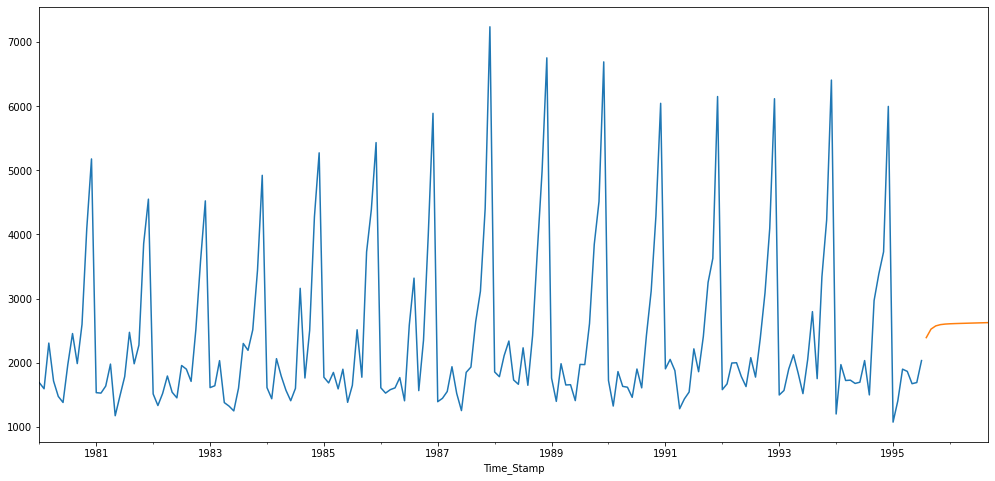

In [229]:
spark['Sparkling'].plot()
predicted.plot();

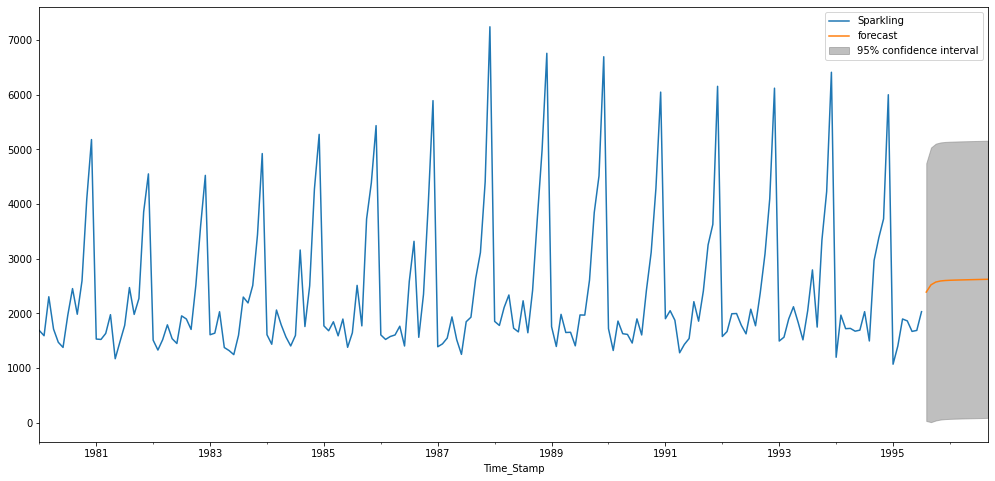

In [230]:
#Plotting the acutal Time Series with the confidence interval

fig, ax = plt.subplots()
ax = spark['Sparkling'].plot(ax=ax)
fig = results_Arima.plot_predict(start='8/1/1995', end='9/1/1996',dynamic=True,plot_insample=False,alpha=0.05,ax=ax);

In [231]:
rose_log=rose.copy()

In [232]:
rose_log=rose_log.drop(["YearMonth"],axis=1)

In [233]:
rose_log=np.log(rose_log)

In [234]:
fullmodel1 = ExponentialSmoothing(rose_log).fit(smoothing_level=0.1)


/Applications/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)


In [235]:
RMSE_fullmodel1 = metrics.mean_squared_error(rose_log['Rose'],fullmodel1.fittedvalues,squared=False)
MAPE_fullmodel1 = MAPE(rose_log['Rose'],fullmodel1.fittedvalues)

print('RMSE:',RMSE_fullmodel1,'\nMAPE:',MAPE_fullmodel1)

RMSE: 0.2745015397604867 
MAPE: 4.87


In [236]:
prediction_1 = fullmodel1.forecast(steps=12)

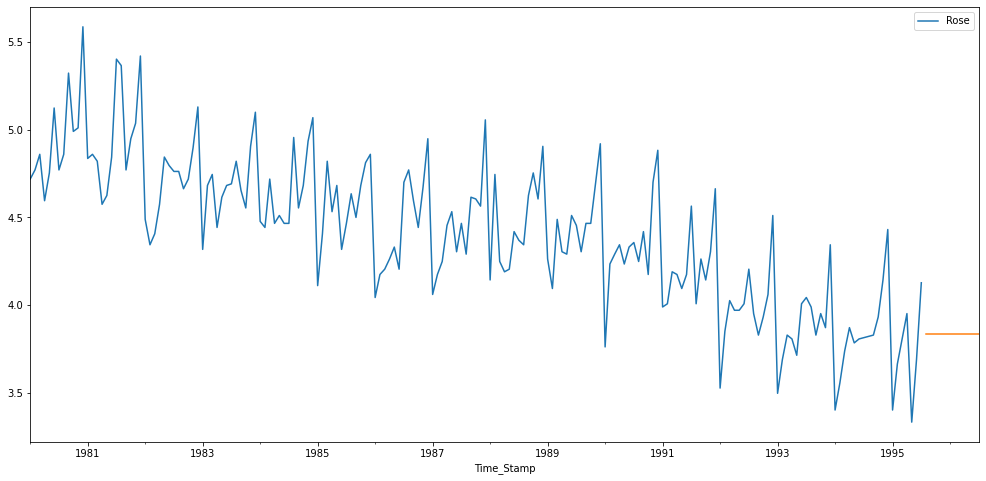

In [237]:
rose_log.plot()
prediction_1.plot();

In [238]:
#In the below code, we have calculated the upper and lower confidence bands at 95% confidence level
#The percentile function under numpy lets us calculate these and adding and subtracting from the predictions
#gives us the necessary confidence bands for the predictions
pred_1_df = pd.DataFrame({'lower_CI':prediction_1 - ((np.percentile(prediction_1,[2.5,97.5])))[0],
                          'prediction':prediction_1,
                          'upper_ci': prediction_1 + ((np.percentile(prediction_1,[2.5,97.5])))[1]})
pred_1_df.head()

lower_CI  prediction  upper_ci
1995-08-31       0.0    3.834221  7.668443
1995-09-30       0.0    3.834221  7.668443
1995-10-31       0.0    3.834221  7.668443
1995-11-30       0.0    3.834221  7.668443
1995-12-31       0.0    3.834221  7.668443

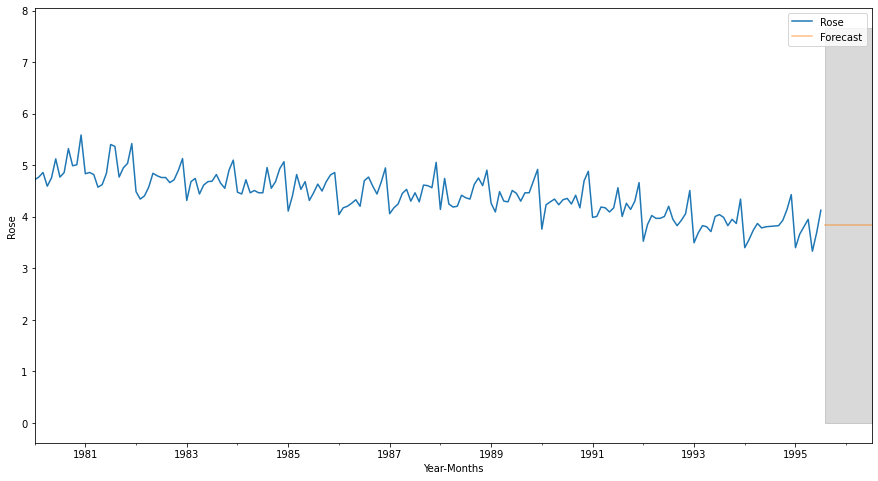

In [239]:
axis = rose_log.plot(label='Actual', figsize=(15,8))
pred_1_df['prediction'].plot(ax=axis, label='Forecast', alpha=0.5)
axis.fill_between(pred_1_df.index, pred_1_df['lower_CI'], pred_1_df['upper_ci'], color='k', alpha=.15)
axis.set_xlabel('Year-Months')
axis.set_ylabel('Rose')
plt.legend(loc='best')
plt.show()

In [240]:
spark_log=spark.copy()

In [241]:
spark_log=spark_log.drop(["YearMonth"],axis=1)

In [242]:
spark_log=np.log(spark_log)

In [243]:
fullmodel1 = ExponentialSmoothing(spark_log).fit(smoothing_level=0.1)


/Applications/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)


In [244]:
RMSE_fullmodel1 = metrics.mean_squared_error(spark_log['Sparkling'],fullmodel1.fittedvalues,squared=False)
MAPE_fullmodel1 = MAPE(spark_log['Sparkling'],fullmodel1.fittedvalues)

print('RMSE:',RMSE_fullmodel1,'\nMAPE:',MAPE_fullmodel1)

RMSE: 0.44365606606860725 
MAPE: 4.76


In [245]:
prediction_1 = fullmodel1.forecast(steps=12)

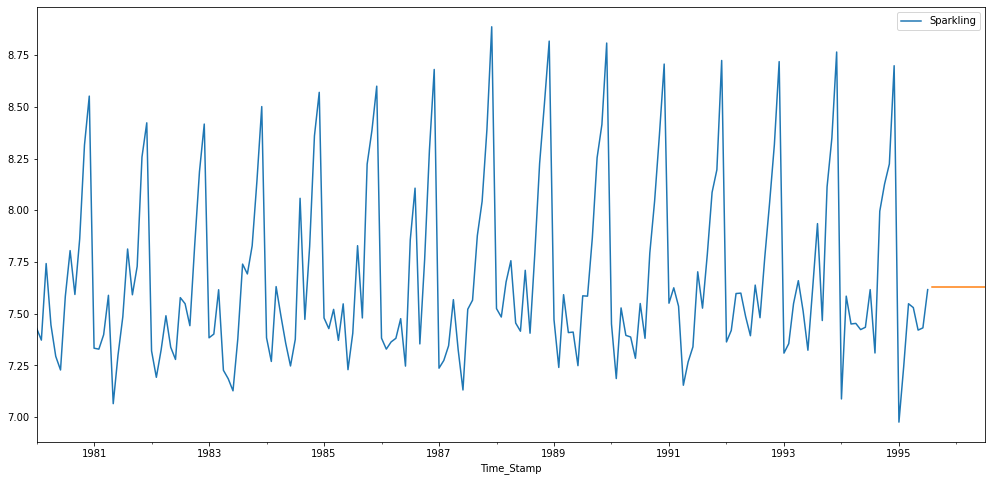

In [246]:
spark_log.plot()
prediction_1.plot();

In [247]:
#In the below code, we have calculated the upper and lower confidence bands at 95% confidence level
#The percentile function under numpy lets us calculate these and adding and subtracting from the predictions
#gives us the necessary confidence bands for the predictions
pred_1_df = pd.DataFrame({'lower_CI':prediction_1 - ((np.percentile(prediction_1,[2.5,97.5])))[0],
                          'prediction':prediction_1,
                          'upper_ci': prediction_1 + ((np.percentile(prediction_1,[2.5,97.5])))[1]})
pred_1_df.head()

lower_CI  prediction   upper_ci
1995-08-31       0.0    7.629442  15.258884
1995-09-30       0.0    7.629442  15.258884
1995-10-31       0.0    7.629442  15.258884
1995-11-30       0.0    7.629442  15.258884
1995-12-31       0.0    7.629442  15.258884

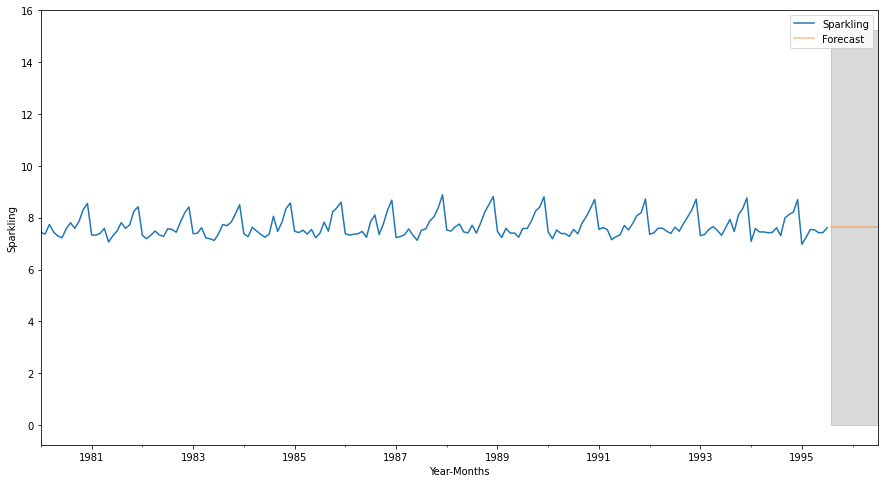

In [248]:
axis = spark_log.plot(label='Actual', figsize=(15,8))
pred_1_df['prediction'].plot(ax=axis, label='Forecast', alpha=0.5)
axis.fill_between(pred_1_df.index, pred_1_df['lower_CI'], pred_1_df['upper_ci'], color='k', alpha=.15)
axis.set_xlabel('Year-Months')
axis.set_ylabel('Sparkling')
plt.legend(loc='best')
plt.show()

### Q10. Comment on the model thus built and report your findings and suggest the measures that the company should be taking for future sales.

Mentioned in the report